<h1><center><font color = purple> Cluster Anyalysis Of Global Devlopment Measurements

### <font color=red>Business Objective: 
    Creating clusters on global development measurement dataset

In [1]:
## importing libraries
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import LabelEncoder
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## <font color=Magenta>Importing dataset

In [2]:
data_org = pd.read_excel(r'C:\Users\pvbha\OneDrive\Desktop\DS\Project\Clustering\World_development_mesurement.xlsx')
data_org.head()

Birth Rate Business Tax Rate  CO2 Emissions       Country  \
0       0.020               NaN        87931.0       Algeria   
1       0.050               NaN         9542.0        Angola   
2       0.043               NaN         1617.0         Benin   
3       0.027               NaN         4276.0      Botswana   
4       0.046               NaN         1041.0  Burkina Faso   

   Days to Start Business  Ease of Business  Energy Usage              GDP  \
0                     NaN               NaN       26998.0  $54,790,058,957   
1                     NaN               NaN        7499.0   $9,129,594,819   
2                     NaN               NaN        1983.0   $2,359,122,303   
3                     NaN               NaN        1836.0   $5,788,311,645   
4                     NaN               NaN           NaN   $2,610,959,139   

   Health Exp % GDP Health Exp/Capita  ...  Life Expectancy Male  \
0             0.035               $60  ...                  67.0   
1             0.034               $22  ...                  44.0   
2             0.043               $15  ...                  53.0   
3             0.047              $152  ...                  49.0   
4             0.051               $12  ...                  49.0   

   Mobile Phone Usage  Number of Records  Population 0-14  Population 15-64  \
0                 0.0                  1            0.342             0.619   
1                 0.0                  1            0.476             0.499   
2                 0.0                  1            0.454             0.517   
3                 0.1                  1            0.383             0.587   
4                 0.0                  1            0.468             0.505   

   Population 65+  Population Total  Population Urban  Tourism Inbound  \
0           0.039          31719449             0.599     $102,000,000   
1           0.025          13924930             0.324      $34,000,000   
2           0.029           6949366             0.383      $77,000,000   
3           0.029           1755375             0.532     $227,000,000   
4           0.028          11607944             0.178      $23,000,000   

   Tourism Outbound  
0      $193,000,000  
1      $146,000,000  
2       $50,000,000  
3      $209,000,000  
4       $30,000,000  

[5 rows x 25 columns]

In [3]:
## Creating copy of original dataset
data = data_org.copy()
data.head(10)

Birth Rate Business Tax Rate  CO2 Emissions                   Country  \
0       0.020               NaN        87931.0                   Algeria   
1       0.050               NaN         9542.0                    Angola   
2       0.043               NaN         1617.0                     Benin   
3       0.027               NaN         4276.0                  Botswana   
4       0.046               NaN         1041.0              Burkina Faso   
5       0.042               NaN          301.0                   Burundi   
6       0.041               NaN         3432.0                  Cameroon   
7       0.039               NaN          268.0  Central African Republic   
8       0.051               NaN          176.0                      Chad   
9       0.039               NaN           84.0                   Comoros   

   Days to Start Business  Ease of Business  Energy Usage              GDP  \
0                     NaN               NaN       26998.0  $54,790,058,957   
1                     NaN               NaN        7499.0   $9,129,594,819   
2                     NaN               NaN        1983.0   $2,359,122,303   
3                     NaN               NaN        1836.0   $5,788,311,645   
4                     NaN               NaN           NaN   $2,610,959,139   
5                     NaN               NaN           NaN     $870,486,066   
6                     NaN               NaN        6310.0   $9,287,367,569   
7                     NaN               NaN           NaN     $914,500,332   
8                     NaN               NaN           NaN   $1,385,058,212   
9                     NaN               NaN           NaN     $201,899,884   

   Health Exp % GDP Health Exp/Capita  ...  Life Expectancy Male  \
0             0.035               $60  ...                  67.0   
1             0.034               $22  ...                  44.0   
2             0.043               $15  ...                  53.0   
3             0.047              $152  ...                  49.0   
4             0.051               $12  ...                  49.0   
5             0.063                $7  ...                  47.0   
6             0.044               $26  ...                  51.0   
7             0.043               $11  ...                  42.0   
8             0.063               $10  ...                  46.0   
9             0.035               $13  ...                  56.0   

   Mobile Phone Usage  Number of Records  Population 0-14  Population 15-64  \
0                 0.0                  1            0.342             0.619   
1                 0.0                  1            0.476             0.499   
2                 0.0                  1            0.454             0.517   
3                 0.1                  1            0.383             0.587   
4                 0.0                  1            0.468             0.505   
5                 0.0                  1            0.490             0.481   
6                 0.0                  1            0.453             0.513   
7                 0.0                  1            0.423             0.537   
8                 0.0                  1            0.490             0.482   
9                 NaN                  1            0.415             0.554   

   Population 65+  Population Total  Population Urban  Tourism Inbound  \
0           0.039          31719449             0.599     $102,000,000   
1           0.025          13924930             0.324      $34,000,000   
2           0.029           6949366             0.383      $77,000,000   
3           0.029           1755375             0.532     $227,000,000   
4           0.028          11607944             0.178      $23,000,000   
5           0.029           6674286             0.082       $1,400,000   
6           0.034          15927713             0.455     $132,000,000   
7           0.040           3638316             0.376       $5,000,000   
8           0.028     

## <font color=Magenta> Data Cleaning and Prepration

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

 - <font color = 'Blue'> There are 2704 rows in the data set</font>
 - <font color = 'Blue'> There are 25 columns in the data set provided</font>
 - <font color = 'Blue'> Columns are type of Object and float</font>

**Country column is categorical type we have to convert it into numerical type**

## <font color=magenta> Encoding
One hot encoding technique is useful when the categories are nominal or unordered. If the 'Country' column has a small number of unique categories, One-Hot Encoding can be an appropriate technique to use.


In [5]:
data['Country'].nunique()

208

<font color=blue>But here 'Country' column has a 208 number of unique categories.

## Here, we use label encoding

In [6]:
# Create a LabelEncoder object
le = LabelEncoder()

# Fit and transform the "Country" column in the DataFrame
data['Country_encoded'] = le.fit_transform(data['Country'])

In [7]:
data['Country_encoded']=data['Country_encoded'].astype(float)

In [8]:
data.drop(['Country'],axis=1,inplace=True)

In [9]:
## Shape of data
data.shape

(2704, 25)

In [10]:
data.head()

Birth Rate Business Tax Rate  CO2 Emissions  Days to Start Business  \
0       0.020               NaN        87931.0                     NaN   
1       0.050               NaN         9542.0                     NaN   
2       0.043               NaN         1617.0                     NaN   
3       0.027               NaN         4276.0                     NaN   
4       0.046               NaN         1041.0                     NaN   

   Ease of Business  Energy Usage              GDP  Health Exp % GDP  \
0               NaN       26998.0  $54,790,058,957             0.035   
1               NaN        7499.0   $9,129,594,819             0.034   
2               NaN        1983.0   $2,359,122,303             0.043   
3               NaN        1836.0   $5,788,311,645             0.047   
4               NaN           NaN   $2,610,959,139             0.051   

  Health Exp/Capita  Hours to do Tax  ...  Mobile Phone Usage  \
0               $60              NaN  ...                 0.0   
1               $22              NaN  ...                 0.0   
2               $15              NaN  ...                 0.0   
3              $152              NaN  ...                 0.1   
4               $12              NaN  ...                 0.0   

   Number of Records  Population 0-14  Population 15-64  Population 65+  \
0                  1            0.342             0.619           0.039   
1                  1            0.476             0.499           0.025   
2                  1            0.454             0.517           0.029   
3                  1            0.383             0.587           0.029   
4                  1            0.468             0.505           0.028   

   Population Total  Population Urban  Tourism Inbound  Tourism Outbound  \
0          31719449             0.599     $102,000,000      $193,000,000   
1          13924930             0.324      $34,000,000      $146,000,000   
2           6949366             0.383      $77,000,000       $50,000,000   
3           1755375             0.532     $227,000,000      $209,000,000   
4          11607944             0.178      $23,000,000       $30,000,000   

   Country_encoded  
0              2.0  
1              5.0  
2             20.0  
3             25.0  
4             29.0  

[5 rows x 25 columns]

<font color = 'Brown'> Some columns has $ and % attached we will have to remove it.

In [11]:
## Remove $ from columns
data['GDP']=data['GDP'].astype(str).str.replace('$','',regex=True).str.replace(',','')
data['GDP']=pd.to_numeric(data['GDP'],errors='coerce')

data['Health Exp/Capita']=data['Health Exp/Capita'].astype(str).str.replace('$','',regex=True)
data['Health Exp/Capita']=pd.to_numeric(data['Health Exp/Capita'], errors='coerce')

data['Tourism Inbound']=data['Tourism Inbound'].astype(str).str.replace('$','',regex=True).str.replace(',', '')
data['Tourism Inbound'] = pd.to_numeric(data['Tourism Inbound'], errors='coerce')

data['Tourism Outbound']=data['Tourism Outbound'].astype(str).str.replace('$','',regex=True).str.replace(',', '')
data['Tourism Outbound'] = pd.to_numeric(data['Tourism Outbound'], errors='coerce')

## Remove %
data['Business Tax Rate']=data['Business Tax Rate'].astype(str).str.replace('%','',regex=True)
data['Business Tax Rate'] = pd.to_numeric(data['Business Tax Rate'], errors='coerce')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   float64
 2   CO2 Emissions           2125 non-null   float64
 3   Days to Start Business  1718 non-null   float64
 4   Ease of Business        185 non-null    float64
 5   Energy Usage            1785 non-null   float64
 6   GDP                     2494 non-null   float64
 7   Health Exp % GDP        2395 non-null   float64
 8   Health Exp/Capita       1932 non-null   float64
 9   Hours to do Tax         1416 non-null   float64
 10  Infant Mortality Rate   2444 non-null   float64
 11  Internet Usage          2531 non-null   float64
 12  Lending Interest        1880 non-null   float64
 13  Life Expectancy Female  2568 non-null   float64
 14  Life Expectancy Male    2568 non-null   

- <font color=blue> All data type has same format

In [13]:
## check distribution for Numerical columns
data.describe()

Birth Rate  Business Tax Rate  CO2 Emissions  Days to Start Business  \
count  2585.000000        1423.000000   2.125000e+03             1718.000000   
mean      0.022715          48.966901   1.423071e+05               39.999418   
std       0.011338          40.954116   6.159288e+05               57.318588   
min       0.007000           8.200000   7.000000e+00                1.000000   
25%       0.013000          32.400000   1.360000e+03               13.000000   
50%       0.020000          41.000000   8.529000e+03               26.000000   
75%       0.031000          51.550000   5.910800e+04               45.000000   
max       0.053000         339.100000   8.286892e+06              694.000000   

       Ease of Business  Energy Usage           GDP  Health Exp % GDP  \
count        185.000000  1.785000e+03  2.494000e+03       2395.000000   
mean          94.875676  7.723684e+04  2.638540e+11          0.064170   
std           54.791906  2.599239e+05  1.129910e+12          0.026325   
min            1.000000  8.000000e+00  6.310127e+07          0.008000   
25%           48.000000  3.737000e+03  3.539042e+09          0.046000   
50%           94.000000  1.433800e+04  1.507975e+10          0.061000   
75%          142.000000  4.185200e+04  1.102047e+11          0.079000   
max          189.000000  2.727728e+06  1.624460e+13          0.225000   

       Health Exp/Capita  Hours to do Tax  ...  Mobile Phone Usage  \
count        1932.000000      1416.000000  ...         2537.000000   
mean          214.627847       302.068503  ...            0.578124   
std           233.750350       273.299686  ...            0.474647   
min             2.000000        12.000000  ...            0.000000   
25%            37.000000       156.000000  ...            0.100000   
50%           115.500000       239.000000  ...            0.500000   
75%           318.250000       344.750000  ...            0.900000   
max           998.000000      2600.000000  ...            2.900000   

       Number of Records  Population 0-14  Population 15-64  Population 65+  \
count             2704.0      2484.000000       2484.000000     2484.000000   
mean                 1.0         0.303051          0.623481        0.073465   
std                  0.0         0.106577          0.069660        0.049541   
min                  1.0         0.118000          0.474000        0.003000   
25%                  1.0         0.204750          0.559000        0.033000   
50%                  1.0         0.299500          0.642500        0.052000   
75%                  1.0         0.402000          0.676000        0.112000   
max                  1.0         0.500000          0.858000        0.244000   

       Population Total  Population Urban  Tourism Inbound  Tourism Outbound  \
count      2.704000e+03       2678.000000     2.336000e+03      2.233000e+03   
mean       3.145729e+07          0.562953     4.939320e+09      4.729435e+09   
std        1.242894e+08          0.245897     1.385098e+10      1.326774e+10   
min        1.887600e+04          0.082000     7.000000e+05      2.000000e+05   
25%        8.783360e+05          0.356000     1.250000e+08      1.100000e+08   
50%        5.800324e+06          0.560000     6.885000e+08      4.560000e+08   
75%        2.014089e+07          0.765000     3.601500e+09      2.842000e+09   
max        1.350695e+09          1.000000     2.000920e+11      1.265730e+11   

       Country_encoded  
count       2704.00000  
mean         103.50000  
std           60.05484  
min            0.00000  
25%           51.75000  
50%          103.50000  
75%          155.25000  
max          207.00000  

[8 rows x 25 columns]

- <font color=blue> "Number of Records" have 0 standard deviation which means same values is present in each record.
- <font color=blue> There are outliers present in a few features like 'Days to Start Business', 'Hours to do Tax' as their max value is much higher compared to the 75th percentile value.

In [14]:
## Drop "Number of Records" column
data = data.drop(['Number of Records'],axis=1)

In [15]:
## Check Columns
data.columns

Index(['Birth Rate', 'Business Tax Rate', 'CO2 Emissions',
       'Days to Start Business', 'Ease of Business', 'Energy Usage', 'GDP',
       'Health Exp % GDP', 'Health Exp/Capita', 'Hours to do Tax',
       'Infant Mortality Rate', 'Internet Usage', 'Lending Interest',
       'Life Expectancy Female', 'Life Expectancy Male', 'Mobile Phone Usage',
       'Population 0-14', 'Population 15-64', 'Population 65+',
       'Population Total', 'Population Urban', 'Tourism Inbound',
       'Tourism Outbound', 'Country_encoded'],
      dtype='object')

In [16]:
## Rename columns
data = data.rename(columns={'Birth Rate': 'BirthRate', 'Business Tax Rate': 'BusinessTaxRate','CO2 Emissions':'CO2Emissions','Days to Start Business':'DaystoStartBusiness','Ease of Business':'EaseofBusiness','Energy Usage':'EnergyUsage',
                            'Health Exp % GDP':'HealthExpGDP','Health Exp/Capita':'HealthExpCapita','Hours to do Tax':'HourstodoTax','Infant Mortality Rate':'InfantMortalityRate','Internet Usage':'InternetUsage','Lending Interest':'LendingInterest',
                            'Life Expectancy Female':'LifeExpectancyFemale','Life Expectancy Male':'LifeExpectancyMale','Mobile Phone Usage':'MobilePhoneUsage','Number of Records':'NumberofRecords','Population 0-14':'Population0to14',
                            'Population 15-64':'Population15to64','Population 65+':'Populationmorethan65','Population Total':'PopulationTotal','Population Urban':'PopulationUrban','Tourism Inbound':'TourismInbound','Tourism Outbound':'TourismOutbound'})
data.columns

Index(['BirthRate', 'BusinessTaxRate', 'CO2Emissions', 'DaystoStartBusiness',
       'EaseofBusiness', 'EnergyUsage', 'GDP', 'HealthExpGDP',
       'HealthExpCapita', 'HourstodoTax', 'InfantMortalityRate',
       'InternetUsage', 'LendingInterest', 'LifeExpectancyFemale',
       'LifeExpectancyMale', 'MobilePhoneUsage', 'Population0to14',
       'Population15to64', 'Populationmorethan65', 'PopulationTotal',
       'PopulationUrban', 'TourismInbound', 'TourismOutbound',
       'Country_encoded'],
      dtype='object')

In [17]:
## Check missing values
data.isnull().sum().sum()

12203

- <font color=blue> Total 12203 null values in whole dataset

In [18]:
## Check null values in dataset
data.isnull().sum()

BirthRate                119
BusinessTaxRate         1281
CO2Emissions             579
DaystoStartBusiness      986
EaseofBusiness          2519
EnergyUsage              919
GDP                      210
HealthExpGDP             309
HealthExpCapita          772
HourstodoTax            1288
InfantMortalityRate      260
InternetUsage            173
LendingInterest          824
LifeExpectancyFemale     136
LifeExpectancyMale       136
MobilePhoneUsage         167
Population0to14          220
Population15to64         220
Populationmorethan65     220
PopulationTotal            0
PopulationUrban           26
TourismInbound           368
TourismOutbound          471
Country_encoded            0
dtype: int64

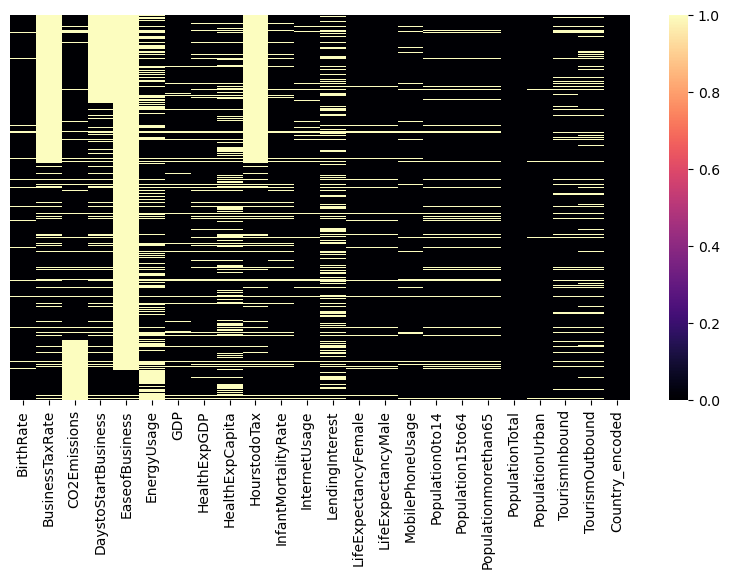

In [19]:
#visualizing the null values for each attribute
plt.figure(figsize=(10,5))
sns.heatmap(data.isnull(),cmap='magma',yticklabels=False,cbar=True)
plt.show()

**We can see that,**
- <font color=blue> 'Ease of bussiness' contain large number of missing values
- <font color=blue> 'Population Urban' contain less number of missing values
- <font color=blue> There is no missing values in 'Country' and 'Population Total'

- <font color=brown> There are 26 null values in population urban column which is less than 1% values so droping those rows

In [20]:
## Remove rows having null values
data.dropna(subset=['PopulationUrban'],inplace=True)

## check null values
data.isnull().sum()

BirthRate                119
BusinessTaxRate         1259
CO2Emissions             553
DaystoStartBusiness      964
EaseofBusiness          2494
EnergyUsage              905
GDP                      197
HealthExpGDP             283
HealthExpCapita          746
HourstodoTax            1266
InfantMortalityRate      234
InternetUsage            147
LendingInterest          807
LifeExpectancyFemale     136
LifeExpectancyMale       136
MobilePhoneUsage         141
Population0to14          195
Population15to64         195
Populationmorethan65     195
PopulationTotal            0
PopulationUrban            0
TourismInbound           342
TourismOutbound          445
Country_encoded            0
dtype: int64

- <font color='blue'> There is no null values in Population Urban

<font color=brown>Now, we have to remove missing values of remaining columns.

**The goal is to find out which is a better measure of the central tendency of data and use that value for replacing missing values appropriately.**
- First we have to check distribution of all columns present in data.
- If distribution of data is normal we use mean for replace missing values.
- When the data is skewed, it is good to consider using the median value for
  replacing the missing values.

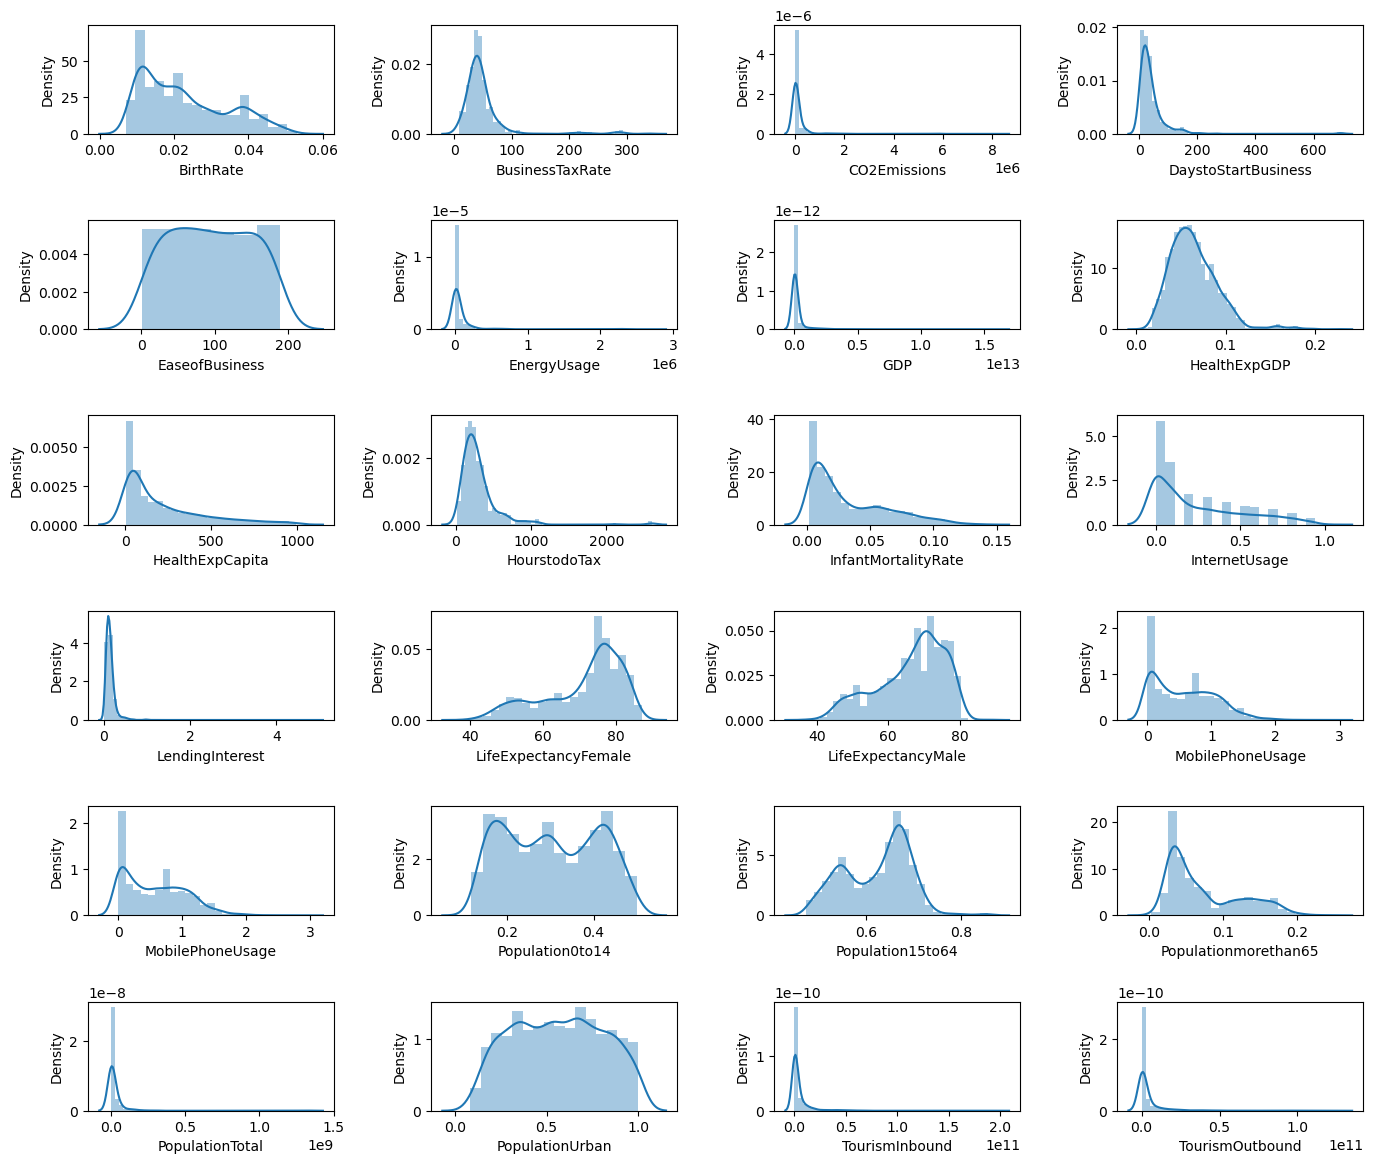

In [21]:
## Distribution plots for all columns
fig, axes=plt.subplots(6,4,figsize=(14,12),sharex=False,sharey=False)
sns.distplot(data.BirthRate,ax=axes[0,0])
sns.distplot(data.BusinessTaxRate,ax=axes[0,1])
sns.distplot(data.CO2Emissions,ax=axes[0,2])
sns.distplot(data.DaystoStartBusiness,ax=axes[0,3])
sns.distplot(data.EaseofBusiness,ax=axes[1,0])
sns.distplot(data.EnergyUsage,ax=axes[1,1])
sns.distplot(data.GDP,ax=axes[1,2])
sns.distplot(data.HealthExpGDP,ax=axes[1,3])
sns.distplot(data.HealthExpCapita,ax=axes[2,0])
sns.distplot(data.HourstodoTax,ax=axes[2,1])
sns.distplot(data.InfantMortalityRate,ax=axes[2,2])
sns.distplot(data.InternetUsage,ax=axes[2,3])
sns.distplot(data.LendingInterest,ax=axes[3,0])
sns.distplot(data.LifeExpectancyFemale,ax=axes[3,1])
sns.distplot(data.LifeExpectancyMale,ax=axes[3,2])
sns.distplot(data.MobilePhoneUsage,ax=axes[3,3])
sns.distplot(data.MobilePhoneUsage,ax=axes[4,0])
sns.distplot(data.Population0to14,ax=axes[4,1])
sns.distplot(data.Population15to64,ax=axes[4,2])
sns.distplot(data.Populationmorethan65,ax=axes[4,3])
sns.distplot(data.PopulationTotal,ax=axes[5,0])
sns.distplot(data.PopulationUrban,ax=axes[5,1])
sns.distplot(data.TourismInbound,ax=axes[5,2])
sns.distplot(data.TourismOutbound,ax=axes[5,3])
plt.tight_layout(pad=2.0)

From above visvalization we can see that,
- <font color=blue>'BusinessTaxRate', 'EaseofBusiness', 'HealthExpGDP', 'HourstodoTax' and 'Population0to14' columns has normal distribution so we replace missing values by mean.
- <font color=blue>And for remaining columns with skewed data we replace missing values by median.

In [22]:
## Replace missing values by mean

data['BusinessTaxRate'] = data['BusinessTaxRate'].fillna(data['BusinessTaxRate'].mean())
data['EaseofBusiness'] = data['EaseofBusiness'].fillna(data['EaseofBusiness'].mean())
data['HealthExpGDP'] = data['HealthExpGDP'].fillna(data['HealthExpGDP'].mean())
data['HourstodoTax'] = data['HourstodoTax'].fillna(data['HourstodoTax'].mean())
data['Population0to14'] = data['Population0to14'].fillna(data['Population0to14'].mean())

## Replace missing values by median

data['BirthRate'] = data['BirthRate'].fillna(data['BirthRate'].median())
data['CO2Emissions'] = data['CO2Emissions'].fillna(data['CO2Emissions'].median())
data['DaystoStartBusiness'] = data['DaystoStartBusiness'].fillna(data['DaystoStartBusiness'].median())
data['EnergyUsage'] = data['EnergyUsage'].fillna(data['EnergyUsage'].median())
data['HealthExpCapita']=data['HealthExpCapita'].fillna(data['HealthExpCapita'].mean())
data['GDP'] = data['GDP'].fillna(data['GDP'].median())
data['InfantMortalityRate'] = data['InfantMortalityRate'].fillna(data['InfantMortalityRate'].median())
data['InternetUsage'] = data['InternetUsage'].fillna(data['InternetUsage'].median())
data['LendingInterest'] = data['LendingInterest'].fillna(data['LendingInterest'].median())
data['LifeExpectancyFemale'] = data['LifeExpectancyFemale'].fillna(data['LifeExpectancyFemale'].median())
data['LifeExpectancyMale'] = data['LifeExpectancyMale'].fillna(data['LifeExpectancyMale'].median())
data['MobilePhoneUsage'] = data['MobilePhoneUsage'].fillna(data['MobilePhoneUsage'].median())
data['TourismInbound'] = data['TourismInbound'].fillna(data['TourismInbound'].median())
data['TourismOutbound'] = data['TourismOutbound'].fillna(data['TourismOutbound'].median())
data['Population15to64'] = data['Population15to64'].fillna(data['Population15to64'].median())
data['Populationmorethan65'] = data['Populationmorethan65'].fillna(data['Populationmorethan65'].median())

In [23]:
## check missising values
print("{} missing values present in whole data.".format(data.isnull().sum().sum()))

0 missing values present in whole data.


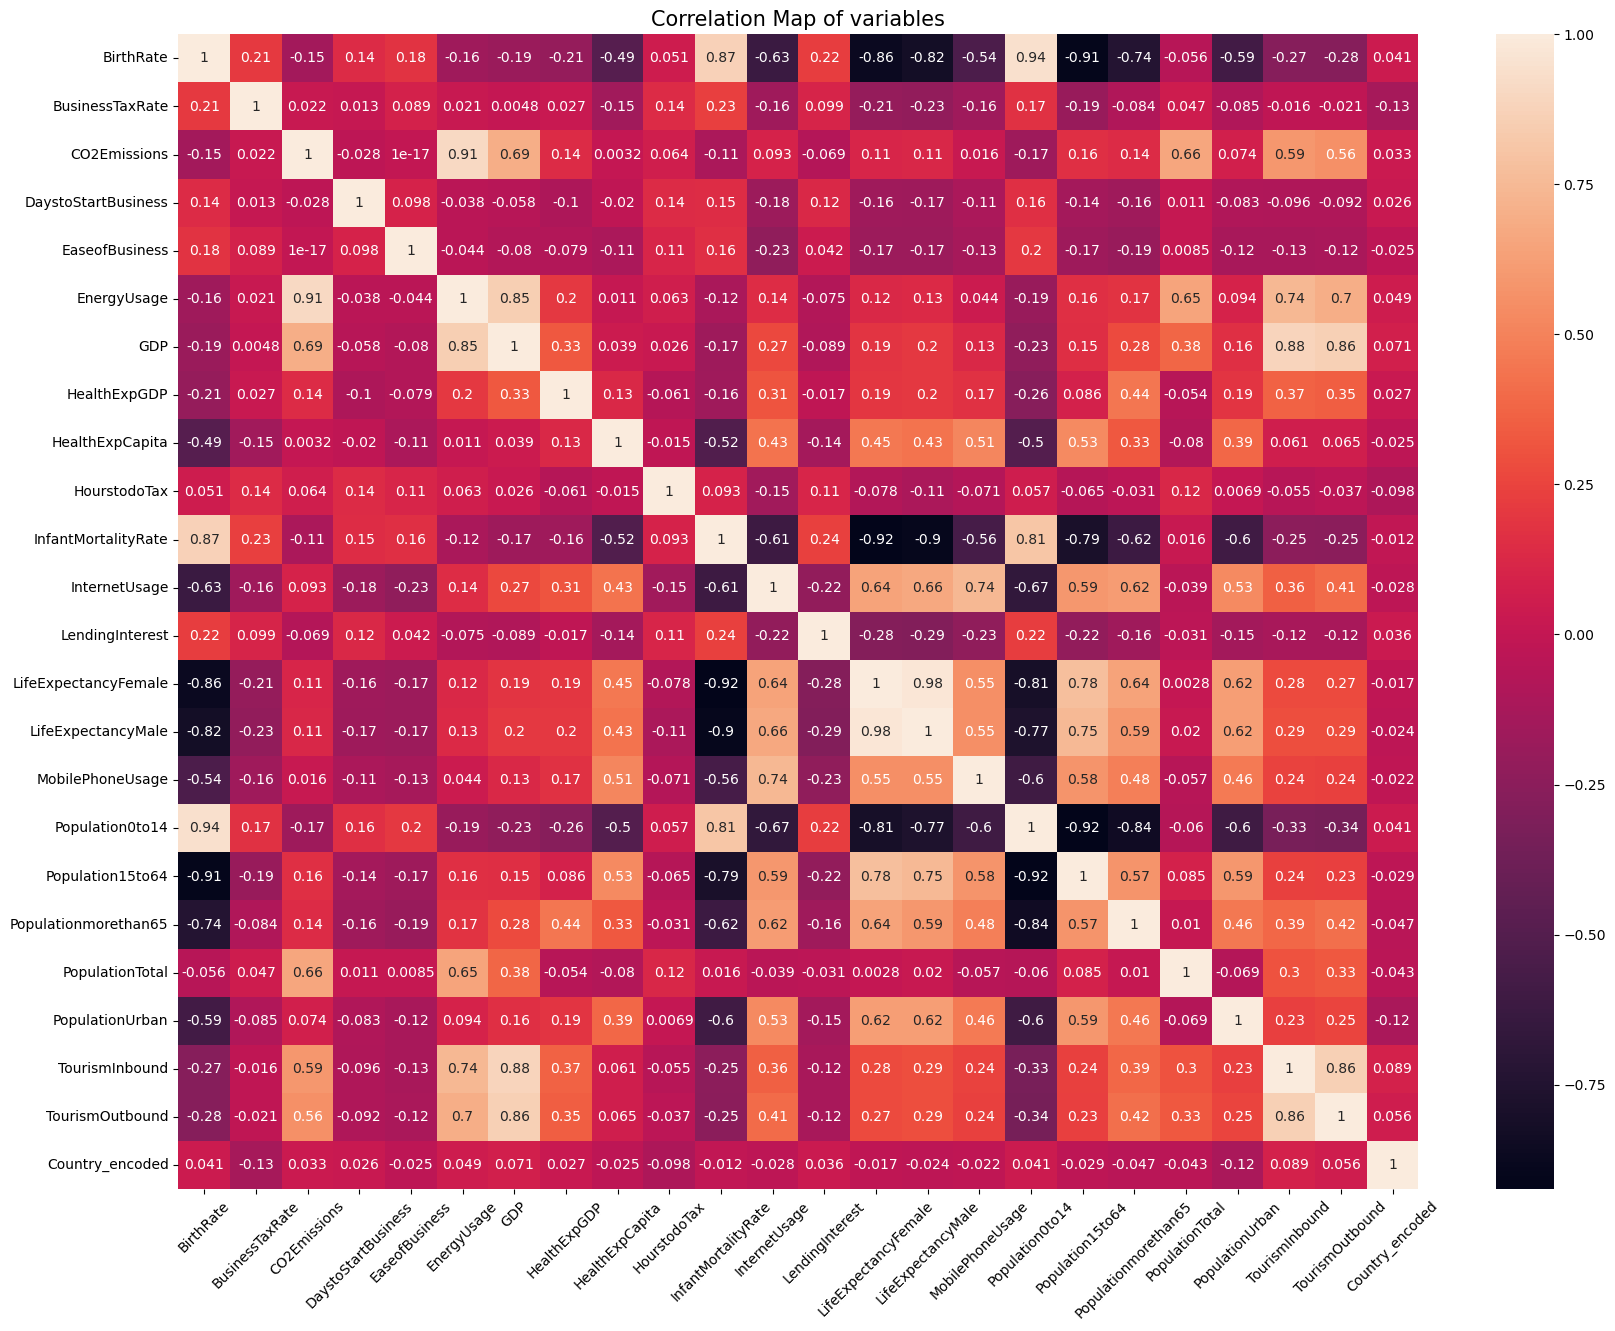

In [24]:
## visualise relation between variables
plt.figure(figsize=(20,15))
sns.heatmap(data.corr(),annot=True)
plt.xticks(rotation=45)
plt.title("Correlation Map of variables", fontsize=15)
plt.show()

### Conclusion
- <font color=blue> 'Population 0 to 14' and 'Birth Rate' has strong relation.
- <font color=blue> 'Population 15 to 64' and 'Birth Rate' has weak relation.

In [25]:
## making copy of data
data1 = data.copy()    # For method 1
data2 = data.copy()    # For method 2
data3 = data.copy()    # For method 3

## <font color=Magenta>Outlier Detection

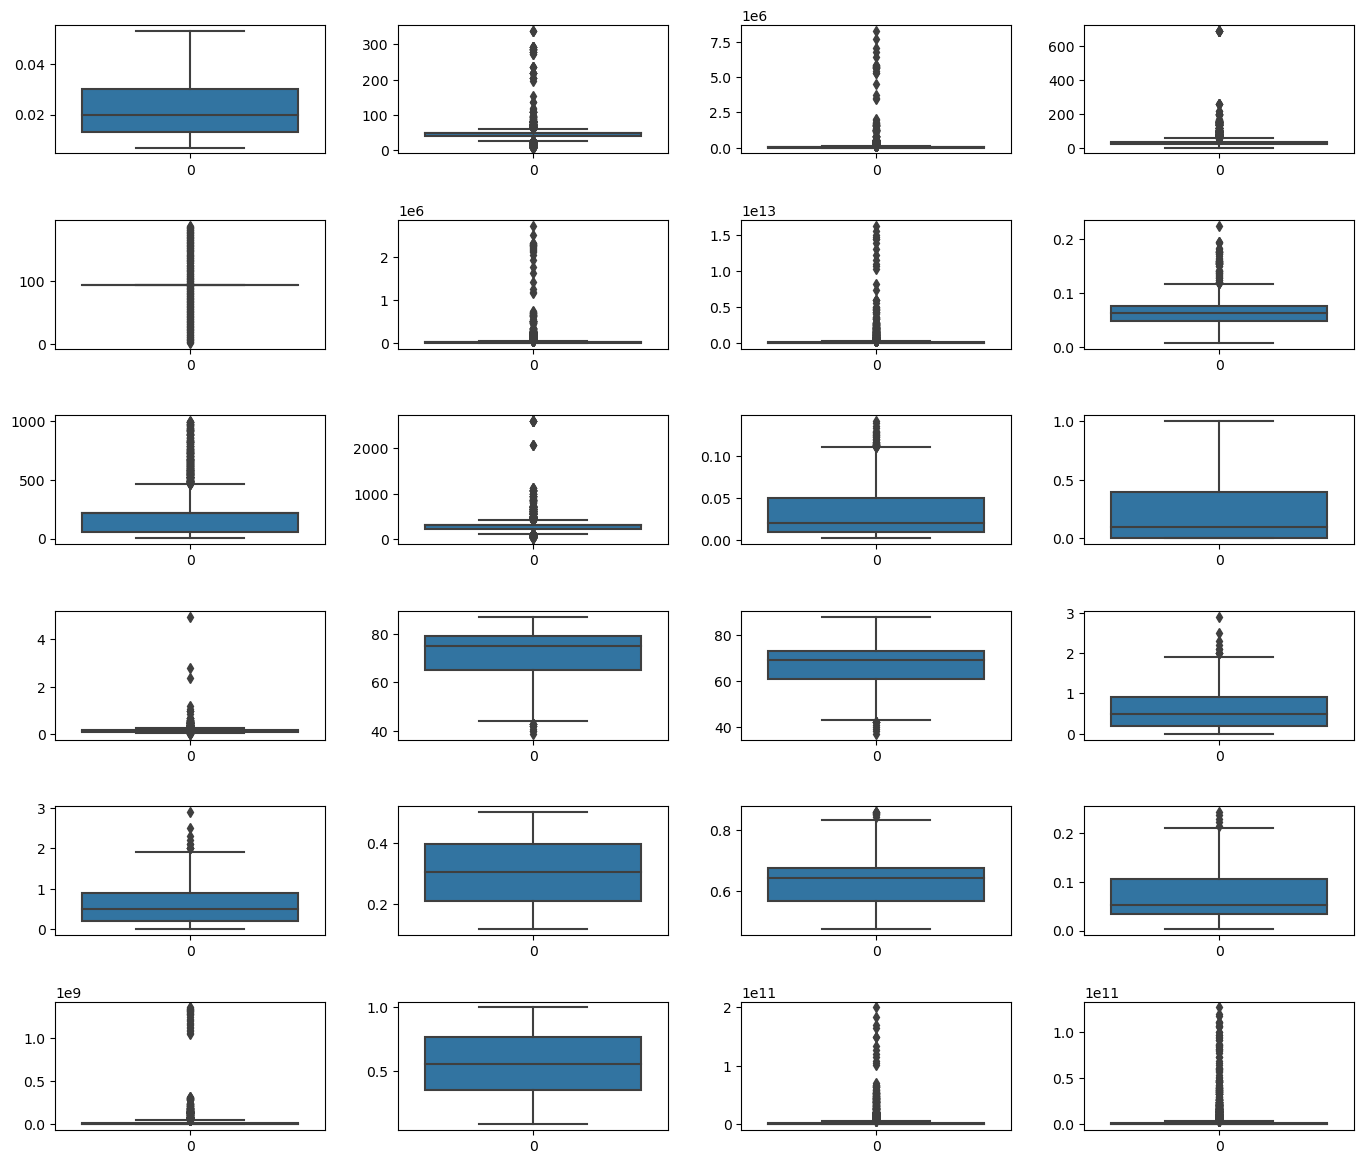

In [26]:
## Check outliers present in data1
fig, axes=plt.subplots(6,4,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(data1.BirthRate,ax=axes[0,0])
sns.boxplot(data1.BusinessTaxRate,ax=axes[0,1])
sns.boxplot(data1.CO2Emissions,ax=axes[0,2])
sns.boxplot(data1.DaystoStartBusiness,ax=axes[0,3])
sns.boxplot(data1.EaseofBusiness,ax=axes[1,0])
sns.boxplot(data1.EnergyUsage,ax=axes[1,1])
sns.boxplot(data1.GDP,ax=axes[1,2])
sns.boxplot(data1.HealthExpGDP,ax=axes[1,3])
sns.boxplot(data1.HealthExpCapita,ax=axes[2,0])
sns.boxplot(data1.HourstodoTax,ax=axes[2,1])
sns.boxplot(data1.InfantMortalityRate,ax=axes[2,2])
sns.boxplot(data1.InternetUsage,ax=axes[2,3])
sns.boxplot(data1.LendingInterest,ax=axes[3,0])
sns.boxplot(data1.LifeExpectancyFemale,ax=axes[3,1])
sns.boxplot(data1.LifeExpectancyMale,ax=axes[3,2])
sns.boxplot(data1.MobilePhoneUsage,ax=axes[3,3])
sns.boxplot(data1.MobilePhoneUsage,ax=axes[4,0])
sns.boxplot(data1.Population0to14,ax=axes[4,1])
sns.boxplot(data1.Population15to64,ax=axes[4,2])
sns.boxplot(data1.Populationmorethan65,ax=axes[4,3])
sns.boxplot(data1.PopulationTotal,ax=axes[5,0])
sns.boxplot(data1.PopulationUrban,ax=axes[5,1])
sns.boxplot(data1.TourismInbound,ax=axes[5,2])
sns.boxplot(data1.TourismOutbound,ax=axes[5,3])
plt.tight_layout(pad=2.0)

### Conclusion
- <font color=blue> Some columns like "Population Total", "Tourism in bound", "Tourism out bound" has large number of outlier present.
- <font color=blue> columns like "Population Urban", "Population 0 to 14" has less number of outliers.

# <font color='green'>Method 1

### Remove Outliers
here, we are removing outliers using inter quratile range method

In [27]:
## Outlier removal
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1

data1 = data1[~((data1 < (Q1 - 1.5 * IQR)) | (data1 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [28]:
data1.shape

(1038, 24)

By outlier removal we lost 60% of data.

## <font color='magenta'> Scaling</font>
   &nbsp;   Scaling is a technique to standardize the independent features present in the data in a fixed range. We do this to make sure all the features are in same scale.</font>
 
There are two types of scaling
 - Standard Scaling 
 - MinMax Scaling

#### Here we will be using  Standard Scaler

In [29]:
## Standardization of data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scale_data = scaler.fit_transform(data1)

### Apply PCA

In [30]:
from sklearn.decomposition import PCA
pc = PCA()
pc_components = pc.fit_transform(scale_data)

In [31]:
# The amount of variance that each PCA explains is
pc.explained_variance_

array([8.80263184e+00, 2.93166999e+00, 1.88258907e+00, 1.22923438e+00,
       1.11158397e+00, 9.68177915e-01, 8.84572953e-01, 7.54272809e-01,
       6.86606730e-01, 6.19812318e-01, 5.82121321e-01, 4.82942967e-01,
       4.39530900e-01, 3.71017224e-01, 3.14063229e-01, 2.67903587e-01,
       2.35137280e-01, 1.79273215e-01, 1.30046963e-01, 8.47006744e-02,
       5.02070503e-02, 1.40302688e-02, 5.27142528e-05, 7.03739613e-34])

In [32]:
# in percentage - The amount of variance that each PCA explains is
var = pc.explained_variance_ratio_
var

array([3.82354411e-01, 1.27341115e-01, 8.17728433e-02, 5.33934847e-02,
       4.82831774e-02, 4.20541383e-02, 3.84226419e-02, 3.27628761e-02,
       2.98237069e-02, 2.69223998e-02, 2.52852396e-02, 2.09772915e-02,
       1.90916287e-02, 1.61156430e-02, 1.36417680e-02, 1.16367605e-02,
       1.02135109e-02, 7.78697848e-03, 5.64876854e-03, 3.67909020e-03,
       2.18081223e-03, 6.09424007e-04, 2.28971602e-06, 3.05678972e-35])

In [33]:
# Cumulative variance
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 38.24,  50.97,  59.15,  64.49,  69.32,  73.53,  77.37,  80.65,
        83.63,  86.32,  88.85,  90.95,  92.86,  94.47,  95.83,  96.99,
        98.01,  98.79,  99.35,  99.72,  99.94, 100.  , 100.  , 100.  ])

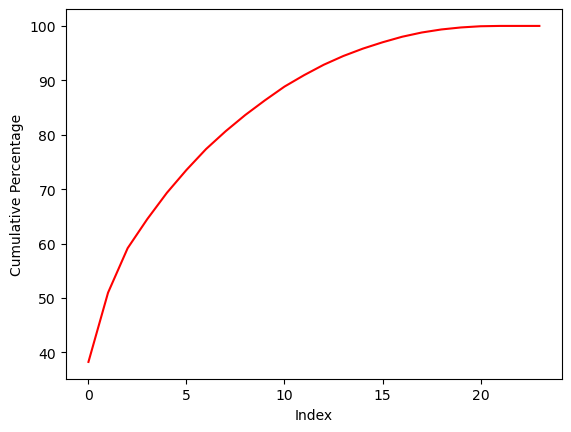

In [34]:
# Variance plot for PCA components obtained
plt.plot(var1,color='red')
plt.xlabel('Index')
plt.ylabel('Cumulative Percentage')
plt.show()

Looking at graph we can decide how much percentage we want and accordingly go for that much column numbers.
here, we are taking 15 columns because they are giving more than 95% data. 

In [35]:
data_pca = pc_components[:,:15]

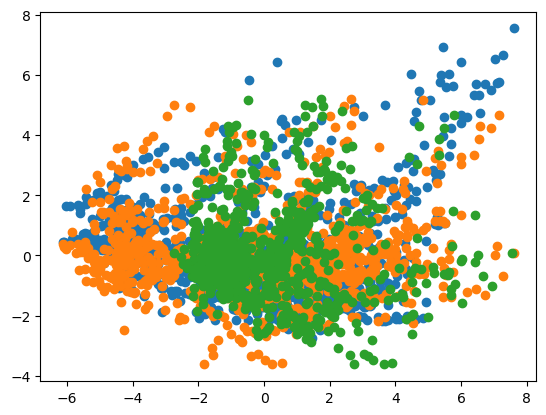

In [36]:
## Plot between PCA's
x=pc_components[:,0]
y=pc_components[:,1]
z=pc_components[:,2]
plt.scatter(x,y)
plt.scatter(x,z)
plt.scatter(y,z)
plt.show()

# <font color='magenta'> Model Building

**There are various types of clustring mostly used are :**
   - k-means clustring
   - Hierarchy clustring
   - DBSCAN clustring

## <font color='purple'> K-means Clustring
#### Using the elbow method to find the optimal number of clusters

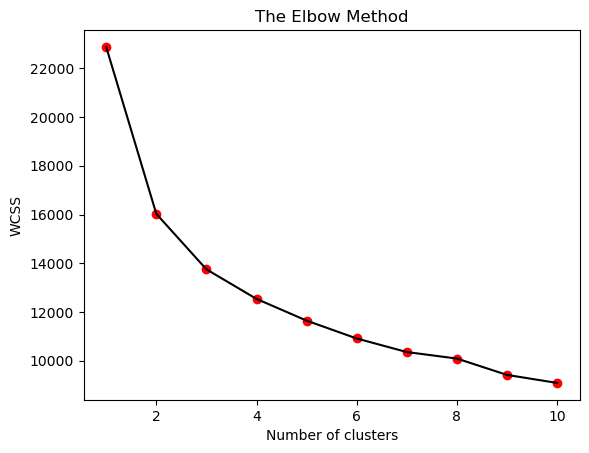

In [37]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_pca)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss,color= 'black')
plt.scatter(range(1,11),wcss,color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can see, 
- 3 is the elbow point.
- We have to create three clusters

In [38]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
silhouette_avg_list=[]
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data_pca)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(data_pca, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    silhouette_avg_list.append(silhouette_avg)

For n_clusters=2, the silhouette score is 0.2805971241431633
For n_clusters=3, the silhouette score is 0.28128112023335605
For n_clusters=4, the silhouette score is 0.20666374509283597
For n_clusters=5, the silhouette score is 0.19540179856619103
For n_clusters=6, the silhouette score is 0.21176682882552594
For n_clusters=7, the silhouette score is 0.1846107197780951
For n_clusters=8, the silhouette score is 0.18434132491155575


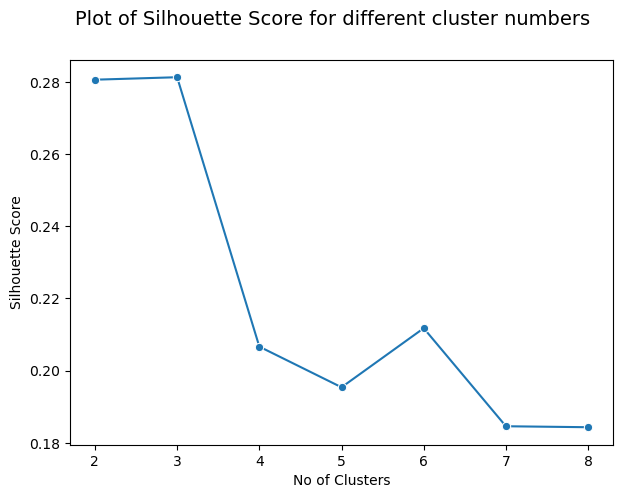

In [39]:
# plt.plot(ssd)
plt.figure(figsize=(7,5))
ax= sns.lineplot(y=silhouette_avg_list,x= range_n_clusters,marker='o')
ax.set(xlabel='No of Clusters', ylabel='Silhouette Score');
plt.suptitle("Plot of Silhouette Score for different cluster numbers",fontsize=14);

### Observation
The sillhoutte score reduces with 3 clusters hence reassuring that 2 or 3 clusters is the most appropriate number of clusters

Kmeans method with number of clusters = 3

In [40]:
# final model with k=3
chosen_clusters =3
kmeans = KMeans(n_clusters=chosen_clusters, max_iter=50,random_state=0)
kmeans.fit(data_pca)

KMeans(max_iter=50, n_clusters=3, random_state=0)

In [41]:
# assign the label
data1['cluster_id'] = kmeans.labels_
data1.head()

BirthRate  BusinessTaxRate  CO2Emissions  DaystoStartBusiness  \
0      0.020        49.051656       87931.0                 26.0   
2      0.043        49.051656        1617.0                 26.0   
3      0.027        49.051656        4276.0                 26.0   
4      0.046        49.051656        1041.0                 26.0   
5      0.042        49.051656         301.0                 26.0   

   EaseofBusiness  EnergyUsage           GDP  HealthExpGDP  HealthExpCapita  \
0       94.869565      26998.0  5.479006e+10         0.035             60.0   
2       94.869565       1983.0  2.359122e+09         0.043             15.0   
3       94.869565       1836.0  5.788312e+09         0.047            152.0   
4       94.869565      14673.0  2.610959e+09         0.051             12.0   
5       94.869565      14673.0  8.704861e+08         0.063              7.0   

   HourstodoTax  ...  MobilePhoneUsage  Population0to14  Population15to64  \
0    302.461048  ...               0.0            0.342             0.619   
2    302.461048  ...               0.0            0.454             0.517   
3    302.461048  ...               0.1            0.383             0.587   
4    302.461048  ...               0.0            0.468             0.505   
5    302.461048  ...               0.0            0.490             0.481   

   Populationmorethan65  PopulationTotal  PopulationUrban  TourismInbound  \
0                 0.039         31719449            0.599     102000000.0   
2                 0.029          6949366            0.383      77000000.0   
3                 0.029          1755375            0.532     227000000.0   
4                 0.028         11607944            0.178      23000000.0   
5                 0.029          6674286            0.082       1400000.0   

   TourismOutbound  Country_encoded  cluster_id  
0      193000000.0              2.0           2  
2       50000000.0             20.0           0  
3      209000000.0             25.0           0  
4       30000000.0             29.0           0  
5       14000000.0             30.0           0  

[5 rows x 25 columns]

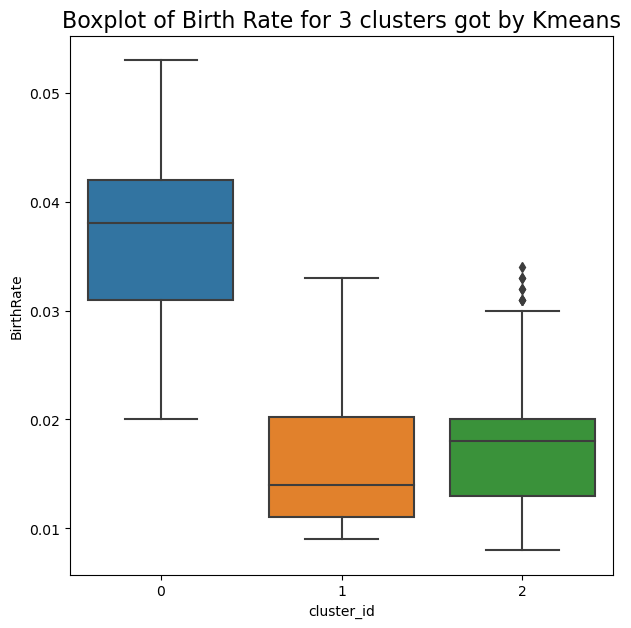

In [42]:
# plot
plt.figure(figsize=(7,7))
plt.title("Boxplot of Birth Rate for 3 clusters got by Kmeans",fontdict={"size":16})
sns.boxplot(x='cluster_id',y="BirthRate", data=data1);

Observation
Cluster 1 has the lowest Birth Rate. 

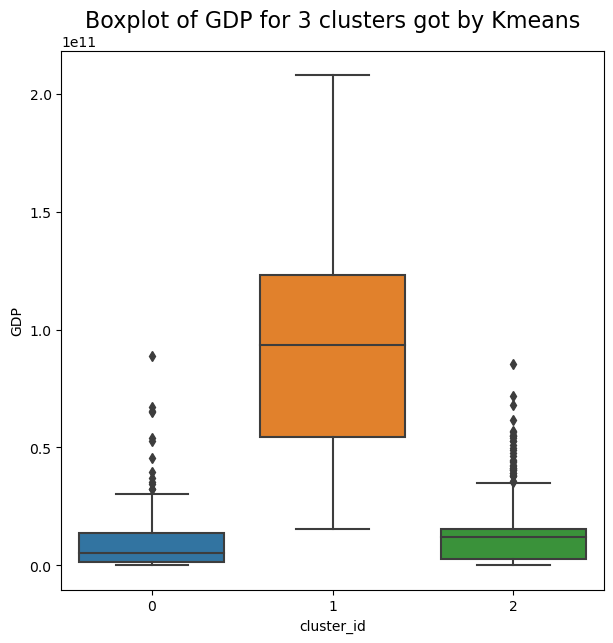

In [43]:
plt.figure(figsize=(7,7))
plt.title("Boxplot of GDP for 3 clusters got by Kmeans",fontdict={"size":16})
sns.boxplot(x='cluster_id',y="GDP", data=data1);


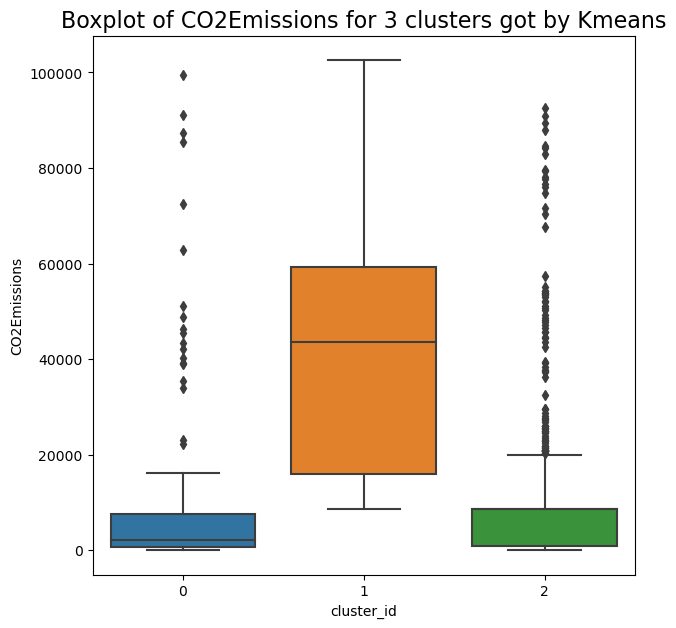

In [44]:
plt.figure(figsize=(7,7))
plt.title("Boxplot of CO2Emissions for 3 clusters got by Kmeans",fontdict={"size":16})
sns.boxplot(x='cluster_id',y="CO2Emissions", data=data1);

In [45]:
## creating clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_pca)

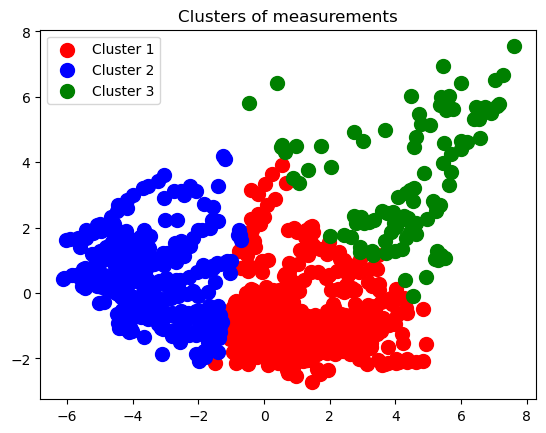

In [46]:
plt.scatter(data_pca[y_kmeans == 0, 0], data_pca[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca[y_kmeans == 1, 0], data_pca[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca[y_kmeans == 2, 0], data_pca[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of measurements')
plt.legend()
plt.show()

We get the three clusters of measurments.

In [47]:
## Accuracy check
from sklearn.metrics import silhouette_score
s1_kmeans = silhouette_score(data_pca, y_kmeans)
print('Silhouette Score for K-means clustring :', s1_kmeans)

Silhouette Score for K-means clustring : 0.28128112023335605


# Hierarchical Clustering

In [48]:
#importing libraries
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [49]:
from sklearn.cluster import AgglomerativeClustering

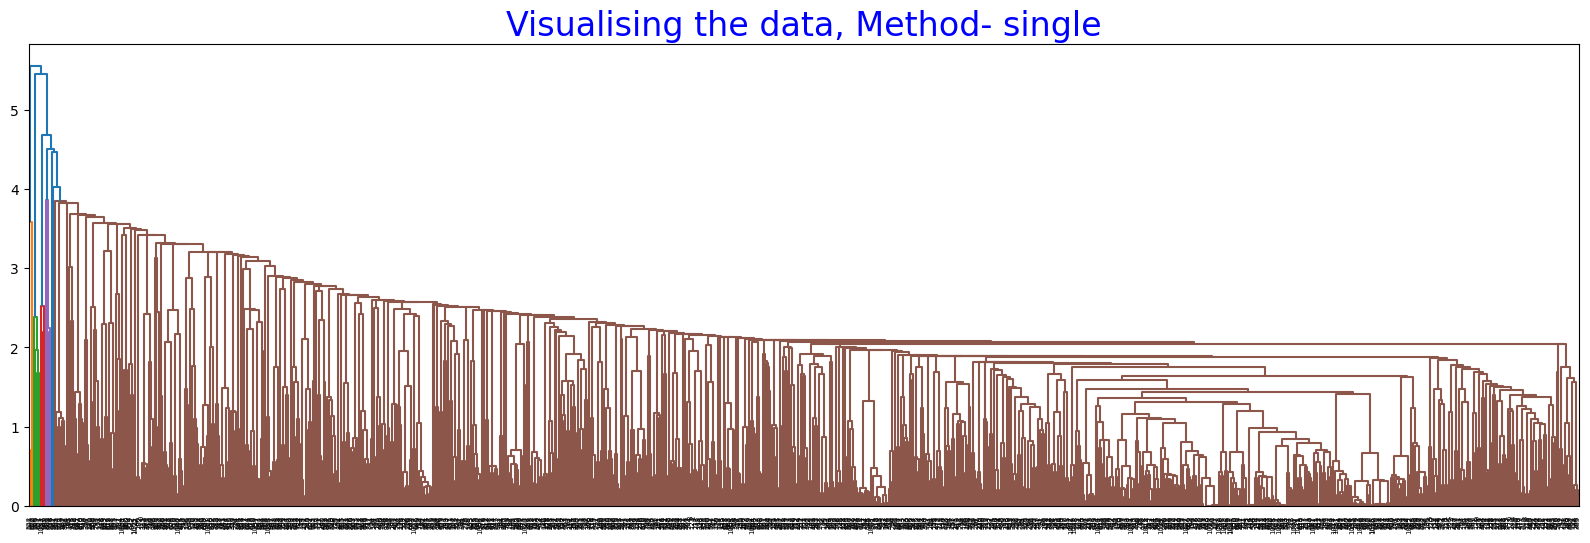

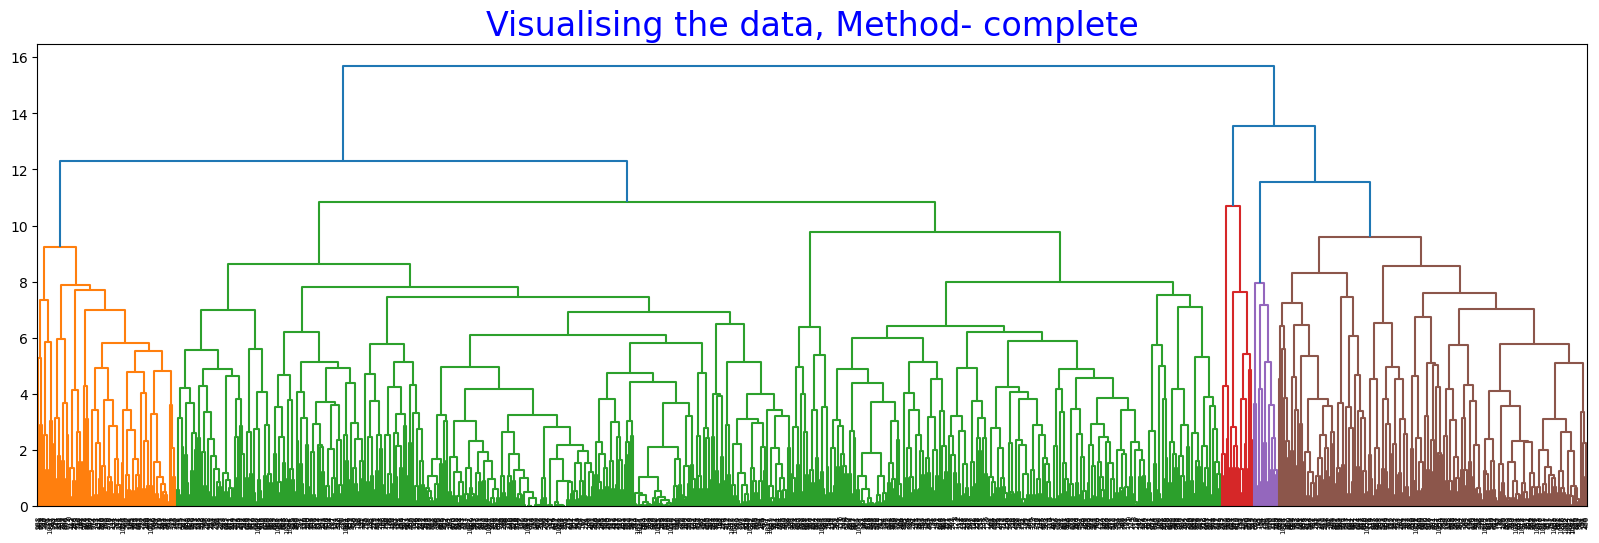

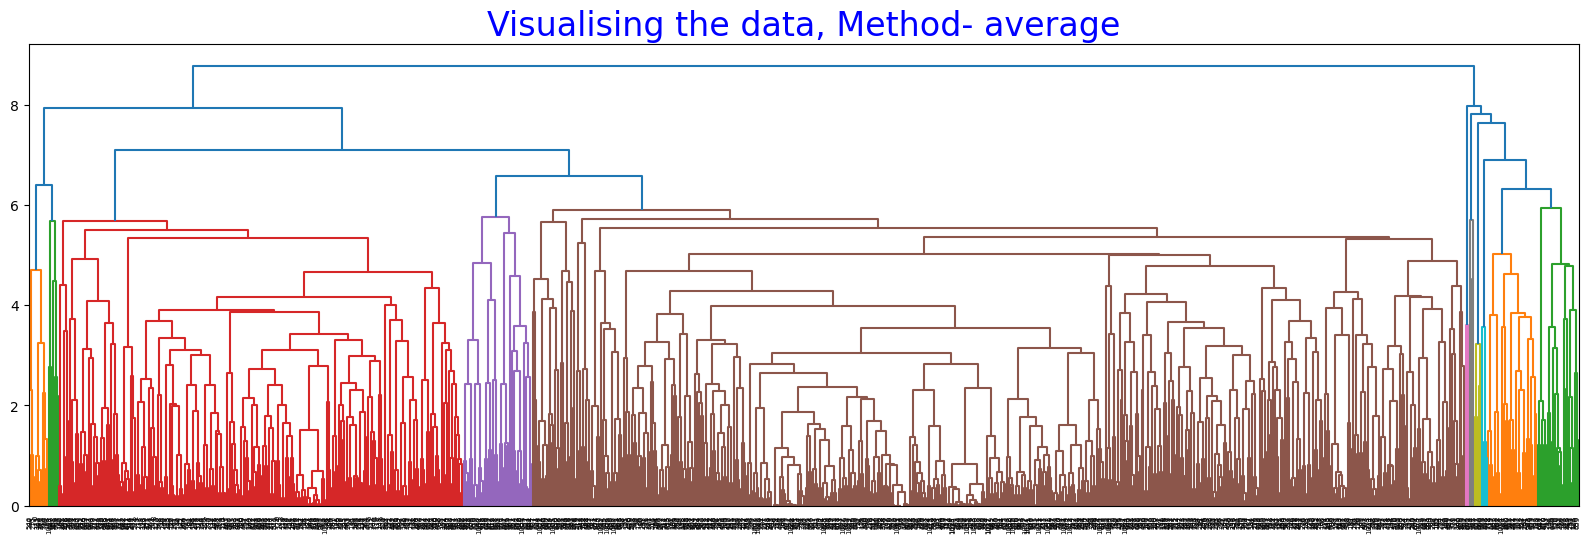

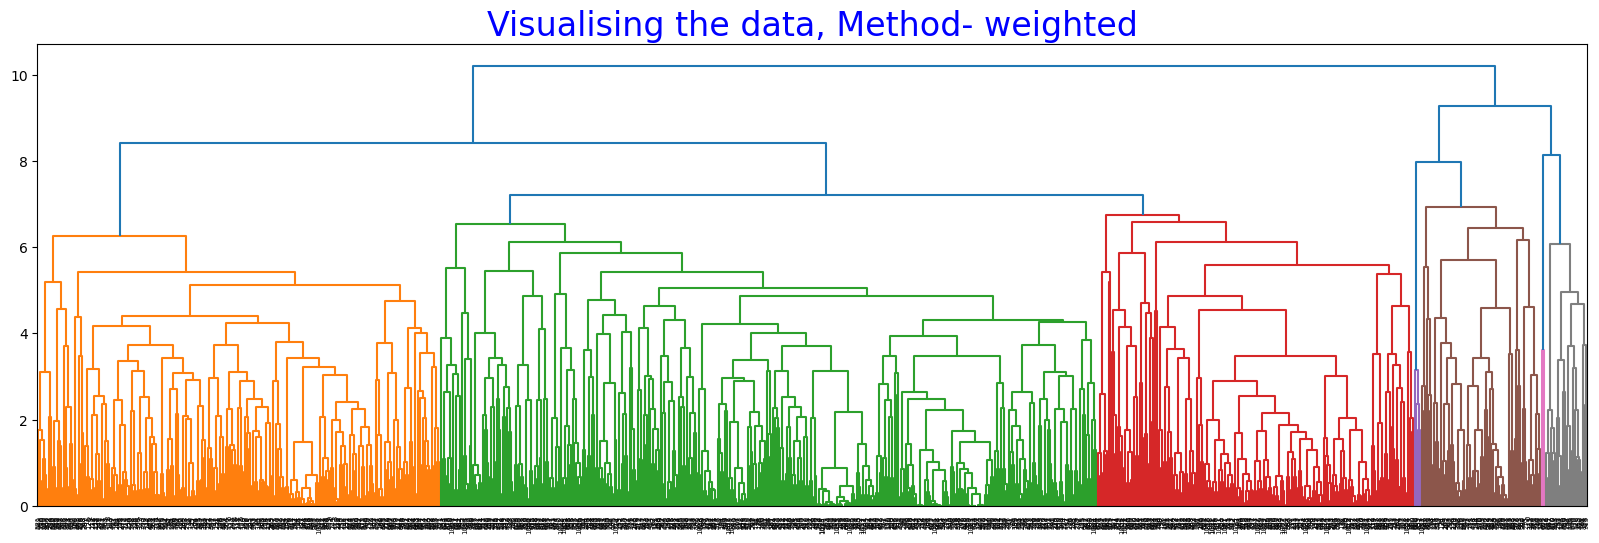

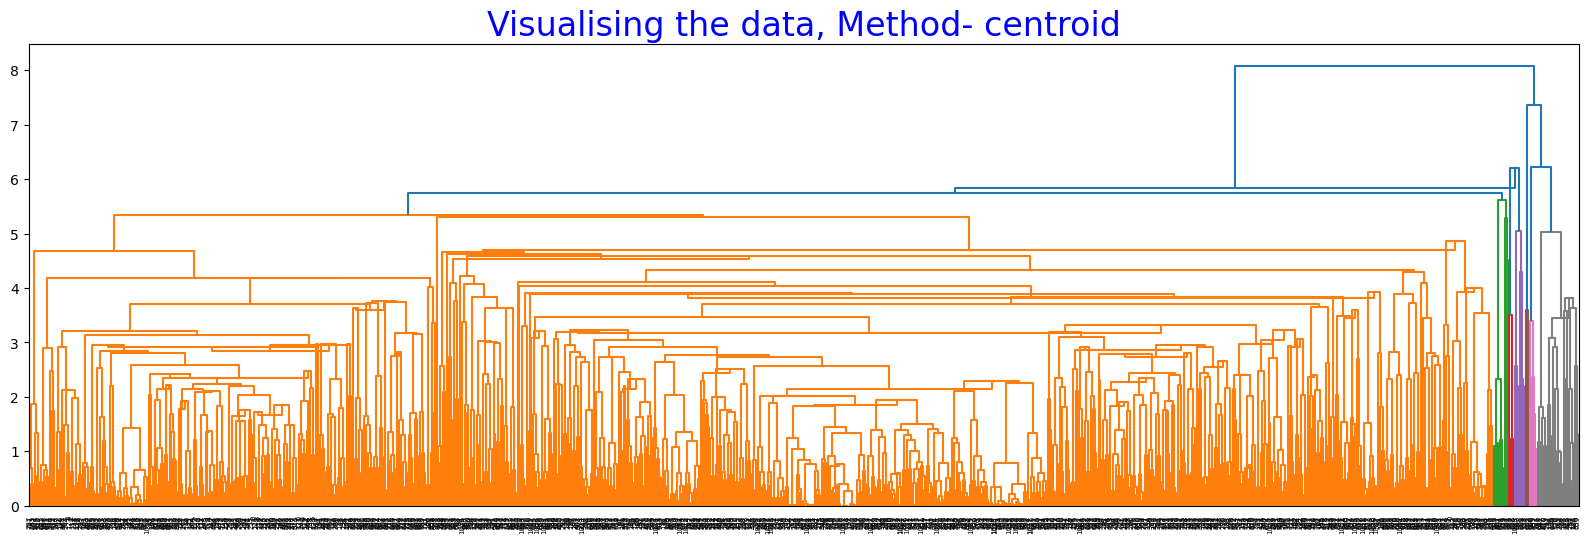

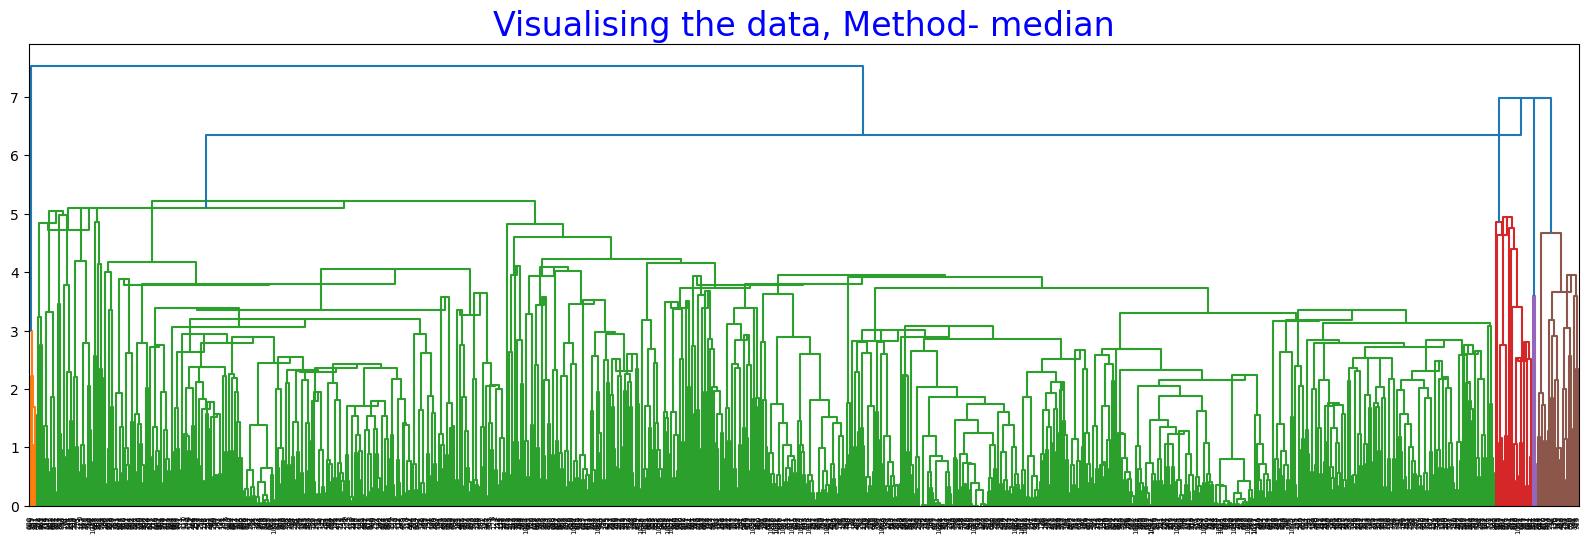

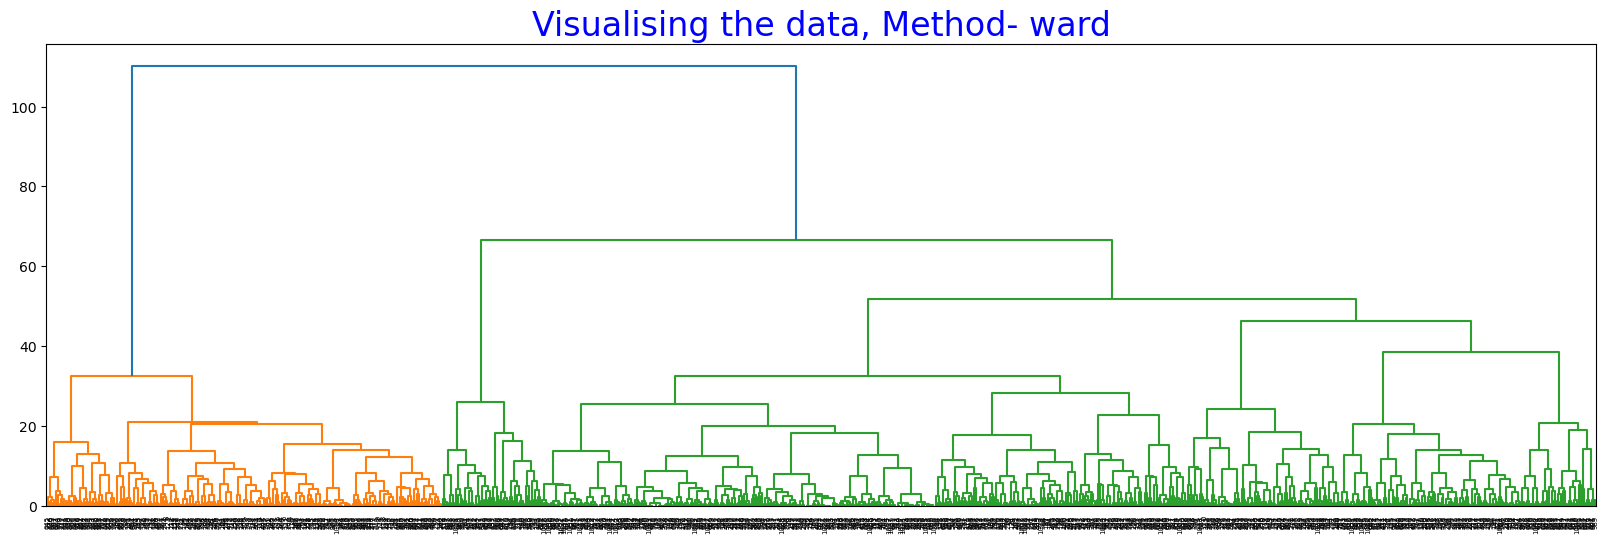

In [50]:
# Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.
# Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding. 
# Ward method is commanly used since it is simpler to visualize understanding.
# Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(data_pca, method = methods,optimal_ordering=False))

In [51]:
n_clusters = [2,3,4,5,6,7,8,9,10]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(data_pca)
        silhouette_score1 = silhouette_score(data_pca, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.2705645360165296
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.19241690440676312
For n_clusters = 2 The average silhouette_score with linkage- average : 0.31249096189706677
For n_clusters = 2 The average silhouette_score with linkage- single : 0.32610141138385923

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.26163313808955
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.162553360563126
For n_clusters = 3 The average silhouette_score with linkage- average : 0.302875056607728
For n_clusters = 3 The average silhouette_score with linkage- single : 0.3176412342722478

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.2081202665762478
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.12848840916564677
For n_clusters = 4 The average silhouette_score with linkage- average : 0.23182171191867992
For 

#### The seperation in Ward Method indicate that 2 is the optimal number for clusters.
Ward method is actually a method that tries to minimize the variance within each cluster. In K-means when we were trying to minimize the wcss to plot our elbow method chart, here it’s almost the same the only difference is that instead of minimizing wcss we are minimizing the within-cluster variants. That is the variance within each cluster.

Hierarchial method with number of clusters = 3

In [52]:
# assign cluster labels
data1['cluster_labels'] = cluster_labels
data1.head()

BirthRate  BusinessTaxRate  CO2Emissions  DaystoStartBusiness  \
0      0.020        49.051656       87931.0                 26.0   
2      0.043        49.051656        1617.0                 26.0   
3      0.027        49.051656        4276.0                 26.0   
4      0.046        49.051656        1041.0                 26.0   
5      0.042        49.051656         301.0                 26.0   

   EaseofBusiness  EnergyUsage           GDP  HealthExpGDP  HealthExpCapita  \
0       94.869565      26998.0  5.479006e+10         0.035             60.0   
2       94.869565       1983.0  2.359122e+09         0.043             15.0   
3       94.869565       1836.0  5.788312e+09         0.047            152.0   
4       94.869565      14673.0  2.610959e+09         0.051             12.0   
5       94.869565      14673.0  8.704861e+08         0.063              7.0   

   HourstodoTax  ...  Population0to14  Population15to64  Populationmorethan65  \
0    302.461048  ...            0.342             0.619                 0.039   
2    302.461048  ...            0.454             0.517                 0.029   
3    302.461048  ...            0.383             0.587                 0.029   
4    302.461048  ...            0.468             0.505                 0.028   
5    302.461048  ...            0.490             0.481                 0.029   

   PopulationTotal  PopulationUrban  TourismInbound  TourismOutbound  \
0         31719449            0.599     102000000.0      193000000.0   
2          6949366            0.383      77000000.0       50000000.0   
3          1755375            0.532     227000000.0      209000000.0   
4         11607944            0.178      23000000.0       30000000.0   
5          6674286            0.082       1400000.0       14000000.0   

   Country_encoded  cluster_id  cluster_labels  
0              2.0           2               2  
2             20.0           0               6  
3             25.0           0               6  
4             29.0           0               6  
5             30.0           0               6  

[5 rows x 26 columns]

In [53]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')
y_hc = hc.fit_predict(data_pca)

# Kmeans and Hierarchial methods with 3  clusters are visually compared

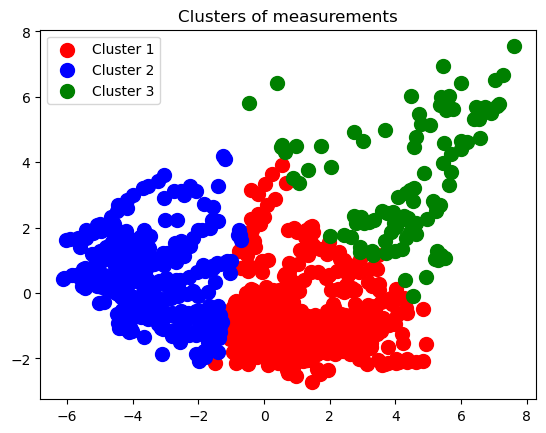

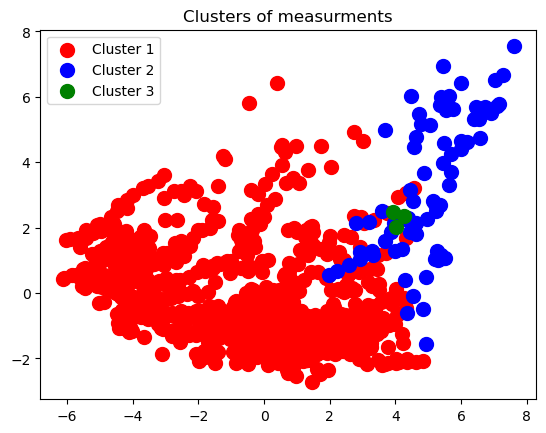

In [54]:
# K-menas clustring
plt.scatter(data_pca[y_kmeans == 0, 0], data_pca[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca[y_kmeans == 1, 0], data_pca[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca[y_kmeans == 2, 0], data_pca[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of measurements')
plt.legend()
plt.show()
## Hieraechial Clustering
plt.scatter(data_pca[y_hc == 0, 0], data_pca[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca[y_hc == 1, 0], data_pca[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca[y_hc == 2, 0], data_pca[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of measurments')
plt.legend()
plt.show()

In [55]:
## Accuracy check
s1_hierarchy = silhouette_score(data_pca,y_hc)
print('Silhouette Score for Hierarchy clustring :',s1_hierarchy)

Silhouette Score for Hierarchy clustring : 0.302875056607728


## <font color='purple'> DBSCAN

In [56]:
from sklearn.cluster import DBSCAN

eps = 0.3
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the data to obtain clustering labels
dbscan_labels = dbscan.fit_predict(data_pca)

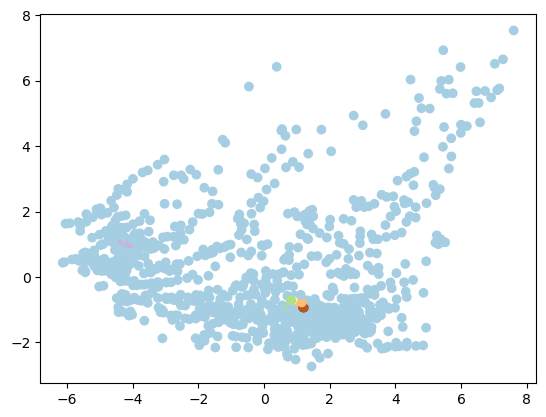

In [57]:
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=dbscan_labels,cmap='Paired')
plt.show()

In [58]:
data1['cluster']=dbscan.labels_
data1.head()

BirthRate  BusinessTaxRate  CO2Emissions  DaystoStartBusiness  \
0      0.020        49.051656       87931.0                 26.0   
2      0.043        49.051656        1617.0                 26.0   
3      0.027        49.051656        4276.0                 26.0   
4      0.046        49.051656        1041.0                 26.0   
5      0.042        49.051656         301.0                 26.0   

   EaseofBusiness  EnergyUsage           GDP  HealthExpGDP  HealthExpCapita  \
0       94.869565      26998.0  5.479006e+10         0.035             60.0   
2       94.869565       1983.0  2.359122e+09         0.043             15.0   
3       94.869565       1836.0  5.788312e+09         0.047            152.0   
4       94.869565      14673.0  2.610959e+09         0.051             12.0   
5       94.869565      14673.0  8.704861e+08         0.063              7.0   

   HourstodoTax  ...  Population15to64  Populationmorethan65  PopulationTotal  \
0    302.461048  ...             0.619                 0.039         31719449   
2    302.461048  ...             0.517                 0.029          6949366   
3    302.461048  ...             0.587                 0.029          1755375   
4    302.461048  ...             0.505                 0.028         11607944   
5    302.461048  ...             0.481                 0.029          6674286   

   PopulationUrban  TourismInbound  TourismOutbound  Country_encoded  \
0            0.599     102000000.0      193000000.0              2.0   
2            0.383      77000000.0       50000000.0             20.0   
3            0.532     227000000.0      209000000.0             25.0   
4            0.178      23000000.0       30000000.0             29.0   
5            0.082       1400000.0       14000000.0             30.0   

   cluster_id  cluster_labels  cluster  
0           2               2       -1  
2           0               6       -1  
3           0               6       -1  
4           0               6       -1  
5           0               6       -1  

[5 rows x 27 columns]

In [59]:
# Use pandas filtering and get noisy datapoints -1
data1[data1['cluster']==-1]

BirthRate  BusinessTaxRate  CO2Emissions  DaystoStartBusiness  \
0         0.020        49.051656       87931.0                 26.0   
2         0.043        49.051656        1617.0                 26.0   
3         0.027        49.051656        4276.0                 26.0   
4         0.046        49.051656        1041.0                 26.0   
5         0.042        49.051656         301.0                 26.0   
...         ...              ...           ...                  ...   
2669      0.013        49.051656        8529.0                 26.0   
2674      0.013        49.051656        8529.0                 26.0   
2679      0.014        49.051656        8529.0                 26.0   
2699      0.020        49.051656        8529.0                 26.0   
2703      0.011        49.051656        8529.0                 26.0   

      EaseofBusiness  EnergyUsage           GDP  HealthExpGDP  \
0          94.869565      26998.0  5.479006e+10       0.03500   
2          94.869565       1983.0  2.359122e+09       0.04300   
3          94.869565       1836.0  5.788312e+09       0.04700   
4          94.869565      14673.0  2.610959e+09       0.05100   
5          94.869565      14673.0  8.704861e+08       0.06300   
...              ...          ...           ...           ...   
2669       94.869565      14673.0  1.549332e+10       0.06417   
2674       94.869565      14673.0  1.549332e+10       0.06417   
2679       94.869565      14673.0  1.549332e+10       0.06417   
2699       94.869565      14673.0  1.549332e+10       0.06417   
2703       94.869565      14673.0  1.549332e+10       0.06417   

      HealthExpCapita  HourstodoTax  ...  Population15to64  \
0           60.000000    302.461048  ...             0.619   
2           15.000000    302.461048  ...             0.517   
3          152.000000    302.461048  ...             0.587   
4           12.000000    302.461048  ...             0.505   
5            7.000000    302.461048  ...             0.481   
...               ...           ...  ...               ...   
2669       214.627847    302.461048  ...             0.642   
2674       214.627847    302.461048  ...             0.668   
2679       214.627847    302.461048  ...             0.642   
2699       214.627847    302.461048  ...             0.642   
2703       214.627847    302.461048  ...             0.641   

      Populationmorethan65  PopulationTotal  PopulationUrban  TourismInbound  \
0                    0.039         31719449            0.599     102000000.0   
2                    0.029          6949366            0.383      77000000.0   
3                    0.029          1755375            0.532     227000000.0   
4                    0.028         11607944            0.178      23000000.0   
5                    0.029          6674286            0.082       1400000.0   
...                    ...              ...              ...             ...   
2669                 0.052            57570            1.000     688500000.0   
2674                 0.137           152056            0.897     676000000.0   
2679                 0.052            56810            0.852     688500000.0   
2699                 0.052            32427            0.911     688500000.0   
2703                 0.152           105275            0.949     688500000.0   

      TourismOutbound  Country_encoded  cluster_id  cluster_labels  cluster  
0         193000000.0              2.0           2               2       -1  
2          50000000.0             20.0           0               6       -1  
3         209000000.0             25.0           0               6       -1  
4          30000000.0             29.0           0               6       -1  
5          14000000.0             30.0           0               6       -1  
...               ...              ...         ...             ...      ...  
2669      456000000.0             34.0           2               0       -1  
2674      357000000.0             47.0    

In [60]:
s1_dbscan = silhouette_score(data_pca, dbscan_labels)
print("Silhouette Score for DBSCAN is:", s1_dbscan)

Silhouette Score for DBSCAN is: -0.32139565085833927


<font color=blue>DBSCAN is not most effective on this dataset

We get clustrers but, we used outlier removal data. Problem with that data is we have only 40% data left after removing outliers. Which means we loss more than 50% information from out dataset. So, we have to keep outliers. Now, create clusters with this data.

# <font color='green'> Method 2
**With outliers**

In [61]:
## Standardization of data
scaler = StandardScaler()
scale_data = scaler.fit_transform(data2)

### Apply PCA

In [62]:
pc = PCA()
pc_components = pc.fit_transform(scale_data)

In [63]:
# in percentage - The amount of variance that each PCA explains is
var = pc.explained_variance_ratio_
var

array([3.52595664e-01, 1.66668623e-01, 6.12948589e-02, 5.33069518e-02,
       4.59935300e-02, 3.98740358e-02, 3.80856924e-02, 3.31573767e-02,
       3.28690286e-02, 3.23744527e-02, 2.94653611e-02, 2.47605986e-02,
       2.11842644e-02, 1.84471846e-02, 1.25144343e-02, 1.08721054e-02,
       8.89476326e-03, 5.34362958e-03, 4.34563896e-03, 3.55670903e-03,
       2.12578633e-03, 1.60464989e-03, 6.63127567e-04, 1.53314868e-06])

In [64]:
# Cumulative variance
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 35.26,  51.93,  58.06,  63.39,  67.99,  71.98,  75.79,  79.11,
        82.4 ,  85.64,  88.59,  91.07,  93.19,  95.03,  96.28,  97.37,
        98.26,  98.79,  99.22,  99.58,  99.79,  99.95, 100.02, 100.02])

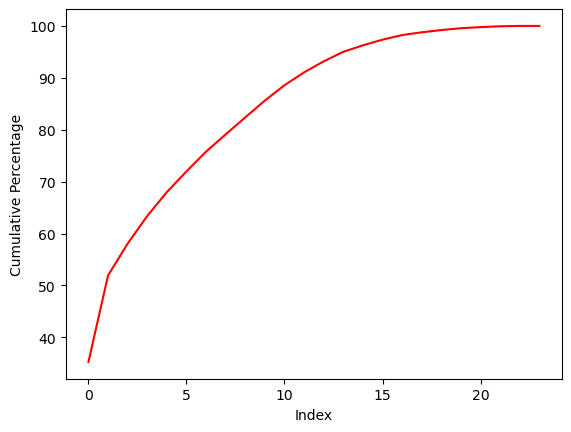

In [65]:
# Variance plot for PCA components obtained
plt.plot(var1,color='red')
plt.xlabel('Index')
plt.ylabel('Cumulative Percentage')
plt.show()

Looking at graph we can decide how much percentage we want and accordingly go for that much column numbers.
here, we are taking 15 columns because they are giving more than 95% data. 

In [66]:
data_pca2 = pc_components[:,:15]

## <font color='purple'> K-means Clustring
#### Using the elbow method to find the optimal number of clusters

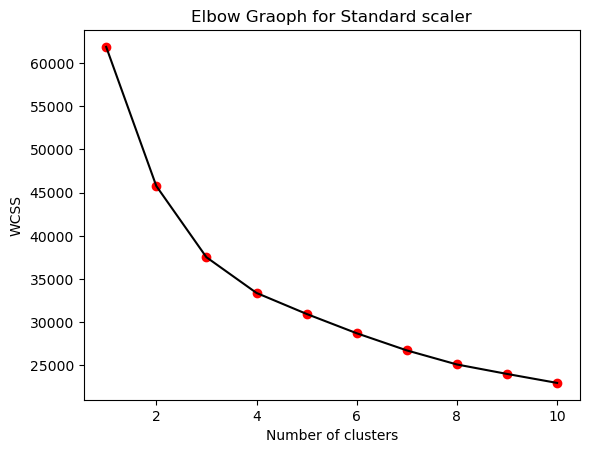

In [67]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_pca2)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1, 11), wcss,color='black')
plt.scatter(range(1,11),wcss,color='red')
plt.title('Elbow Graoph for Standard scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

We can see, 
There is no clear "elbow" visible. A choice of 3 or 4 clusters seems to be fair. Let's see the silhouette score

In [68]:
from sklearn.metrics import silhouette_score
n_clusters = [2,3,4,5,6,7,8,9,10] # number of clusters
clusters_inertia = [] # inertia of clusters
s_scores = [] # silhouette scores

for n in n_clusters:
    KM_est = KMeans(n_clusters=n, init='k-means++').fit(data_pca2)
    clusters_inertia.append(KM_est.inertia_)    # data for the elbow method
    silhouette_avg = silhouette_score(data_pca2, KM_est.labels_)
    s_scores.append(silhouette_avg) # data for the silhouette score me
    

TypeError: lineplot() takes from 0 to 1 positional arguments but 2 positional arguments (and 1 keyword-only argument) were given

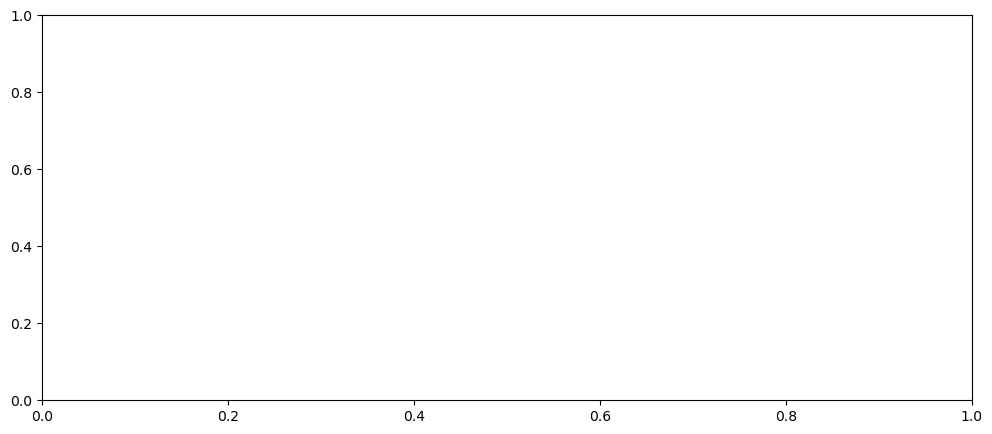

In [69]:
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.lineplot(n_clusters, s_scores, marker='o', ax=ax)
ax.set_title("Silhouette score method")
ax.set_xlabel("number of clusters")
ax.set_ylabel("Silhouette score")
ax.axvline(3, ls="--", c="red")
plt.grid()
plt.show()

##### Silhouette score method indicates the best options would be respectively 3 clusters.

In [ ]:

# With the elbow method, the ideal number of clusters to use was 6.
# We will also use the Silhouette score to determine an optimal number.

clust_list = [2,3,4,5,6,7,8,9]

#  Silhouette score for stadardScaler applied on data.

for n_clusters in clust_list:
    clusterer1 = KMeans(n_clusters=n_clusters, random_state=0)
    cluster_labels1 = clusterer1.fit_predict(data_pca2)
    sil_score1= silhouette_score(data_pca2, cluster_labels1)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", sil_score1)

In [ ]:
# assign the label
data2['cluster_id'] = kmeans.labels_
data2.head()

In [ ]:
# plot
plt.figure(figsize=(7,7))
plt.title("Boxplot of Birth Rate for 3 clusters got by Kmeans",fontdict={"size":16})
sns.boxplot(x='cluster_id',y="BirthRate", data=data2);

In [ ]:
# plot
plt.figure(figsize=(7,7))
plt.title("Boxplot of GDP for 3 clusters got by Kmeans",fontdict={"size":16})
sns.boxplot(x='cluster_id',y="GDP", data=data2);

In [ ]:
# plot
plt.figure(figsize=(7,7))
plt.title("Boxplot of CO2Emissions for 3 clusters got by Kmeans",fontdict={"size":16})
sns.boxplot(x='cluster_id',y="CO2Emissions", data=data2);

## Build K _means cluster using k=3 and standard scaler applied dataset

In [ ]:
## creating clusters

kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_pca2)

In [70]:
plt.scatter(data_pca2[y_kmeans == 0, 0], data_pca2[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca2[y_kmeans == 1, 0], data_pca2[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca2[y_kmeans == 2, 0], data_pca2[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of measurements')
plt.legend()
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 2678 but corresponding boolean dimension is 1038

In [71]:
## Accuracy Check
s2_kmeans = silhouette_score(data_pca2, y_kmeans)
print('Silhouette Score for K-means clustring :', s2_kmeans)

ValueError: Found input variables with inconsistent numbers of samples: [2678, 1038]

## <font color='purple'> Hierarchy Clustring

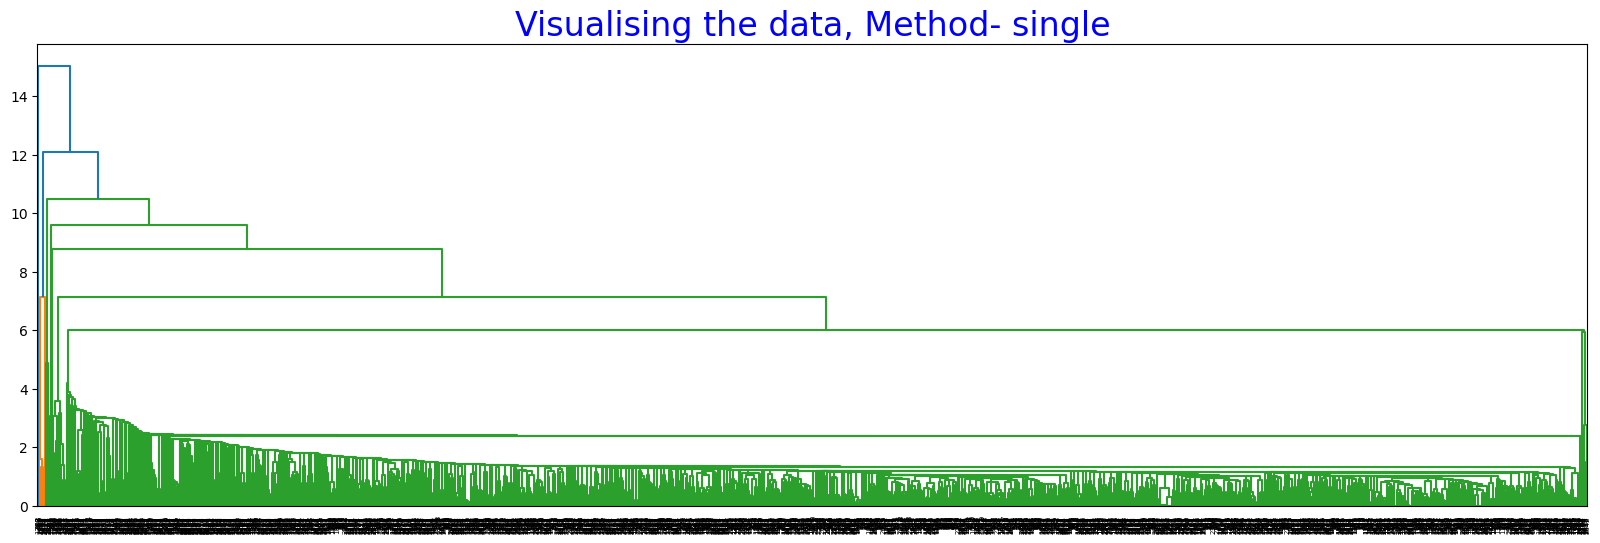

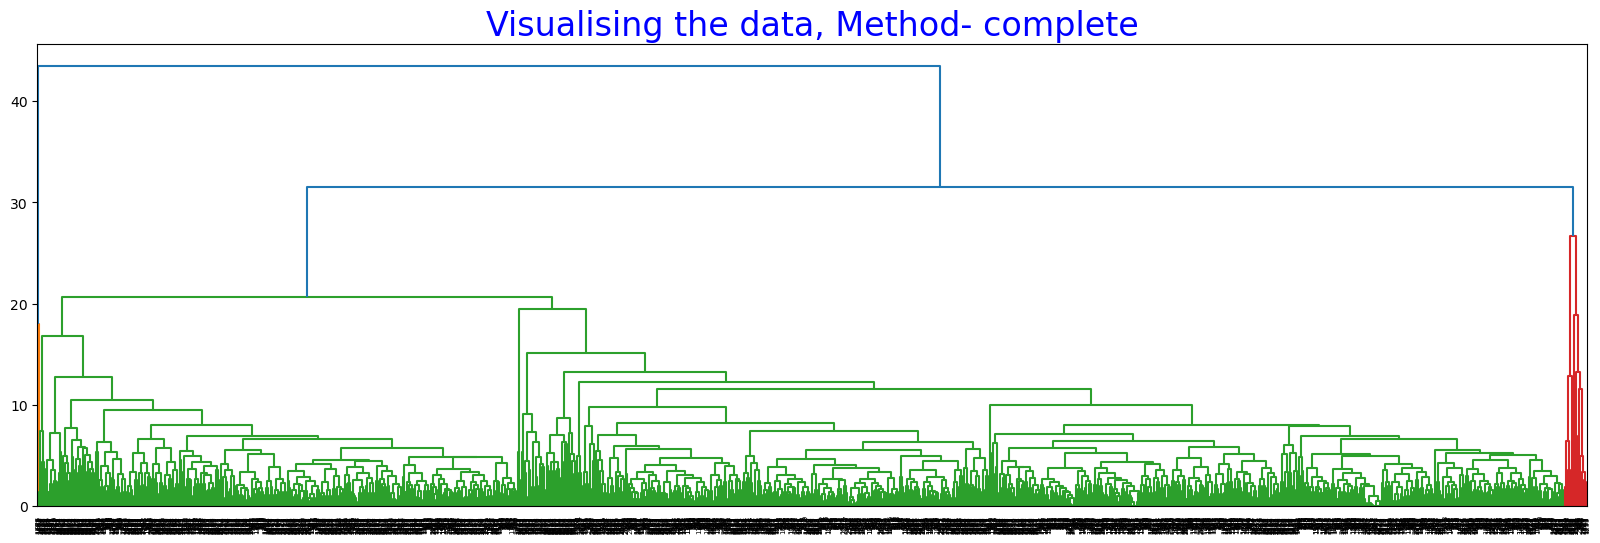

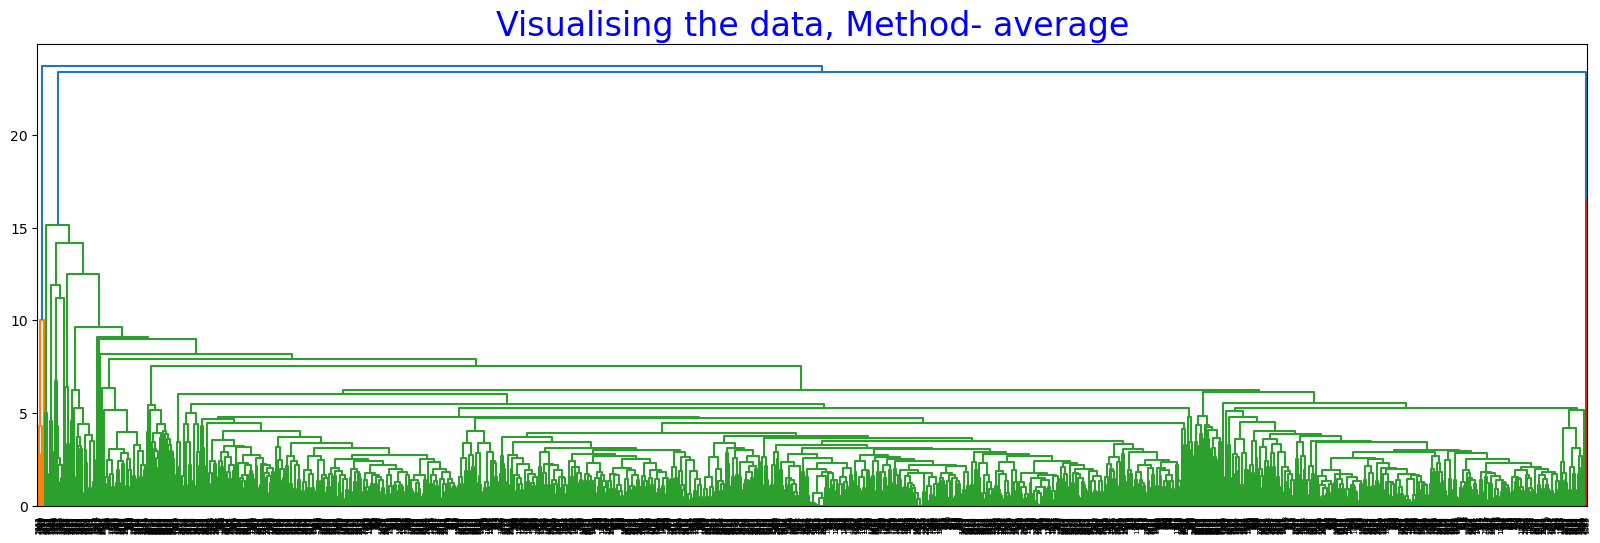

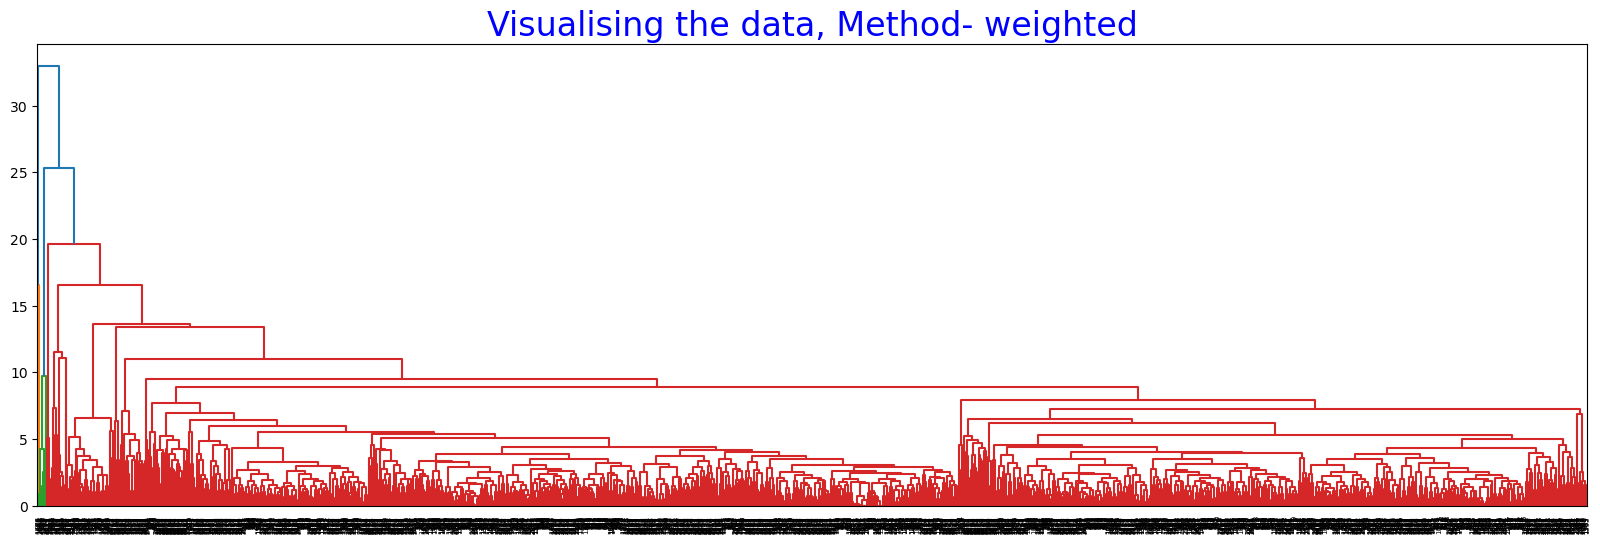

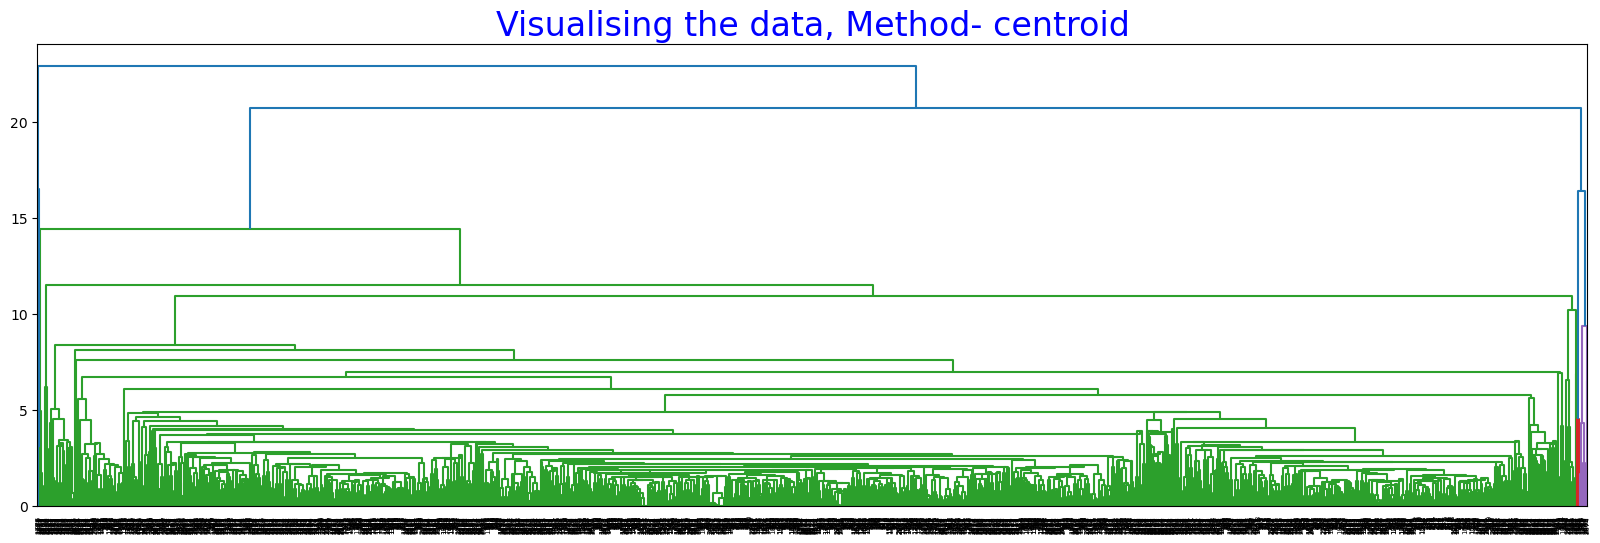

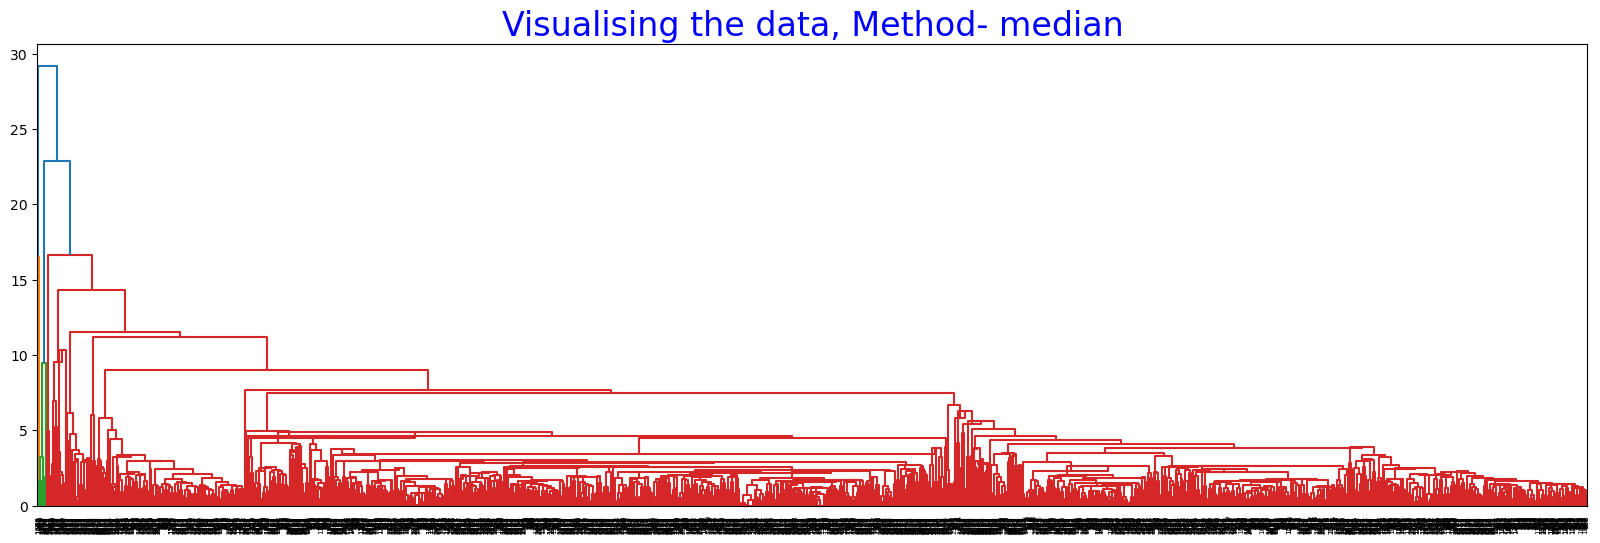

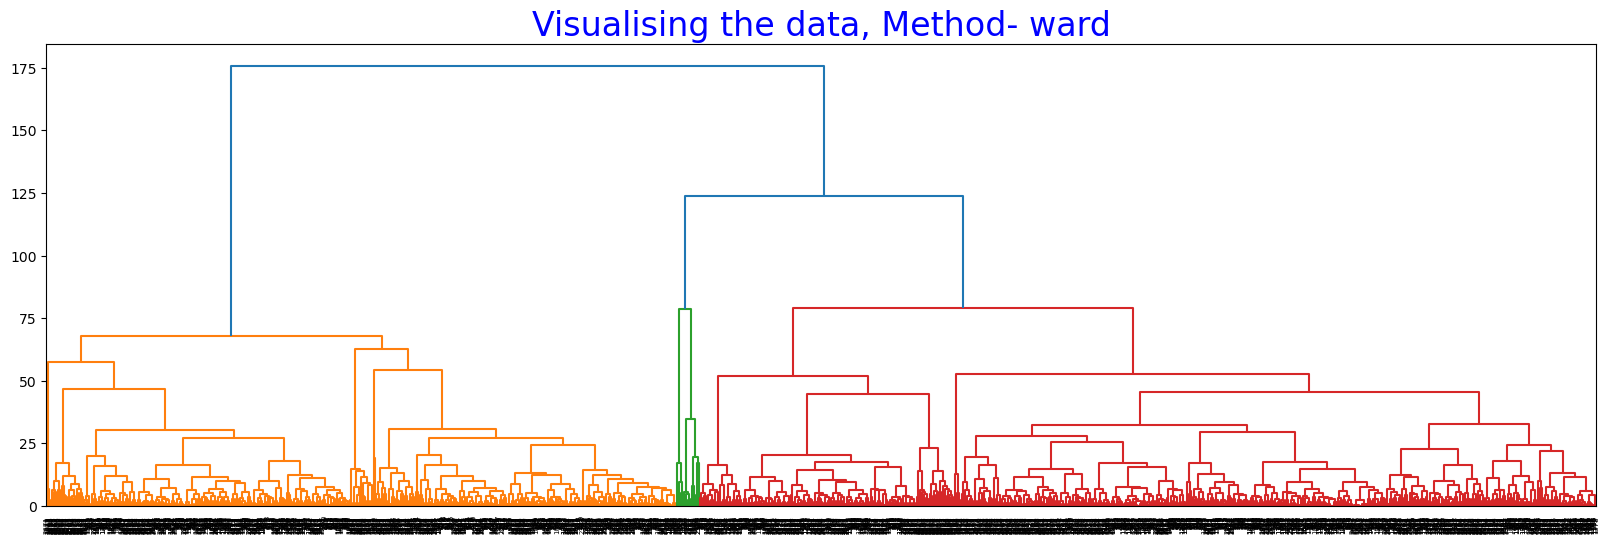

In [72]:
# Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.
# Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding. 
# Ward method is commanly used since it is simpler to visualize understanding.
# Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

for methods in ['single','complete','average','weighted','centroid','median','ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(data_pca2, method = methods,optimal_ordering=False))

In [74]:
n_clusters = [2,3,4,5,6,7,8,9,10]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(data_pca2)
        silhouette_score1 = silhouette_score(data_pca2, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.2769396841048957
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.7513007463708826
For n_clusters = 2 The average silhouette_score with linkage- average : 0.7569015506130324
For n_clusters = 2 The average silhouette_score with linkage- single : 0.8272463804803554

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.2950016372569842
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.6752724821044652
For n_clusters = 3 The average silhouette_score with linkage- average : 0.7484526722955676
For n_clusters = 3 The average silhouette_score with linkage- single : 0.7569192157010319

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.1962303694757604
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.6113777977869124
For n_clusters = 4 The average silhouette_score with linkage- average : 0.6841658379239565
For n

### Conclusion: Max score is with cluster numbers 3 in  standard scaler transformation 

In [75]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')
y_hc = hc.fit_predict(data_pca2)
print(y_hc.shape)
y_hc

(2678,)


array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [76]:
hc.n_clusters_

3

In [77]:
(silhouette_score(data_pca2,hc.labels_)*100).round(3)

74.845

In [78]:
data2['Hierarchical_labels'] = hc.labels_
data2.head()

BirthRate  BusinessTaxRate  CO2Emissions  DaystoStartBusiness  \
0      0.020        49.051656       87931.0                 26.0   
1      0.050        49.051656        9542.0                 26.0   
2      0.043        49.051656        1617.0                 26.0   
3      0.027        49.051656        4276.0                 26.0   
4      0.046        49.051656        1041.0                 26.0   

   EaseofBusiness  EnergyUsage           GDP  HealthExpGDP  HealthExpCapita  \
0       94.869565      26998.0  5.479006e+10         0.035             60.0   
1       94.869565       7499.0  9.129595e+09         0.034             22.0   
2       94.869565       1983.0  2.359122e+09         0.043             15.0   
3       94.869565       1836.0  5.788312e+09         0.047            152.0   
4       94.869565      14673.0  2.610959e+09         0.051             12.0   

   HourstodoTax  ...  MobilePhoneUsage  Population0to14  Population15to64  \
0    302.461048  ...               0.0            0.342             0.619   
1    302.461048  ...               0.0            0.476             0.499   
2    302.461048  ...               0.0            0.454             0.517   
3    302.461048  ...               0.1            0.383             0.587   
4    302.461048  ...               0.0            0.468             0.505   

   Populationmorethan65  PopulationTotal  PopulationUrban  TourismInbound  \
0                 0.039         31719449            0.599     102000000.0   
1                 0.025         13924930            0.324      34000000.0   
2                 0.029          6949366            0.383      77000000.0   
3                 0.029          1755375            0.532     227000000.0   
4                 0.028         11607944            0.178      23000000.0   

   TourismOutbound  Country_encoded  Hierarchical_labels  
0      193000000.0              2.0                    2  
1      146000000.0              5.0                    2  
2       50000000.0             20.0                    2  
3      209000000.0             25.0                    2  
4       30000000.0             29.0                    2  

[5 rows x 25 columns]

In [79]:
data2.groupby('Hierarchical_labels').agg(['mean'])

BirthRate BusinessTaxRate  CO2Emissions  \
                         mean            mean          mean   
Hierarchical_labels                                           
0                    0.032000       37.883885  1.034867e+04   
1                    0.013769       47.419868  4.788450e+06   
2                    0.022669       49.072211  9.197530e+04   

                    DaystoStartBusiness EaseofBusiness   EnergyUsage  \
                                   mean           mean          mean   
Hierarchical_labels                                                    
0                             97.000000      94.869565  9.556000e+03   
1                             10.230769      87.879599  2.250944e+06   
2                             34.988355      94.903701  4.576668e+04   

                              GDP HealthExpGDP HealthExpCapita HourstodoTax  \
                             mean         mean            mean         mean   
Hierarchical_labels                                                           
0                    5.668237e+09     0.064170      214.627847   244.820349   
1                    1.330715e+13     0.161154      214.627847   262.331172   
2                    1.833349e+11     0.063696      214.627847   302.721984   

                     ... LifeExpectancyMale MobilePhoneUsage Population0to14  \
                     ...               mean             mean            mean   
Hierarchical_labels  ...                                                       
0                    ...          44.666667         0.066667        0.415000   
1                    ...          75.153846         0.715385        0.204154   
2                    ...          66.530053         0.573892        0.303419   

                    Population15to64 Populationmorethan65 PopulationTotal  \
                                mean                 mean            mean   
Hierarchical_labels                                                         
0                           0.548333             0.037000    1.270931e+07   
1                           0.669385             0.126385    2.983420e+08   
2                           0.624685             0.071677    3.047371e+07   

                    PopulationUrban TourismInbound TourismOutbound  \
                               mean           mean            mean   
Hierarchical_labels                                                  
0                          0.341000   2.103333e+08    4.560000e+08   
1                          0.800923   1.408008e+11    1.024878e+11   
2                          0.562041   3.735041e+09    3.542464e+09   

                    Country_encoded  
                               mean  
Hierarchical_labels                  
0                        207.000000  
1                        198.000000  
2                        102.589782  

[3 rows x 24 columns]

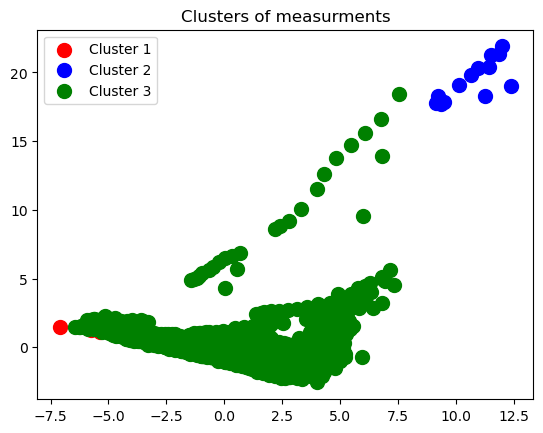

In [80]:
plt.scatter(data_pca2[y_hc == 0, 0], data_pca2[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca2[y_hc == 1, 0], data_pca2[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca2[y_hc == 2, 0], data_pca2[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of measurments')
plt.legend()
plt.show()

In [81]:
## Accuracy check
s2_hierarchy = silhouette_score(data_pca2,y_hc)
print('Silhouette Score for Hierarchy clustring :',s2_hierarchy)

Silhouette Score for Hierarchy clustring : 0.7484526722955676


In [82]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(data2.loc[data2.Hierarchical_labels==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(data2.loc[data2.Hierarchical_labels==1].mean(),columns= ['Cluster2_avg'])
cluster3 = pd.DataFrame(data2.loc[data2.Hierarchical_labels==2].mean(),columns= ['Cluster3_avg'])

In [83]:
avg_data = pd.concat([cluster1,cluster2,cluster3],axis=1)
avg_data

Cluster1_avg  Cluster2_avg  Cluster3_avg
BirthRate             3.200000e-02  1.376923e-02  2.266905e-02
BusinessTaxRate       3.788389e+01  4.741987e+01  4.907221e+01
CO2Emissions          1.034867e+04  4.788450e+06  9.197530e+04
DaystoStartBusiness   9.700000e+01  1.023077e+01  3.498835e+01
EaseofBusiness        9.486957e+01  8.787960e+01  9.490370e+01
EnergyUsage           9.556000e+03  2.250944e+06  4.576668e+04
GDP                   5.668237e+09  1.330715e+13  1.833349e+11
HealthExpGDP          6.416952e-02  1.611538e-01  6.369589e-02
HealthExpCapita       2.146278e+02  2.146278e+02  2.146278e+02
HourstodoTax          2.448203e+02  2.623312e+02  3.027220e+02
InfantMortalityRate   5.733333e-02  6.692308e-03  3.178663e-02
InternetUsage         1.000000e-01  6.538462e-01  2.301653e-01
LendingInterest       3.370333e+00  5.369231e-02  1.361352e-01
LifeExpectancyFemale  4.333333e+01  8.023077e+01  7.129226e+01
LifeExpectancyMale    4.466667e+01  7.515385e+01  6.653005e+01
MobilePhoneUsage      6.666667e-02  7.153846e-01  5.738918e-01
Population0to14       4.150000e-01  2.041538e-01  3.034193e-01
Population15to64      5.483333e-01  6.693846e-01  6.246852e-01
Populationmorethan65  3.700000e-02  1.263846e-01  7.167731e-02
PopulationTotal       1.270931e+07  2.983420e+08  3.047371e+07
PopulationUrban       3.410000e-01  8.009231e-01  5.620406e-01
TourismInbound        2.103333e+08  1.408008e+11  3.735041e+09
TourismOutbound       4.560000e+08  1.024878e+11  3.542464e+09
Country_encoded       2.070000e+02  1.980000e+02  1.025898e+02
Hierarchical_labels   0.000000e+00  1.000000e+00  2.000000e+00

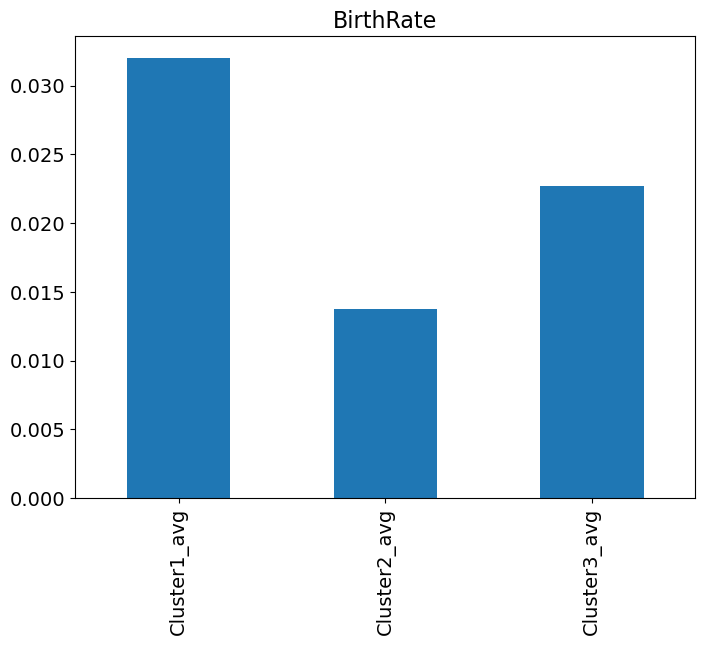

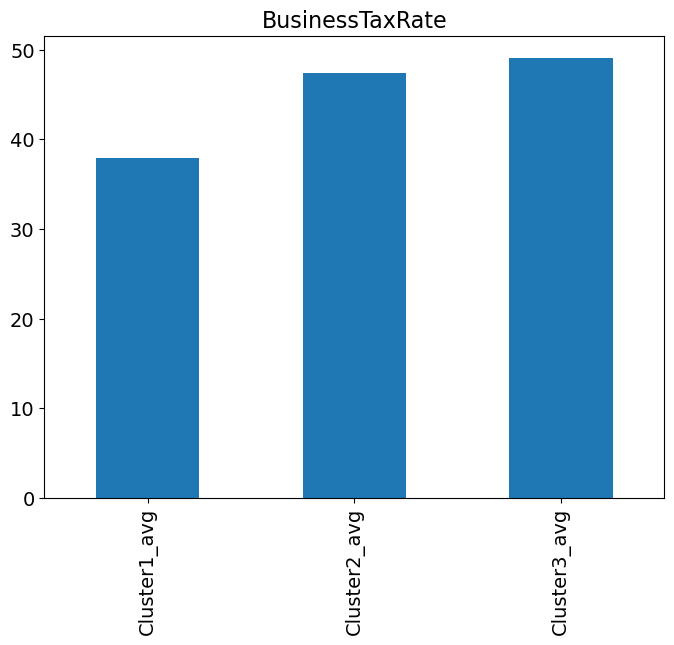

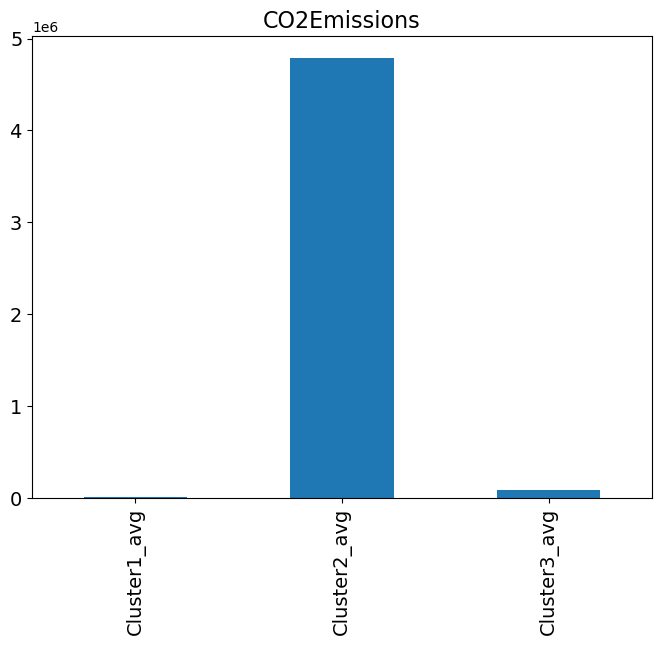

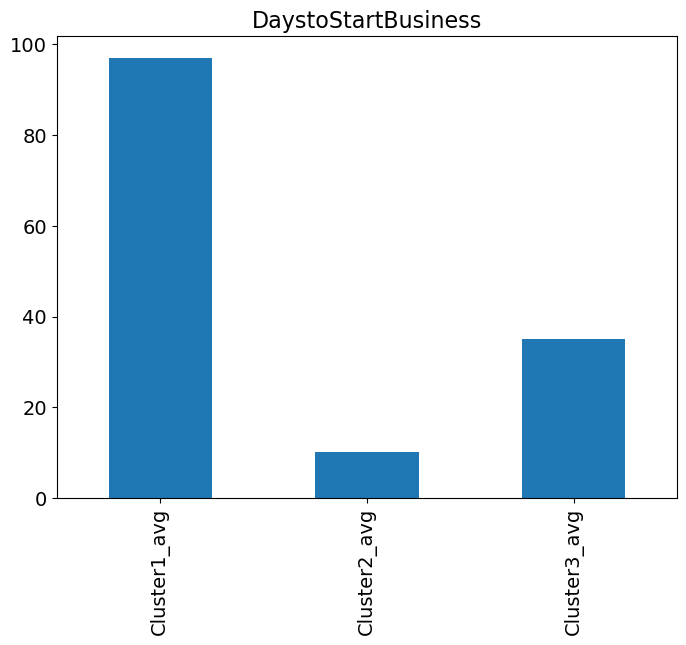

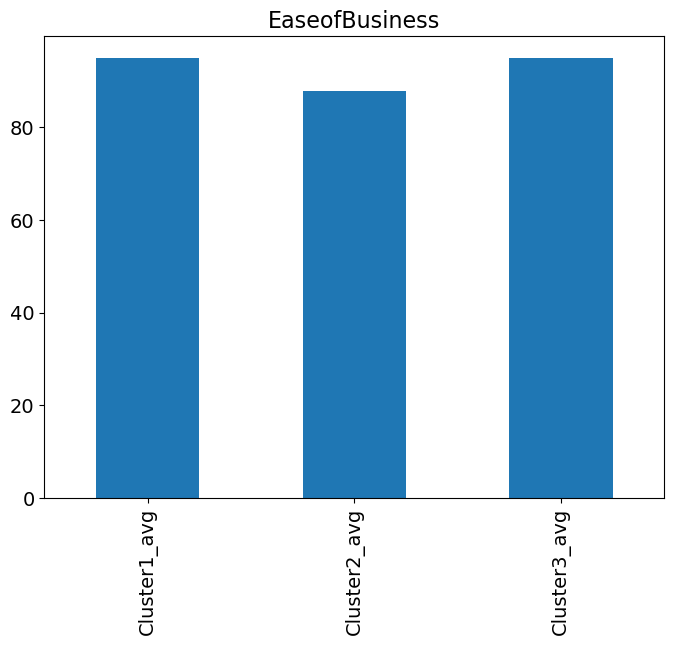

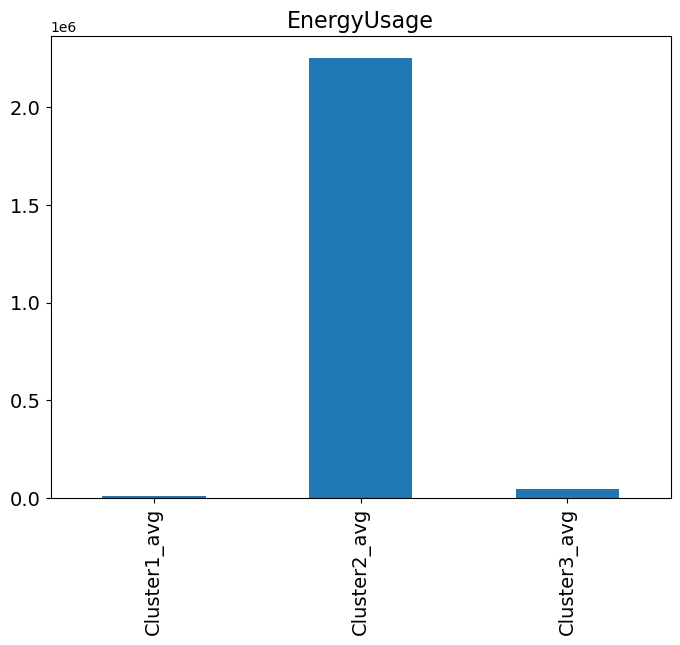

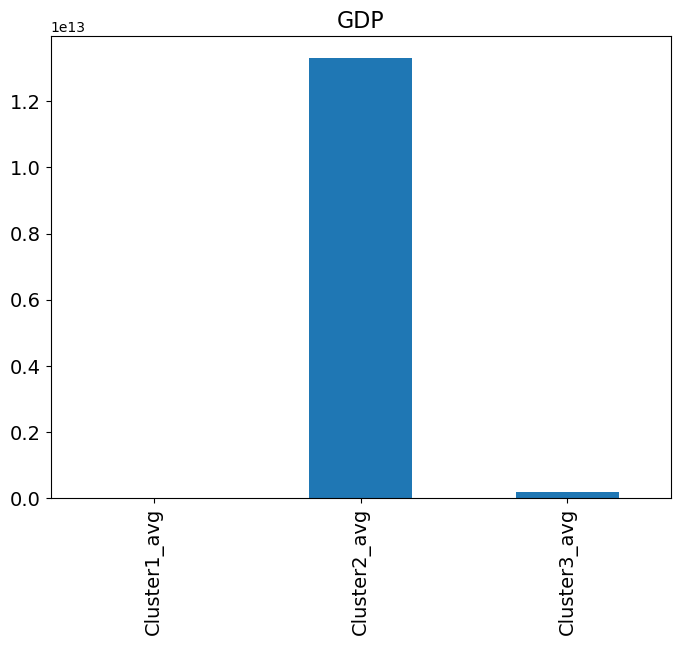

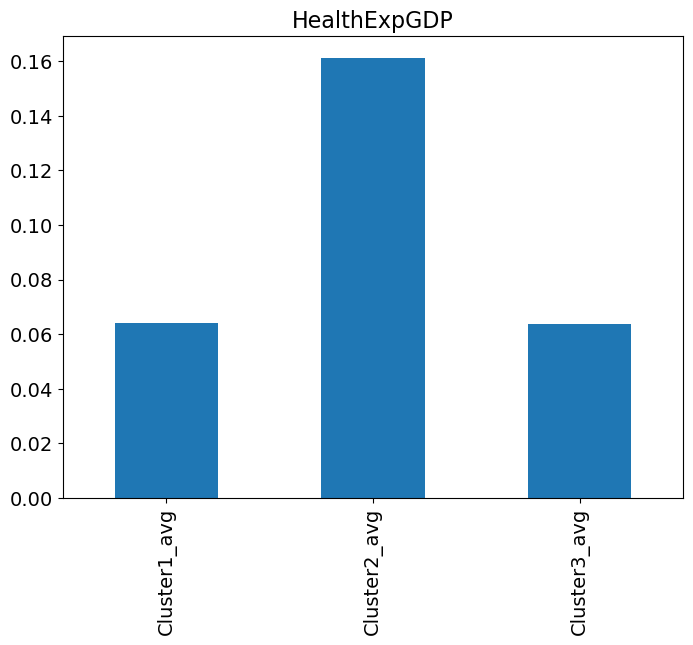

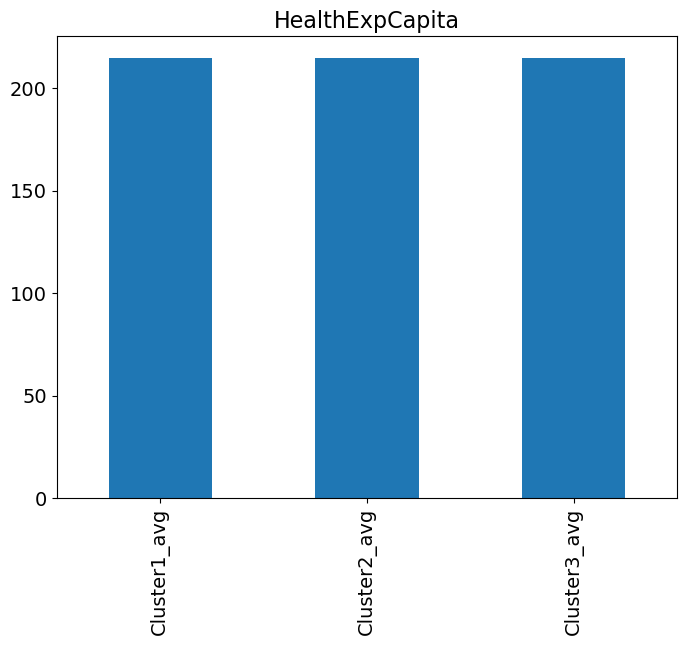

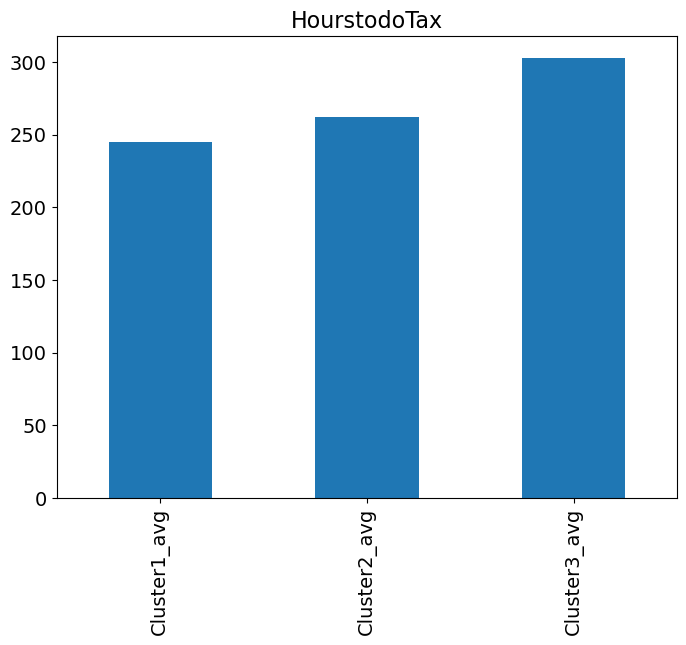

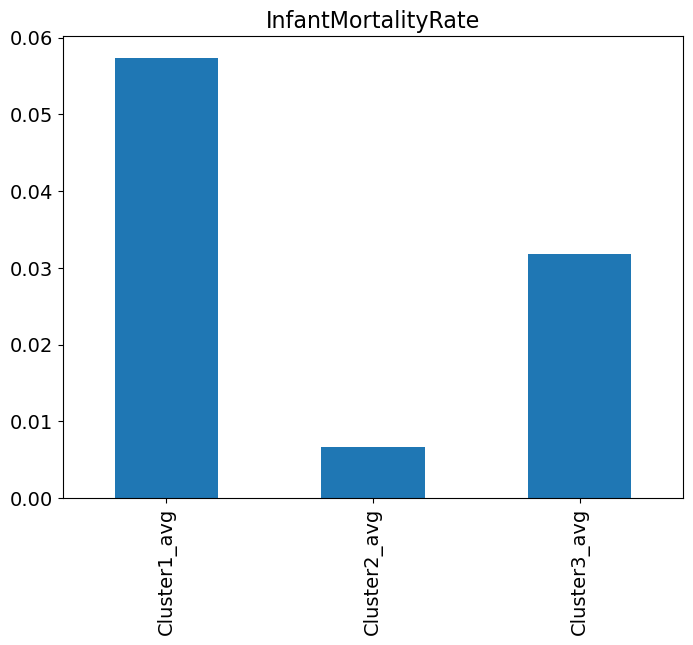

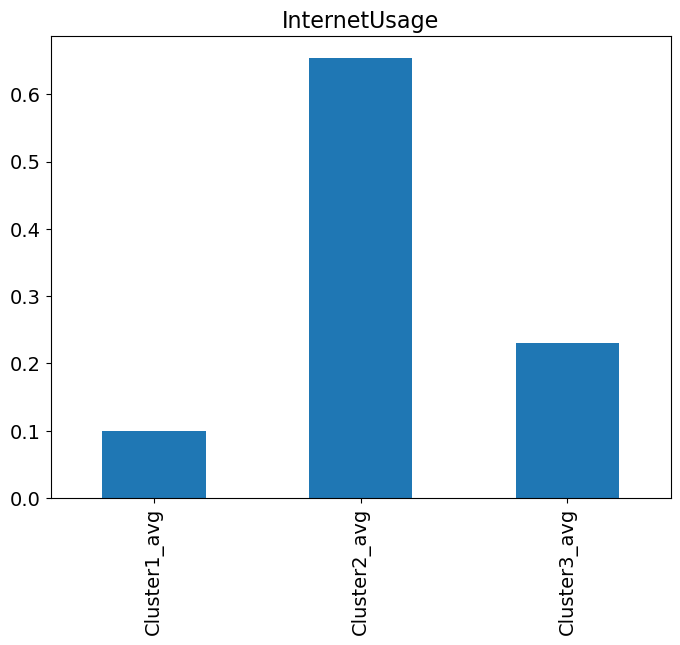

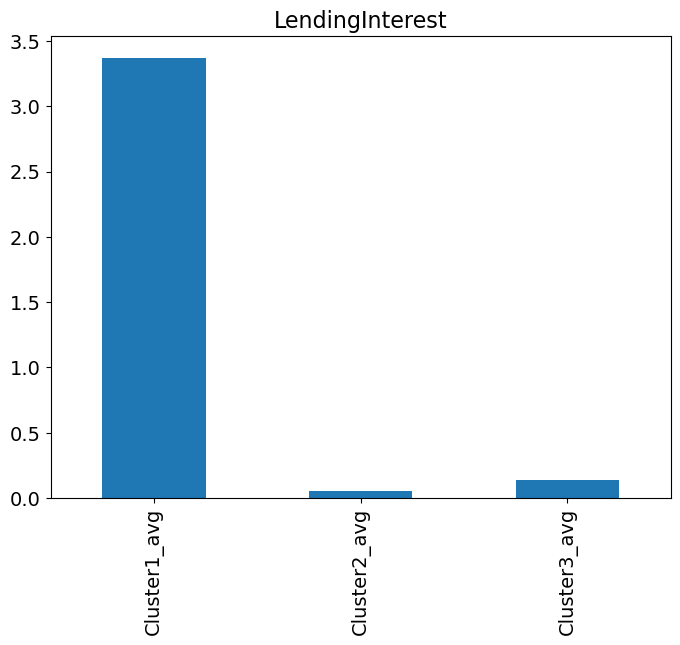

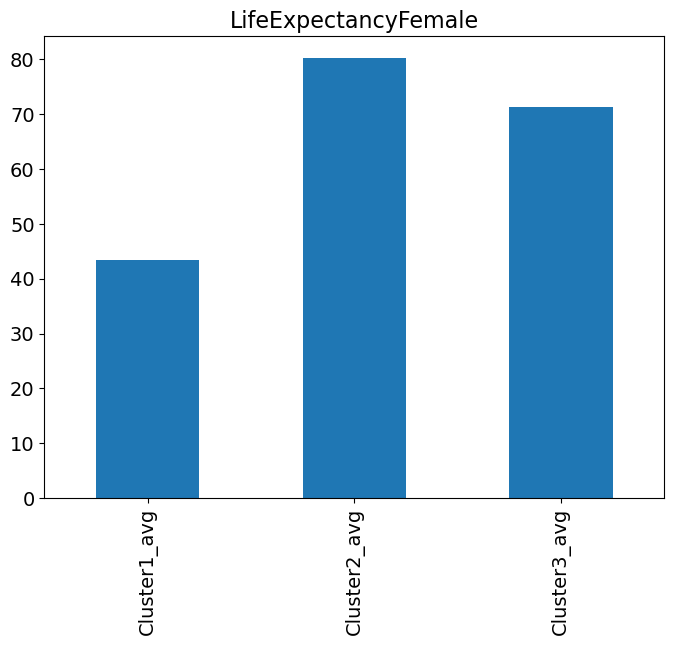

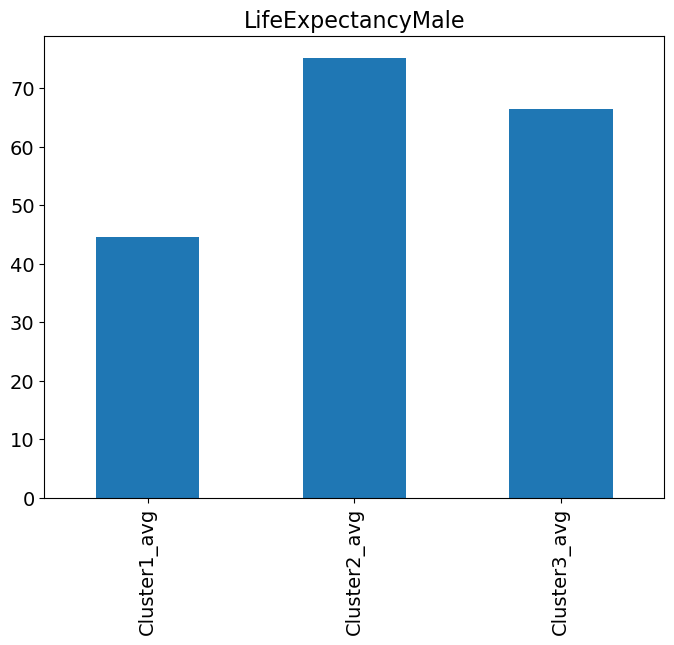

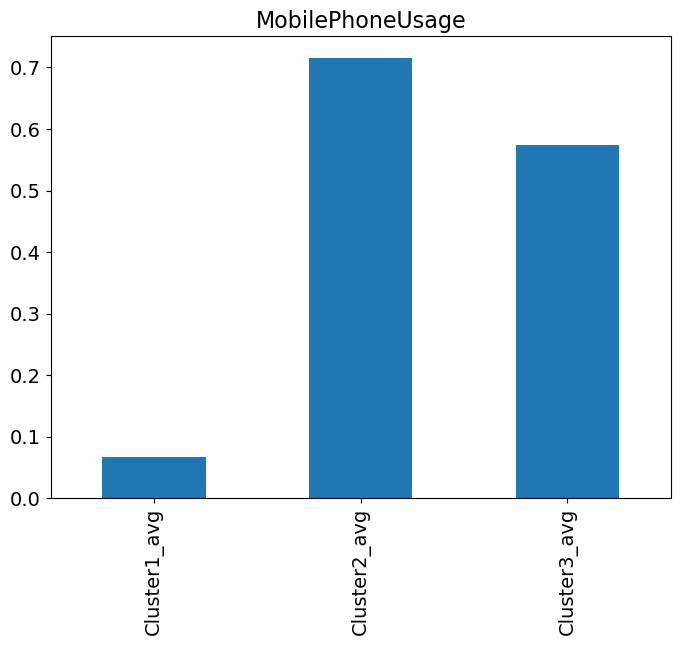

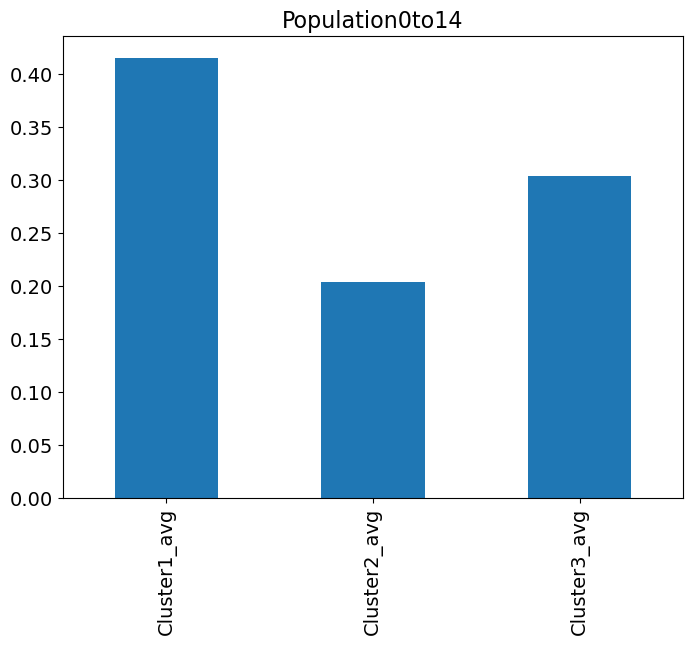

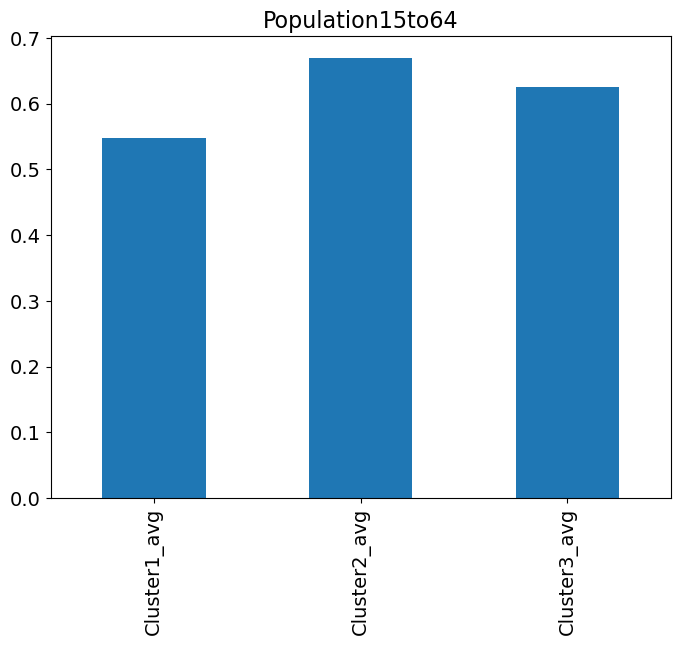

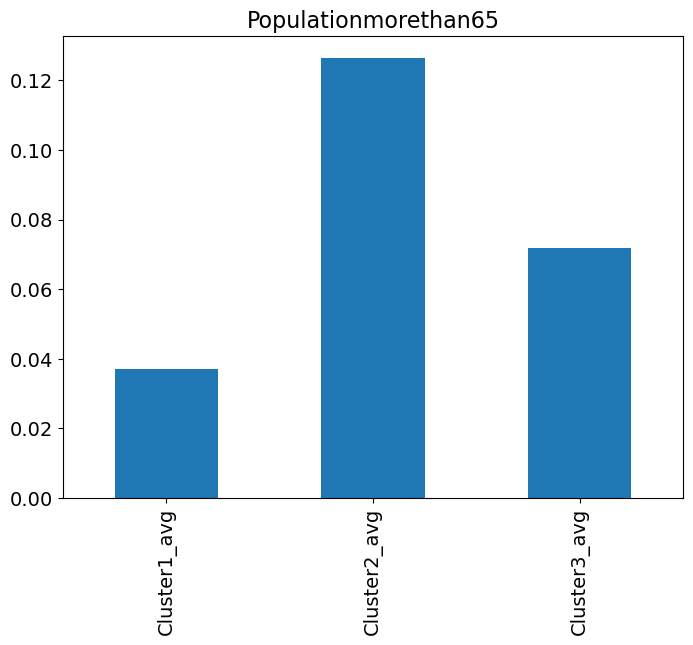

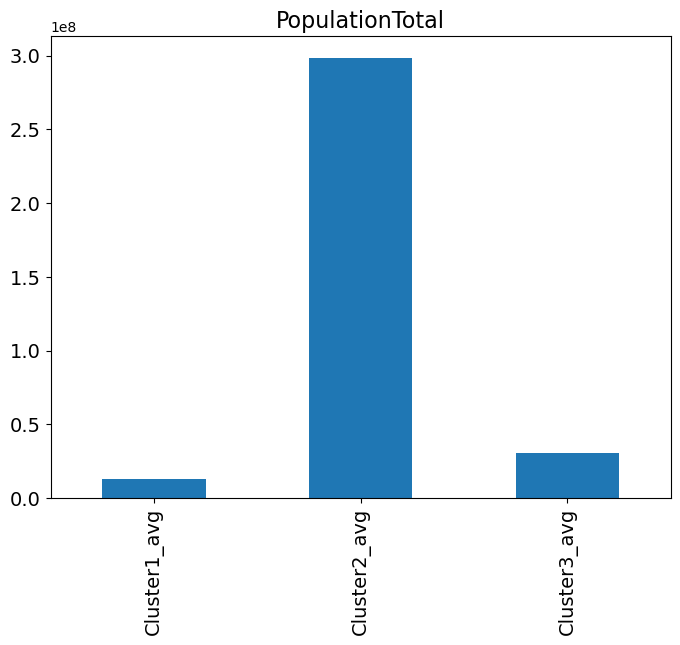

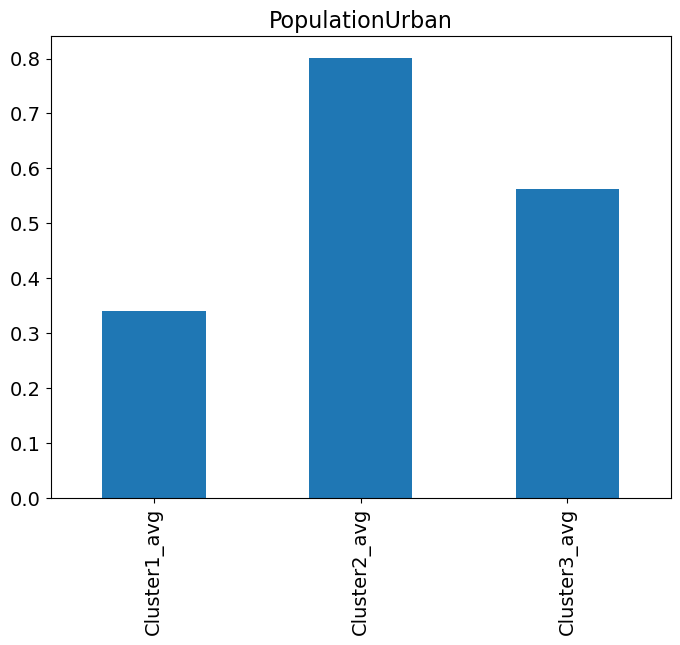

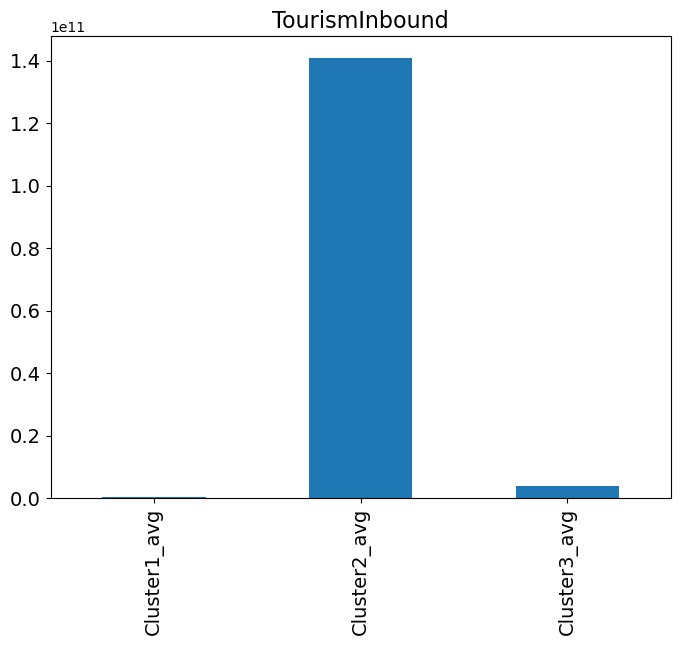

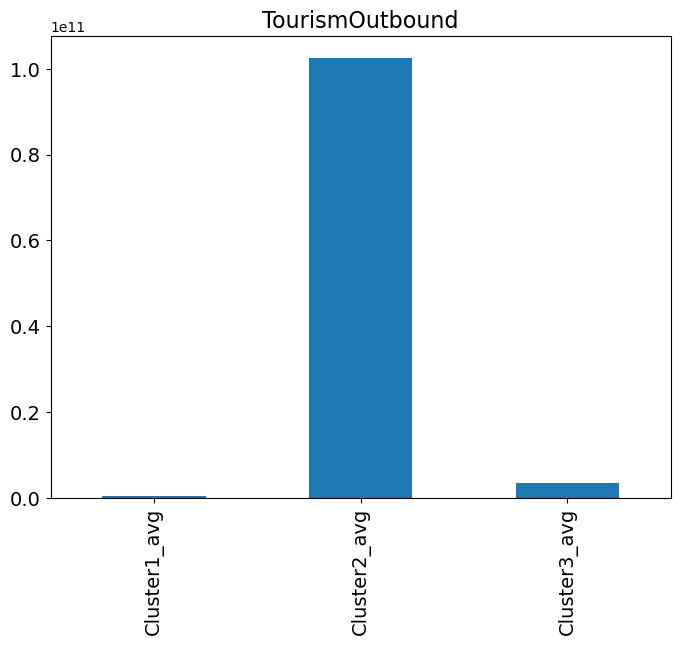

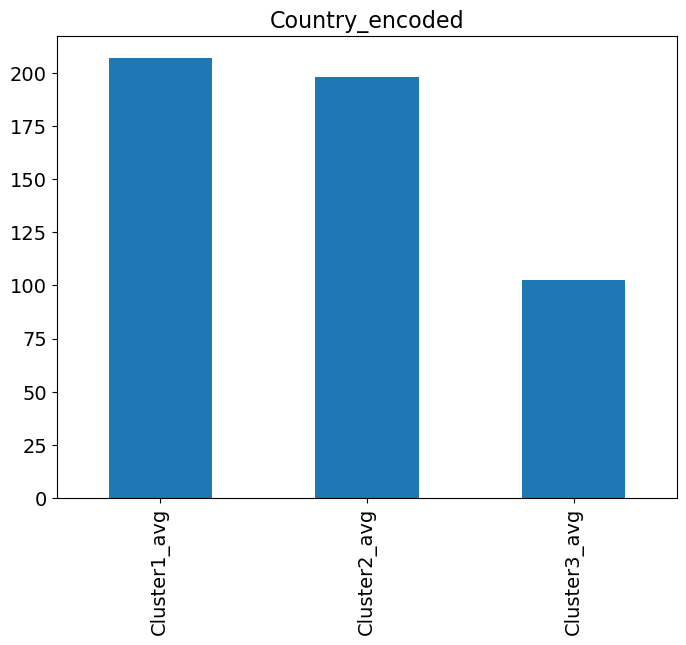

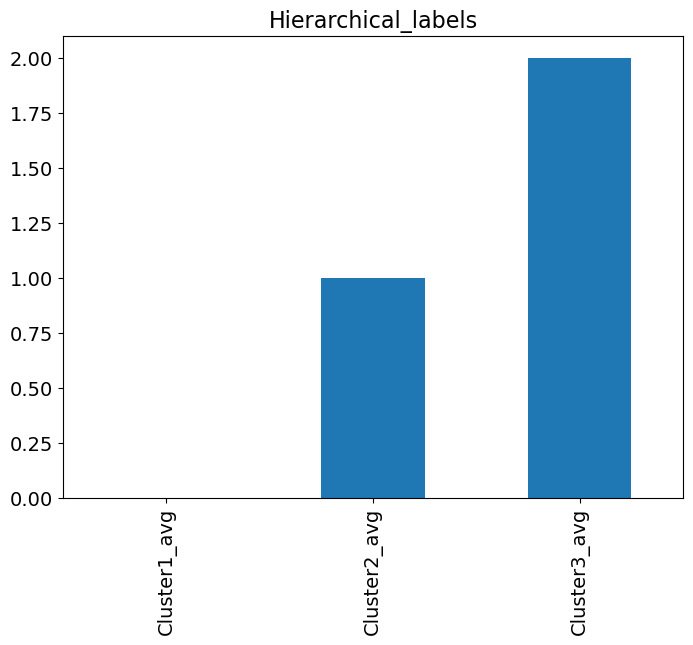

In [84]:
# Extract and plot one Column data .xs method
for i , row in avg_data.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_data.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()

# <font color='purple'> DBSCAN

In [85]:
dbscan = DBSCAN(eps=0.5,min_samples=5)
dbscan_labels = dbscan.fit_predict(data_pca2)

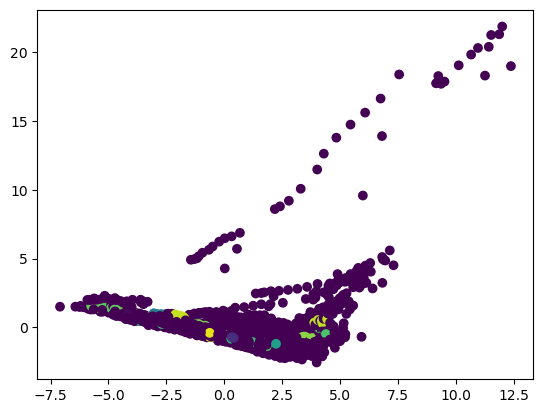

In [86]:
plt.scatter(data_pca2[:,0],data_pca2[:,1],c=dbscan_labels)
plt.show()

In [87]:
data2['cluster']=dbscan.labels_

In [88]:
data2[data2['cluster']==-1]

BirthRate  BusinessTaxRate  CO2Emissions  DaystoStartBusiness  \
1         0.050        49.051656        9542.0                 26.0   
3         0.027        49.051656        4276.0                 26.0   
5         0.042        49.051656         301.0                 26.0   
8         0.051        49.051656         176.0                 26.0   
9         0.039        49.051656          84.0                 26.0   
...         ...              ...           ...                  ...   
2697      0.018        27.900000        8529.0                694.0   
2698      0.015        29.100000        8529.0                 41.0   
2700      0.013        46.400000        8529.0                  5.0   
2701      0.015        41.900000        8529.0                  7.0   
2702      0.020        61.900000        8529.0                144.0   

      EaseofBusiness  EnergyUsage           GDP  HealthExpGDP  \
1          94.869565       7499.0  9.129595e+09         0.034   
3          94.869565       1836.0  5.788312e+09         0.047   
5          94.869565      14673.0  8.704861e+08         0.063   
8          94.869565      14673.0  1.385058e+09         0.063   
9          94.869565      14673.0  2.018999e+08         0.035   
...              ...          ...           ...           ...   
2697      165.000000      14673.0  5.012121e+09         0.059   
2698       63.000000      14673.0  2.343634e+10         0.054   
2700        4.000000    2132446.0  1.624460e+13         0.179   
2701       85.000000      14673.0  5.000435e+10         0.089   
2702      180.000000      14673.0  3.812862e+11         0.046   

      HealthExpCapita  HourstodoTax  ...  Population0to14  Population15to64  \
1           22.000000    302.461048  ...            0.476             0.499   
3          152.000000    302.461048  ...            0.383             0.587   
5            7.000000    302.461048  ...            0.490             0.481   
8           10.000000    302.461048  ...            0.490             0.482   
9           13.000000    302.461048  ...            0.415             0.554   
...               ...           ...  ...              ...               ...   
2697       521.000000    199.000000  ...            0.278             0.656   
2698       972.000000    210.000000  ...            0.207             0.705   
2700       214.627847    175.000000  ...            0.196             0.667   
2701       214.627847    310.000000  ...            0.220             0.639   
2702       593.000000    792.000000  ...            0.288             0.652   

      Populationmorethan65  PopulationTotal  PopulationUrban  TourismInbound  \
1                    0.025         13924930            0.324    3.400000e+07   
3                    0.029          1755375            0.532    2.270000e+08   
5                    0.029          6674286            0.082    1.400000e+06   
8                    0.028          8301151            0.216    1.400000e+07   
9                    0.031           528312            0.281    1.500000e+07   
...                    ...              ...              ...             ...   
2697                 0.066           534541            0.662    7.900000e+07   
2698                 0.088          1337439            0.088    6.885000e+08   
2700                 0.136        313873685            0.811    2.000920e+11   
2701                 0.140          3395253            0.948    2.222000e+09   
2702                 0.060         29954782            0.889    9.040000e+08   

      TourismOutbound  Country_encoded  Hierarchical_labels  cluster  
1        1.460000e+08              5.0                    2       -1  
3        2.090000e+08             25.0                    2       -1  
5        1.400000e+07             30.0                    2       -1  
8        5.600000e+07             36.0                    2       -1  
9        4.560000e+08             40.0                    2       -1  
...               ...              .

In [89]:
s2_dbscan = silhouette_score(data_pca2, dbscan_labels)
print("Silhouette Score for DBSCAN is:", s2_dbscan)

Silhouette Score for DBSCAN is: -0.3341163668424678


# <font color='green'>Method 3

## T-SNE

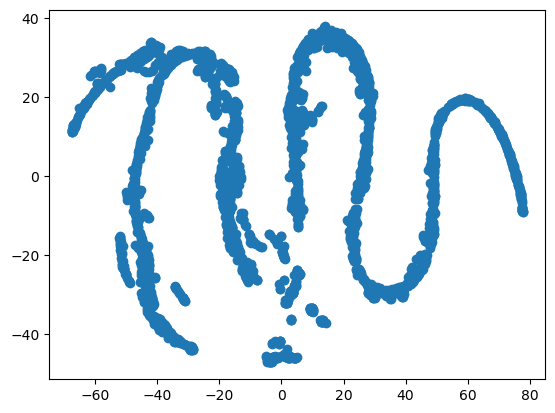

In [91]:
from sklearn.manifold import TSNE

# Initialize t-SNE with default parameters
tsne = TSNE()

# Fit and transform the data to 2 dimensions
data_tsne = tsne.fit_transform(data3)

# Plot the results
plt.scatter(data_tsne[:, 0], data_tsne[:, 1])
plt.show()

## <font color='purple'> K-means Clustring

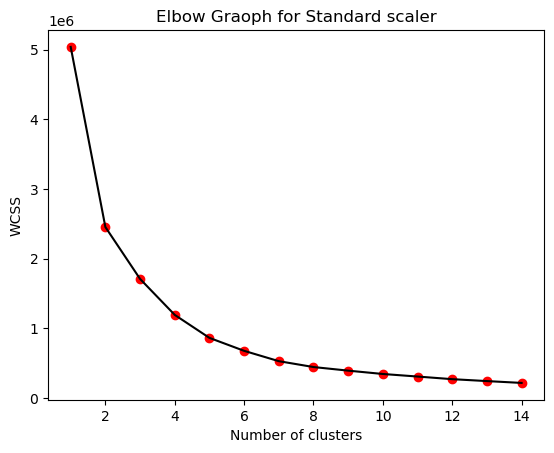

In [92]:
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(data_tsne)
    wcss.append(kmeans.inertia_)
    
# Plot K values range vs WCSS to get Elbow graph for choosing K (no. of clusters)
plt.plot(range(1, 15), wcss,color='black')
plt.scatter(range(1,15),wcss,color='red')
plt.title('Elbow Graoph for Standard scaler')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [93]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7,8,9,10]
silhouette_avg_list=[]
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(data_tsne)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(data_tsne, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    silhouette_avg_list.append(silhouette_avg)

For n_clusters=2, the silhouette score is 0.4330296218395233
For n_clusters=3, the silhouette score is 0.41163238883018494
For n_clusters=4, the silhouette score is 0.41715964674949646
For n_clusters=5, the silhouette score is 0.4415437877178192
For n_clusters=6, the silhouette score is 0.46925926208496094
For n_clusters=7, the silhouette score is 0.4697500467300415
For n_clusters=8, the silhouette score is 0.46817252039909363
For n_clusters=9, the silhouette score is 0.4705826938152313
For n_clusters=10, the silhouette score is 0.4743260443210602


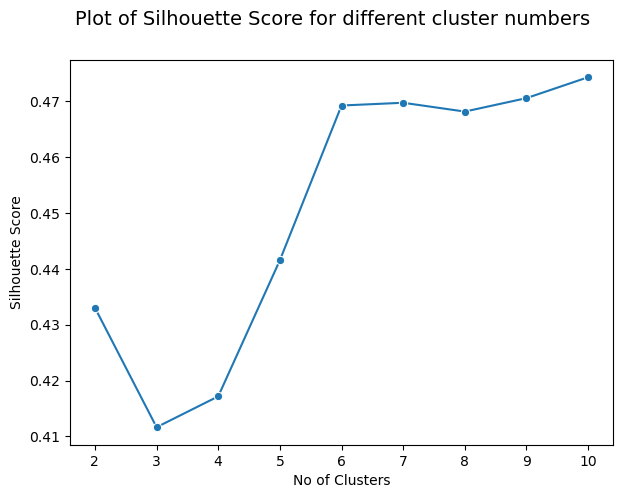

In [94]:
# plt.plot(ssd)
plt.figure(figsize=(7,5))
ax= sns.lineplot(y=silhouette_avg_list,x= range_n_clusters,marker='o')
ax.set(xlabel='No of Clusters', ylabel='Silhouette Score');
plt.suptitle("Plot of Silhouette Score for different cluster numbers",fontsize=14);

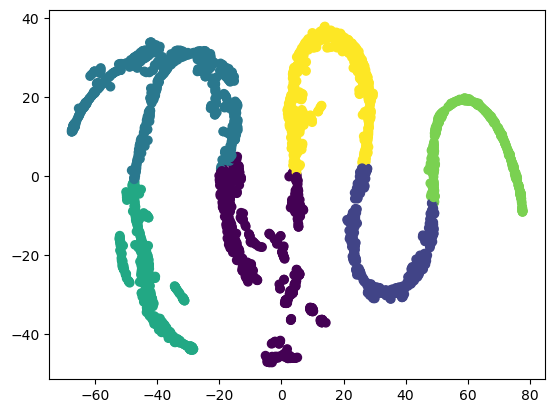

In [95]:
# Perform clustering with KMeans
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_tsne)

# Plot the clusters
plt.scatter(data_tsne[:, 0], data_tsne[:, 1],c = y_kmeans, label = 'Cluster 3')
plt.show()

In [96]:
kmeans.n_clusters

6

In [97]:
# cluster centres associated with each lables

kmeans.cluster_centers_

array([[ -4.8758082, -20.307302 ],
       [ 33.818005 , -18.189718 ],
       [-37.438076 ,  20.442038 ],
       [-42.412296 , -25.09305  ],
       [ 61.786167 ,   7.301292 ],
       [ 14.91279  ,  21.330843 ]], dtype=float32)

In [98]:
# within-cluster sum of squared

# The lower values of inertia are better and zero is optimal.
# Inertia is the sum of squared error for each cluster. 
# Therefore the smaller the inertia the denser the cluster(closer together all the points are)

kmeans.inertia_

679683.125

In [99]:
#Assign clusters to the data set
data3['Kmeans_label'] = kmeans.labels_

In [100]:
# Group data by Clusters (K=6)
data3.groupby('Kmeans_label').agg(['mean'])

BirthRate BusinessTaxRate   CO2Emissions DaystoStartBusiness  \
                  mean            mean           mean                mean   
Kmeans_label                                                                
0             0.024076       47.408517   12464.342857           35.320000   
1             0.016882       43.472573  113568.134454           25.921569   
2             0.027319       50.035499    4682.681021           44.231260   
3             0.028626       57.664670    1425.005495           38.824176   
4             0.013824       48.851376  739371.722222           27.608025   
5             0.020634       47.320398   35385.355509           31.093555   

             EaseofBusiness    EnergyUsage           GDP HealthExpGDP  \
                       mean           mean          mean         mean   
Kmeans_label                                                            
0                 96.182277   11763.697143  1.391965e+10     0.059438   
1                 92.910973   49441.770308  1.741255e+11     0.061768   
2                 96.635601    9752.285486  4.422273e+09     0.063111   
3                 95.234472   10073.535714  7.907515e+08     0.065069   
4                 90.676463  335961.274691  1.754857e+12     0.082336   
5                 95.136672   18008.935551  4.146040e+10     0.059579   

             HealthExpCapita HourstodoTax  ... LifeExpectancyMale  \
                        mean         mean  ...               mean   
Kmeans_label                               ...                      
0                 201.886312   316.107105  ...          65.320000   
1                 256.819855   322.636112  ...          71.476190   
2                 140.470704   294.512651  ...          62.151515   
3                 171.928571   244.380998  ...          62.260989   
4                 296.742068   324.822754  ...          74.040123   
5                 270.887339   311.843403  ...          68.155925   

             MobilePhoneUsage Population0to14 Population15to64  \
                         mean            mean             mean   
Kmeans_label                                                     
0                    0.517333        0.322316         0.614937   
1                    0.840056        0.238230         0.669106   
2                    0.380064        0.352697         0.595726   
3                    0.354121        0.369679         0.584819   
4                    0.886728        0.205025         0.670306   
5                    0.646985        0.281091         0.640277   

             Populationmorethan65 PopulationTotal PopulationUrban  \
                             mean            mean            mean   
Kmeans_label                                                        
0                        0.062331    9.648969e+06        0.581661   
1                        0.092641    3.437922e+07        0.703527   
2                        0.051172    5.987373e+06        0.458464   
3                        0.045190    1.378311e+06        0.373250   
4                        0.124667    1.654601e+08        0.744185   
5                        0.078661    2.044415e+07        0.595884   

             TourismInbound TourismOutbound Country_encoded  
                       mean            mean            mean  
Kmeans_label                                                 
0              7.409419e+08    3.837867e+08       97.382857  
1              5.964938e+09    4.546039e+09      110.492997  
2              4.650778e+08    2.501825e+08       96.033493  
3              8.182995e+07    6.961951e+07      109.467033  
4              2.449512e+10    2.558044e+10      105.734568  
5              2.073668e+09    9.751705e+08      106.860707  

[6 rows x 24 columns]

In [101]:
data3[data3['Kmeans_label']==0]

BirthRate  BusinessTaxRate  CO2Emissions  DaystoStartBusiness  \
6         0.041        49.051656        3432.0                 26.0   
12        0.038        49.051656        6791.0                 26.0   
23        0.039        49.051656       10418.0                 26.0   
42        0.049        49.051656         517.0                 26.0   
44        0.043        49.051656        8529.0                 26.0   
...         ...              ...           ...                  ...   
2685      0.015        44.300000        8529.0                  7.0   
2687      0.023        64.900000        8529.0                 39.0   
2692      0.020        49.051656        8529.0                 26.0   
2699      0.020        49.051656        8529.0                 26.0   
2703      0.011        49.051656        8529.0                 26.0   

      EaseofBusiness  EnergyUsage           GDP  HealthExpGDP  \
6          94.869565       6310.0  9.287368e+09       0.04400   
12         94.869565       6734.0  1.041706e+10       0.06500   
23         94.869565      14055.0  1.270535e+10       0.04700   
42         94.869565      14673.0  1.549332e+10       0.06417   
44         94.869565      14673.0  1.549332e+10       0.06417   
...              ...          ...           ...           ...   
2685       91.000000      14673.0  1.479480e+10       0.05900   
2687      123.000000      14673.0  1.064497e+10       0.08200   
2692       94.869565      14673.0  1.549332e+10       0.06417   
2699       94.869565      14673.0  1.549332e+10       0.06417   
2703       94.869565      14673.0  1.549332e+10       0.06417   

      HealthExpCapita  HourstodoTax  ...  MobilePhoneUsage  Population0to14  \
6           26.000000    302.461048  ...               0.0         0.453000   
12          42.000000    302.461048  ...               0.0         0.421000   
23          19.000000    302.461048  ...               0.0         0.442000   
42         214.627847    302.461048  ...               0.0         0.472000   
44         214.627847    302.461048  ...               0.5         0.447000   
...               ...           ...  ...               ...              ...   
2685       318.000000    368.000000  ...               1.0         0.278000   
2687       144.000000    207.000000  ...               1.0         0.334000   
2692       214.627847    302.461048  ...               0.5         0.303062   
2699       214.627847    302.461048  ...               0.5         0.303062   
2703       214.627847    302.461048  ...               0.5         0.206000   

      Population15to64  Populationmorethan65  PopulationTotal  \
6                0.513                 0.034         15927713   
12               0.550                 0.029         16131332   
23               0.531                 0.028         31285050   
42               0.499                 0.029          7385416   
44               0.523                 0.030          6652984   
...                ...                   ...              ...   
2685             0.643                 0.079          2707805   
2687             0.620                 0.046          5991733   
2692             0.642                 0.052            39088   
2699             0.642                 0.052            32427   
2703             0.641                 0.152           105275   

      PopulationUrban  TourismInbound  TourismOutbound  Country_encoded  \
6               0.455    1.320000e+08      241000000.0             32.0   
12              0.435    5.300000e+07      291000000.0             44.0   
23              0.199    5.000000e+08      156000000.0             96.0   
42              0.332    6.885000e+08      456000000.0            168.0   
44              0.165    6.885000e+08      456000000.0            170.0   
...               ...             ...              ...              ...   
2685            0.541    2.070000e+09      165000000.0             92.0   
2687            0.578    4.220000e+08     

In [102]:
data3[data3['Kmeans_label']==1]

BirthRate  BusinessTaxRate  CO2Emissions  DaystoStartBusiness  \
14        0.025        49.051656      141326.0                 26.0   
43        0.024        49.051656      368611.0                 26.0   
62        0.008        49.051656       40465.0                 26.0   
64        0.022        49.051656      263419.0                 26.0   
72        0.023        49.051656      126603.0                 26.0   
...         ...              ...           ...                  ...   
2639      0.011        11.300000        8529.0                  9.0   
2653      0.014        34.000000        8529.0                  1.0   
2670      0.014        27.700000        8529.0                  8.0   
2690      0.020        36.400000        8529.0                 25.0   
2691      0.011        50.700000        8529.0                  6.0   

      EaseofBusiness  EnergyUsage           GDP  HealthExpGDP  \
14         94.869565      40658.0  9.983854e+10       0.05400   
43         94.869565     109264.0  1.328776e+11       0.08300   
62         94.869565      13392.0  1.716682e+11       0.06417   
64         94.869565     154768.0  1.650210e+11       0.02000   
72         94.869565      47110.0  9.378947e+10       0.03000   
...              ...          ...           ...           ...   
2639       45.000000      14673.0  1.899446e+11       0.02200   
2653        3.000000      18566.0  1.714615e+11       0.10300   
2670       34.000000      32720.0  2.662593e+11       0.07200   
2690       39.000000      14673.0  1.926361e+11       0.05100   
2691       37.000000      14673.0  1.010807e+11       0.06417   

      HealthExpCapita  HourstodoTax  ...  MobilePhoneUsage  Population0to14  \
14          79.000000    302.461048  ...               0.0            0.354   
43         246.000000    302.461048  ...               0.2            0.330   
62         214.627847    302.461048  ...               0.8            0.173   
64          15.000000    302.461048  ...               0.0            0.307   
72         120.000000    302.461048  ...               0.2            0.333   
...               ...           ...  ...               ...              ...   
2639       214.627847     48.000000  ...               1.3            0.133   
2653       214.627847    152.000000  ...               1.1            0.203   
2670       214.627847    291.000000  ...               1.4            0.214   
2690       337.000000    293.000000  ...               1.0            0.292   
2691       214.627847    218.000000  ...               0.8            0.198   

      Population15to64  Populationmorethan65  PopulationTotal  \
14               0.592                 0.053         66136590   
43               0.636                 0.034         44000000   
62               0.717                 0.110          6665000   
64               0.647                 0.047        208938698   
72               0.628                 0.038         23420751   
...                ...                   ...              ...   
2639             0.857                 0.010          2050514   
2653             0.661                 0.136          4433000   
2670             0.689                 0.097         17464814   
2690             0.646                 0.063         29987800   
2691             0.667                 0.135          3651545   

      PopulationUrban  TourismInbound  TourismOutbound  Country_encoded  \
14              0.428    4.657000e+09     1.206000e+09             55.0   
43              0.569    3.338000e+09     2.684000e+09            169.0   
62              1.000    8.198000e+09     1.250200e+10             81.0   
64              0.420    4.975000e+09     3.197000e+09             85.0   
72              0.620    5.873000e+09     2.543000e+09            116.0   
...               ...             ...              ...              ...   
2639            0.989    7.220000e+09     1.070200e+10            151.0   
2653            0.862    5.467000e+09     

In [103]:
# Sorting elements based on cluster label assigned and taking average for insights.

cluster1 = pd.DataFrame(data3.loc[data3.Kmeans_label==0].mean(),columns= ['Cluster1_avg'])
cluster2 = pd.DataFrame(data3.loc[data3.Kmeans_label==1].mean(),columns= ['Cluster2_avg'])
cluster3 = pd.DataFrame(data3.loc[data3.Kmeans_label==2].mean(),columns= ['Cluster3_avg'])
cluster4 = pd.DataFrame(data3.loc[data3.Kmeans_label==3].mean(),columns= ['Cluster4_avg'])
cluster5 = pd.DataFrame(data3.loc[data3.Kmeans_label==4].mean(),columns= ['Cluster5_avg'])
cluster6 = pd.DataFrame(data3.loc[data3.Kmeans_label==5].mean(),columns= ['Cluster6_avg'])


In [104]:
avg_df = pd.concat([cluster1,cluster2,cluster3,cluster4,cluster5,cluster6],axis=1)
avg_df

Cluster1_avg  Cluster2_avg  Cluster3_avg  Cluster4_avg  \
BirthRate             2.407619e-02  1.688235e-02  2.731898e-02  2.862637e-02   
BusinessTaxRate       4.740852e+01  4.347257e+01  5.003550e+01  5.766467e+01   
CO2Emissions          1.246434e+04  1.135681e+05  4.682681e+03  1.425005e+03   
DaystoStartBusiness   3.532000e+01  2.592157e+01  4.423126e+01  3.882418e+01   
EaseofBusiness        9.618228e+01  9.291097e+01  9.663560e+01  9.523447e+01   
EnergyUsage           1.176370e+04  4.944177e+04  9.752285e+03  1.007354e+04   
GDP                   1.391965e+10  1.741255e+11  4.422273e+09  7.907515e+08   
HealthExpGDP          5.943807e-02  6.176765e-02  6.311094e-02  6.506868e-02   
HealthExpCapita       2.018863e+02  2.568199e+02  1.404707e+02  1.719286e+02   
HourstodoTax          3.161071e+02  3.226361e+02  2.945127e+02  2.443810e+02   
InfantMortalityRate   3.519238e-02  1.675350e-02  4.586762e-02  4.265934e-02   
InternetUsage         1.832381e-01  3.585434e-01  1.464115e-01  1.000000e-01   
LendingInterest       1.405981e-01  1.065546e-01  1.754274e-01  1.493352e-01   
LifeExpectancyFemale  7.004952e+01  7.675070e+01  6.614992e+01  6.633791e+01   
LifeExpectancyMale    6.532000e+01  7.147619e+01  6.215152e+01  6.226099e+01   
MobilePhoneUsage      5.173333e-01  8.400560e-01  3.800638e-01  3.541209e-01   
Population0to14       3.223156e-01  2.382297e-01  3.526973e-01  3.696794e-01   
Population15to64      6.149371e-01  6.691064e-01  5.957257e-01  5.848187e-01   
Populationmorethan65  6.233143e-02  9.264146e-02  5.117225e-02  4.518956e-02   
PopulationTotal       9.648969e+06  3.437922e+07  5.987373e+06  1.378311e+06   
PopulationUrban       5.816610e-01  7.035266e-01  4.584641e-01  3.732500e-01   
TourismInbound        7.409419e+08  5.964938e+09  4.650778e+08  8.182995e+07   
TourismOutbound       3.837867e+08  4.546039e+09  2.501825e+08  6.961951e+07   
Country_encoded       9.738286e+01  1.104930e+02  9.603349e+01  1.094670e+02   
Kmeans_label          0.000000e+00  1.000000e+00  2.000000e+00  3.000000e+00   

                      Cluster5_avg  Cluster6_avg  
BirthRate             1.382407e-02  2.063410e-02  
BusinessTaxRate       4.885138e+01  4.732040e+01  
CO2Emissions          7.393717e+05  3.538536e+04  
DaystoStartBusiness   2.760802e+01  3.109356e+01  
EaseofBusiness        9.067646e+01  9.513667e+01  
EnergyUsage           3.359613e+05  1.800894e+04  
GDP                   1.754857e+12  4.146040e+10  
HealthExpGDP          8.233642e-02  5.957874e-02  
HealthExpCapita       2.967421e+02  2.708873e+02  
HourstodoTax          3.248228e+02  3.118434e+02  
InfantMortalityRate   1.137037e-02  2.587734e-02  
InternetUsage         5.009259e-01  2.220374e-01  
LendingInterest       1.026080e-01  1.325385e-01  
LifeExpectancyFemale  7.954012e+01  7.356133e+01  
LifeExpectancyMale    7.404012e+01  6.815593e+01  
MobilePhoneUsage      8.867284e-01  6.469854e-01  
Population0to14       2.050247e-01  2.810915e-01  
Population15to64      6.703056e-01  6.402765e-01  
Populationmorethan65  1.246667e-01  7.866112e-02  
PopulationTotal       1.654601e+08  2.044415e+07  
PopulationUrban       7.441852e-01  5.958836e-01  
TourismInbound        2.449512e+10  2.073668e+09  
TourismOutbound       2.558044e+10  9.751705e+08  
Country_encoded       1.057346e+02  1.068607e+02  
Kmeans_label          4.000000e+00  5.000000e+00

In [105]:
## Accuracy check
s3_kmeans = silhouette_score(data_tsne, y_kmeans)
print('Silhouette Score for K-means clustring :', s3_kmeans)

Silhouette Score for K-means clustring : 0.46925926


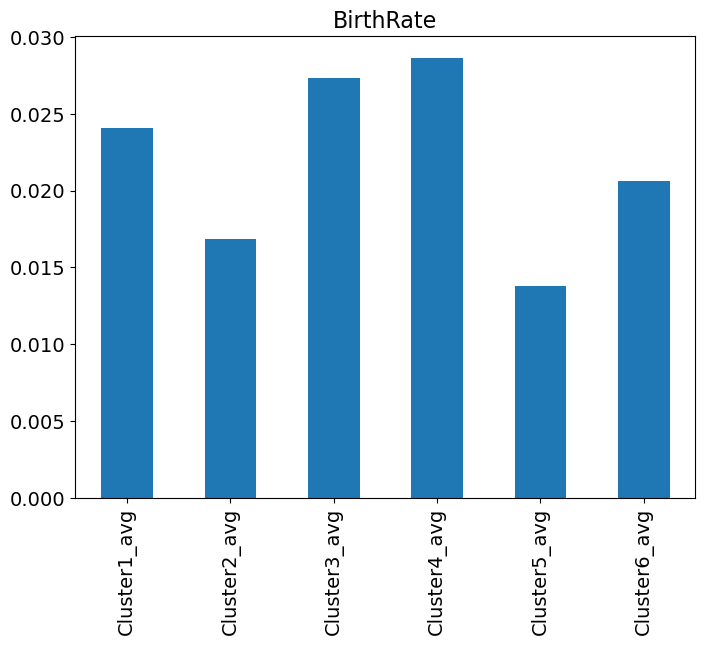

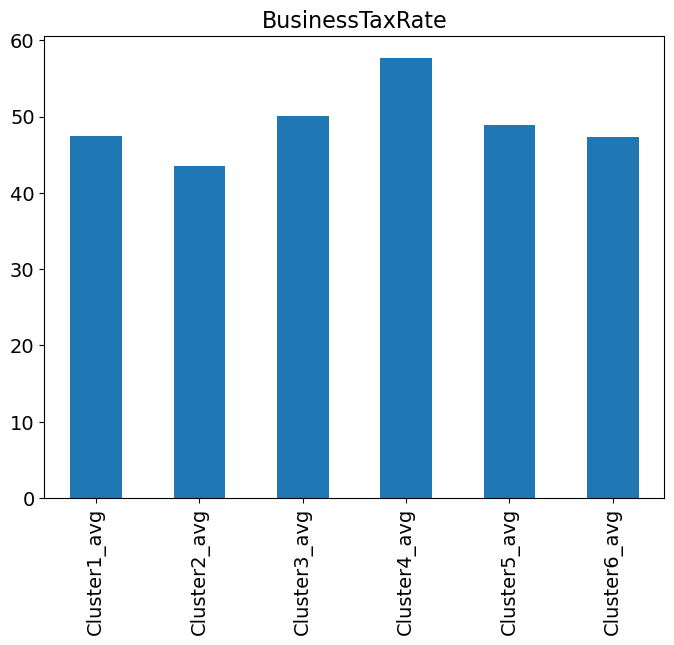

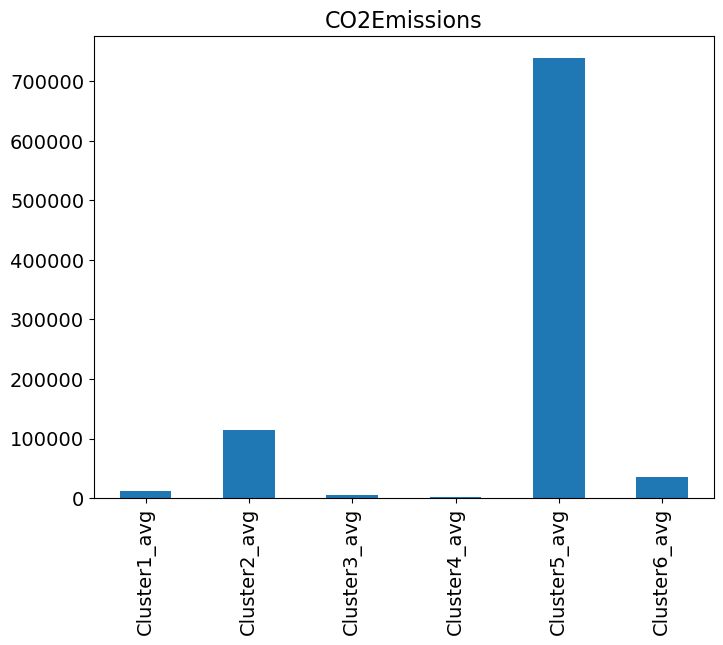

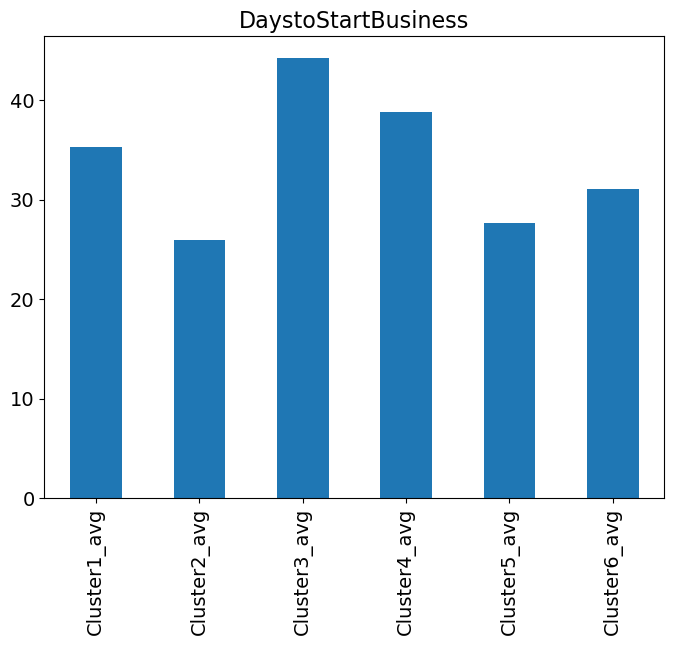

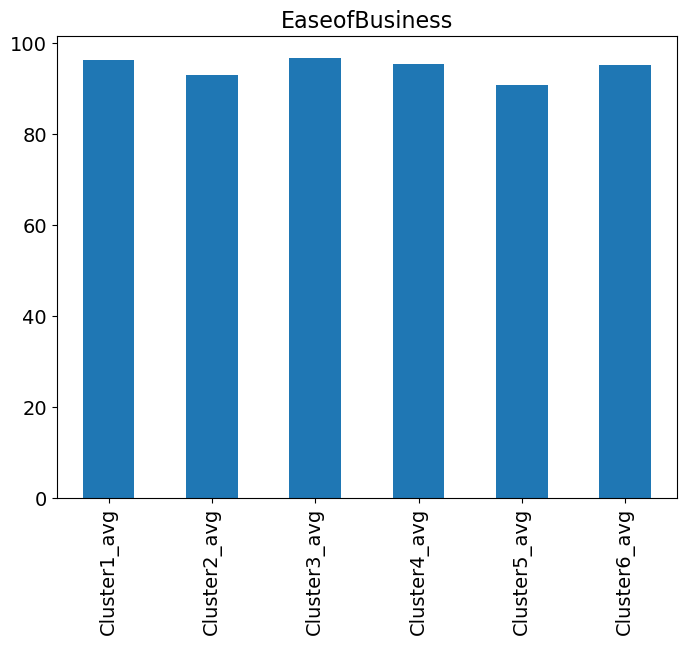

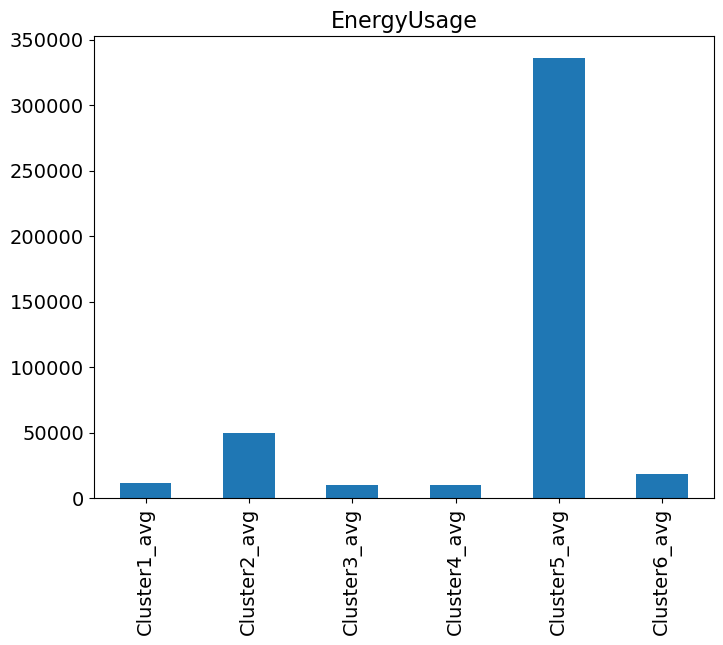

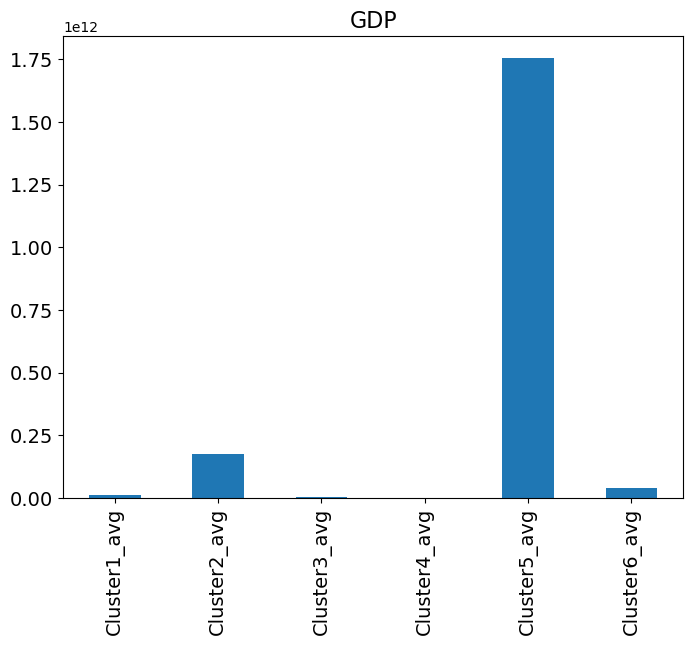

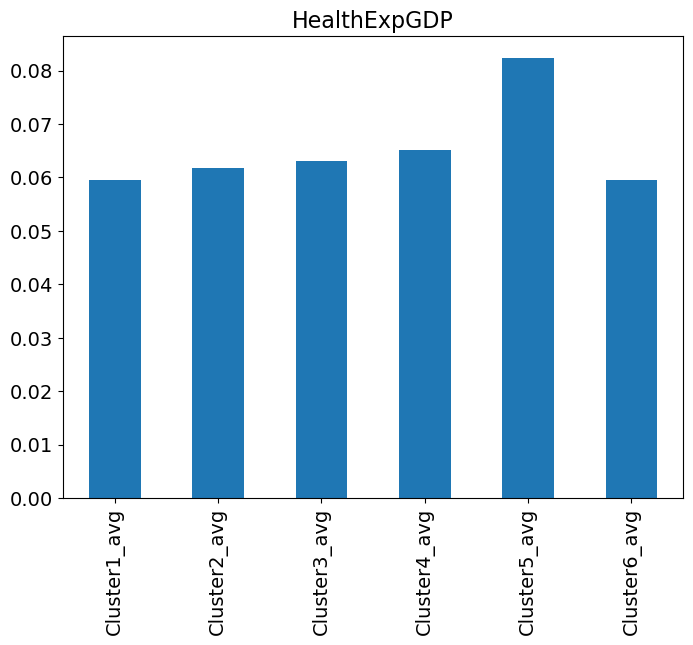

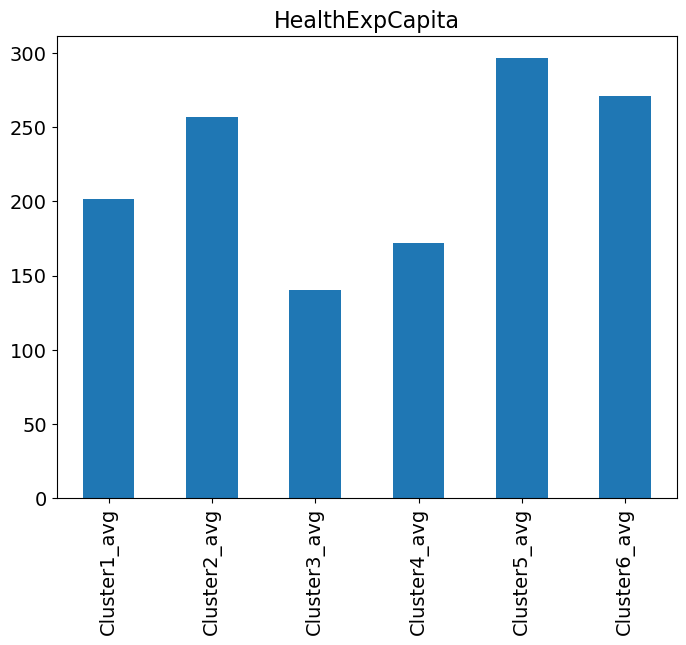

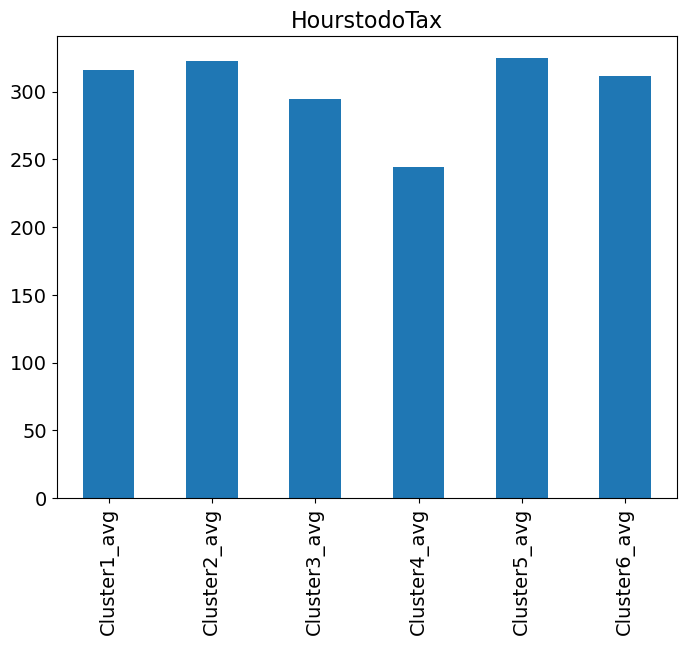

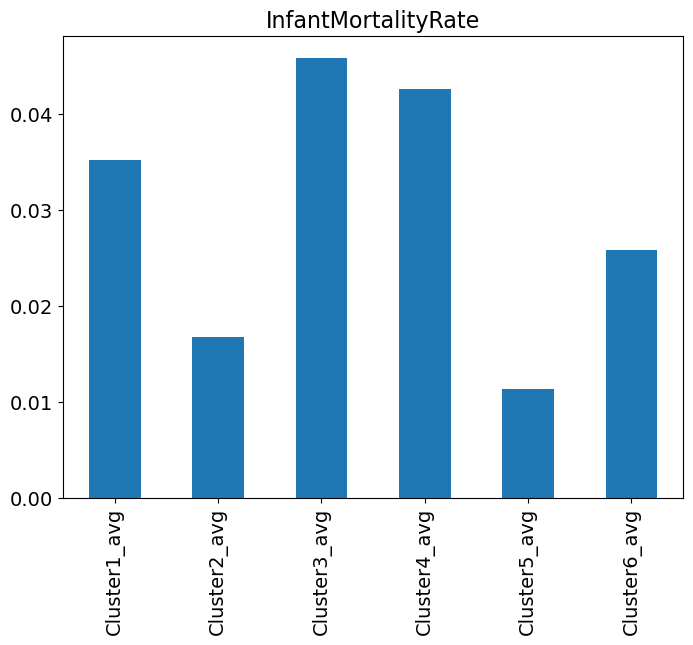

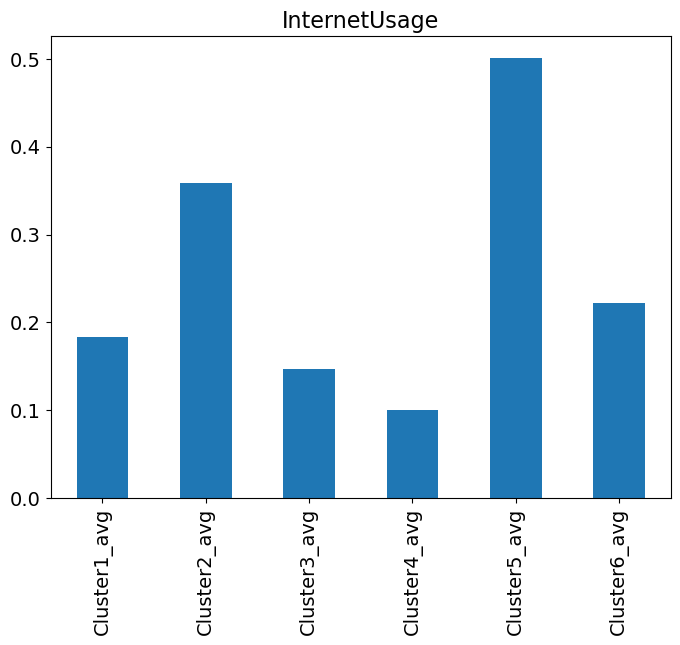

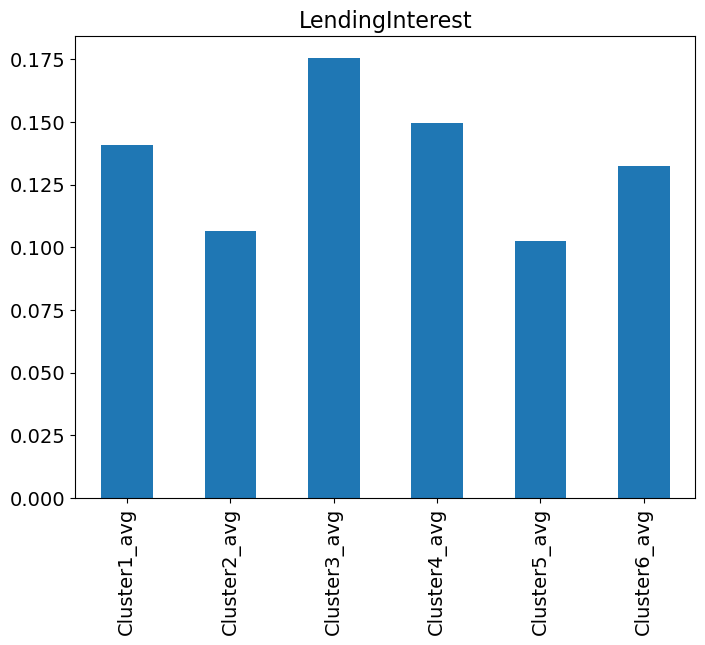

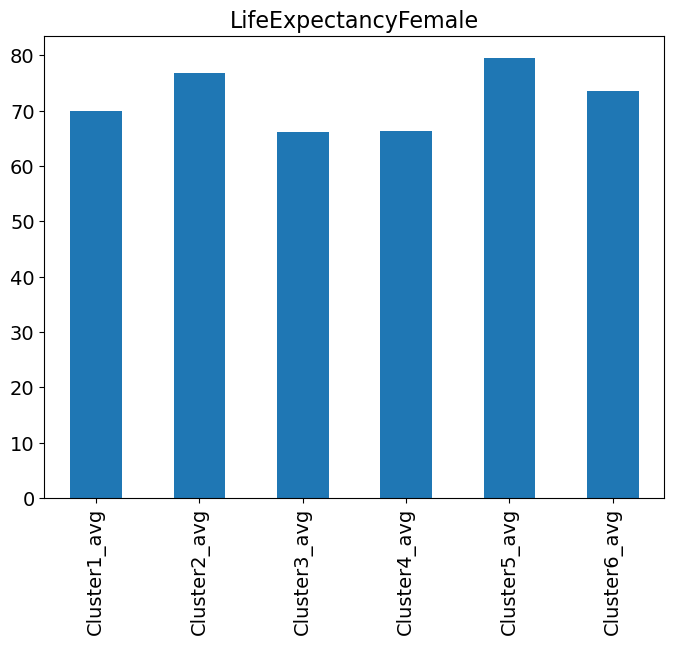

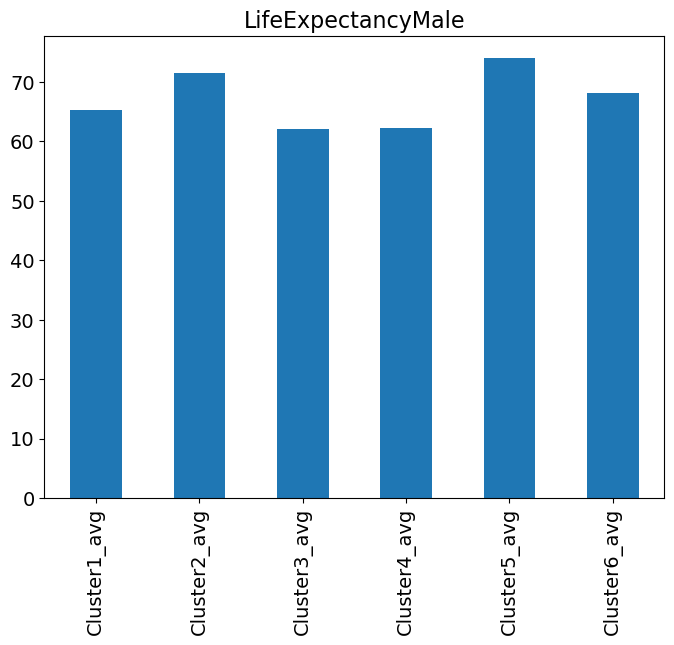

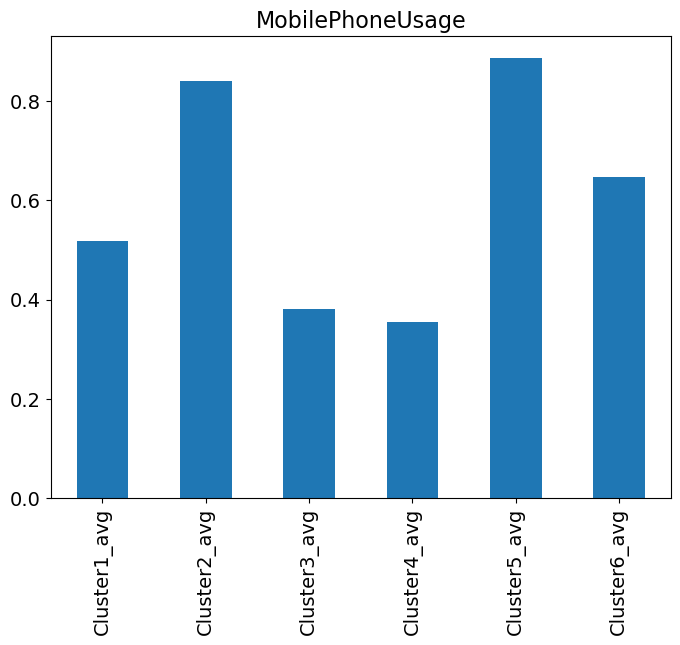

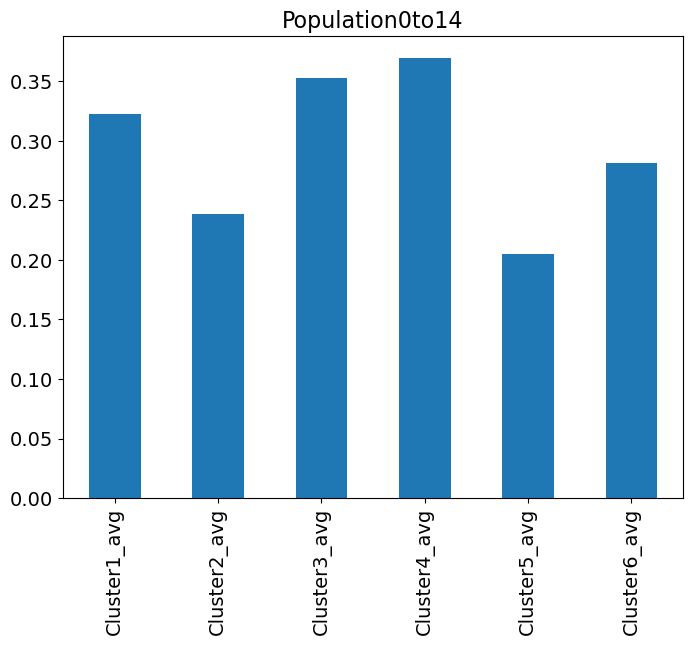

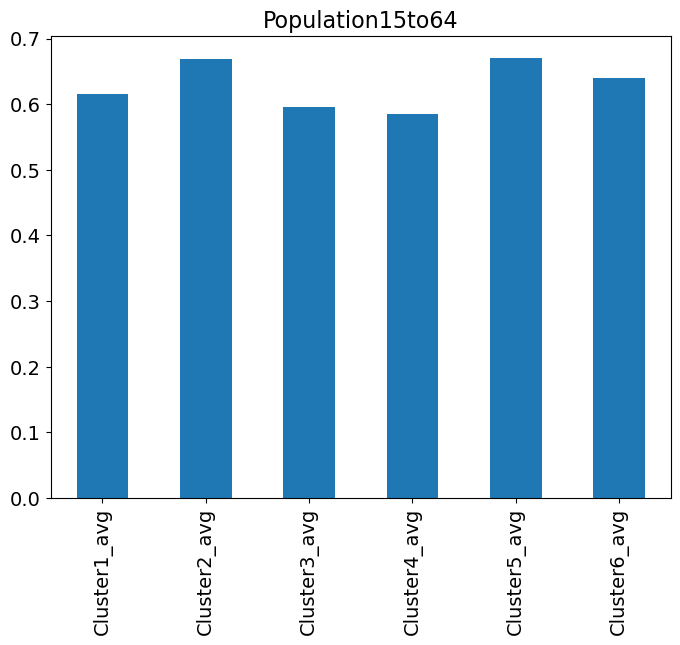

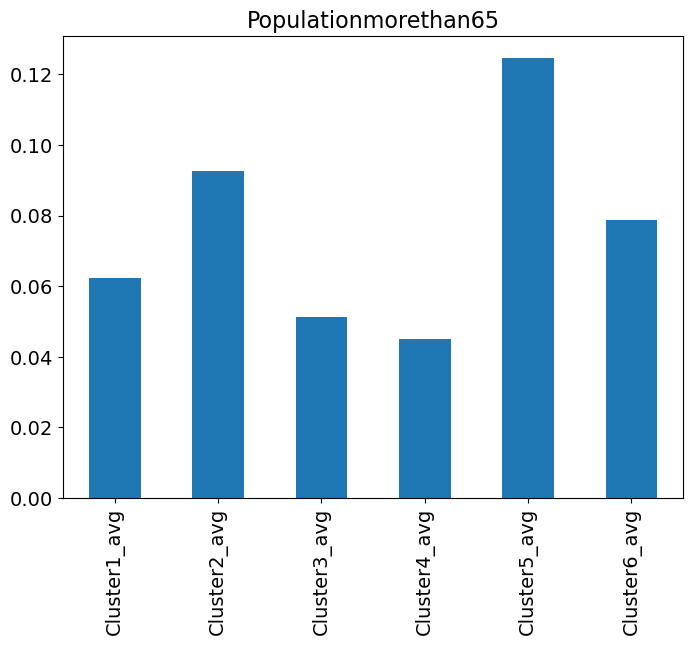

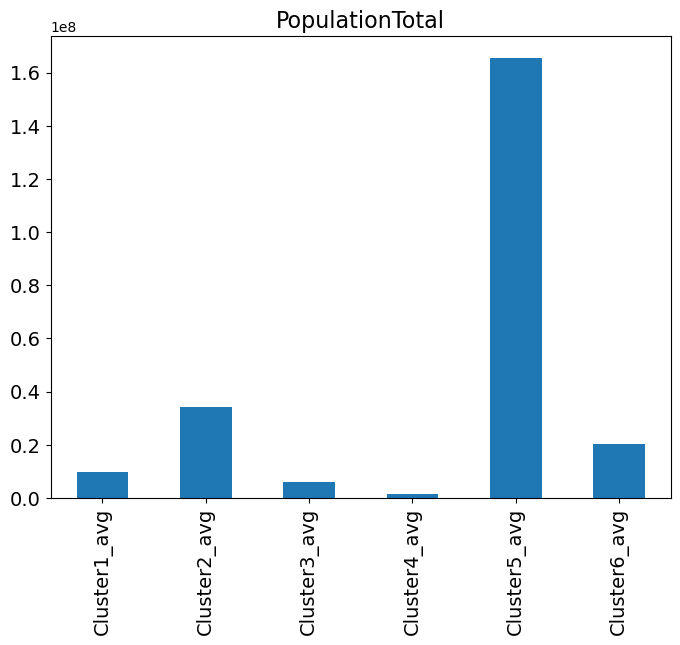

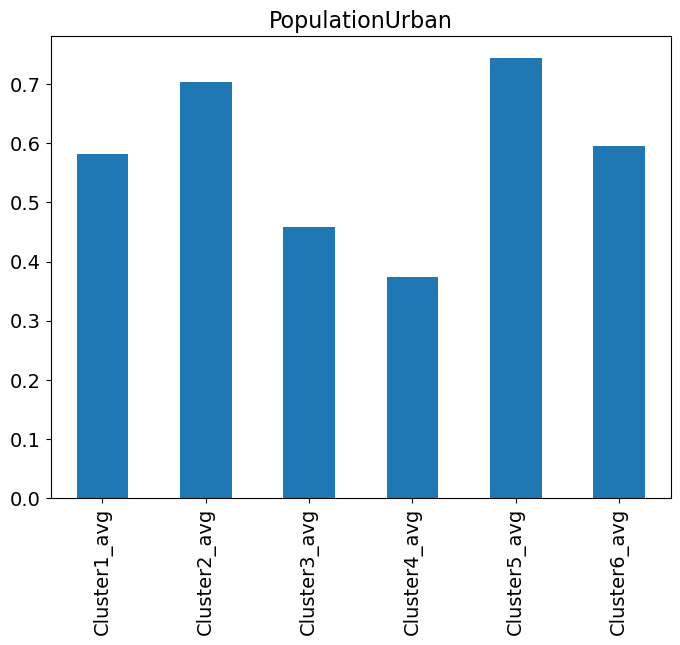

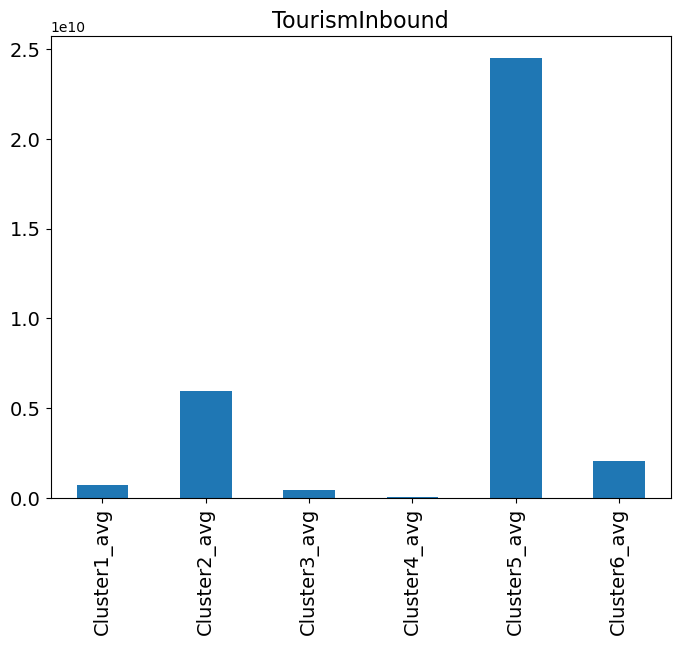

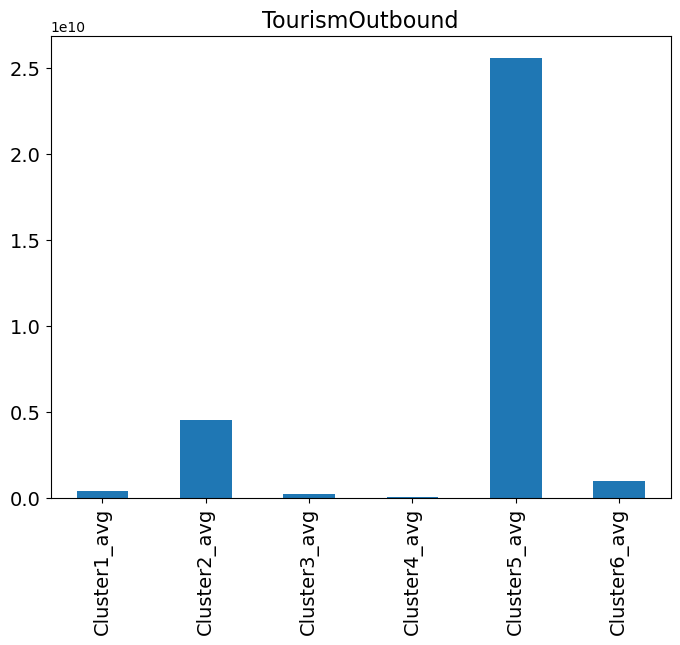

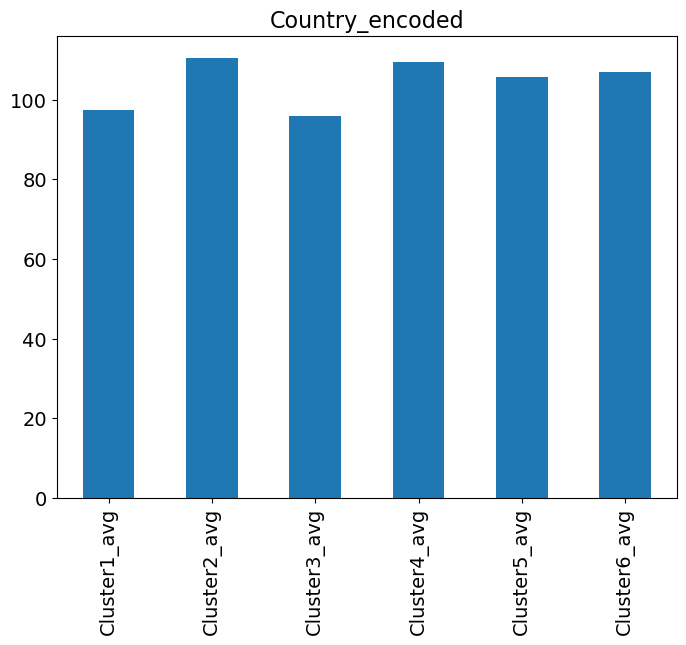

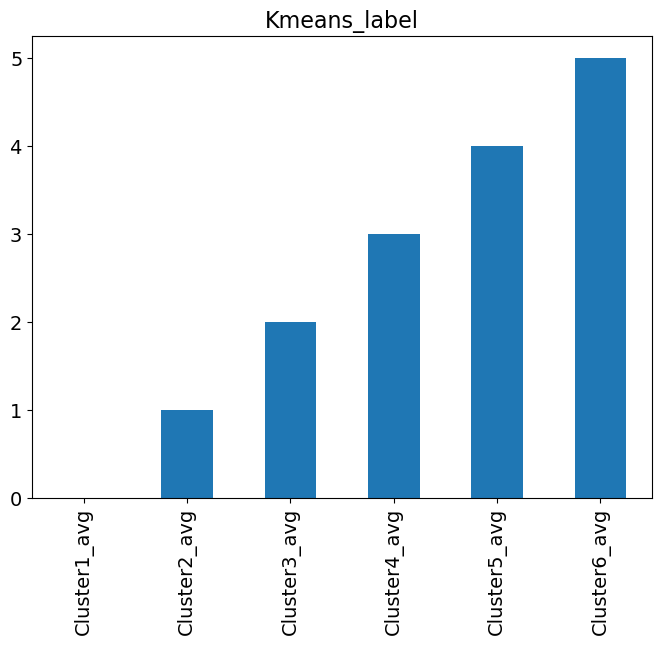

In [106]:
# Extract and plot one Column data .xs method
for i , row in avg_df.iterrows():
    fig = plt.subplots(figsize=(8,6))
    j = avg_df.xs(i ,axis = 0)
    plt.title(i, fontsize=16, fontweight=20)
    j.plot(kind='bar',fontsize=14)
    plt.show()
    print()

## <font color='purple'> Hierarchy Clustring

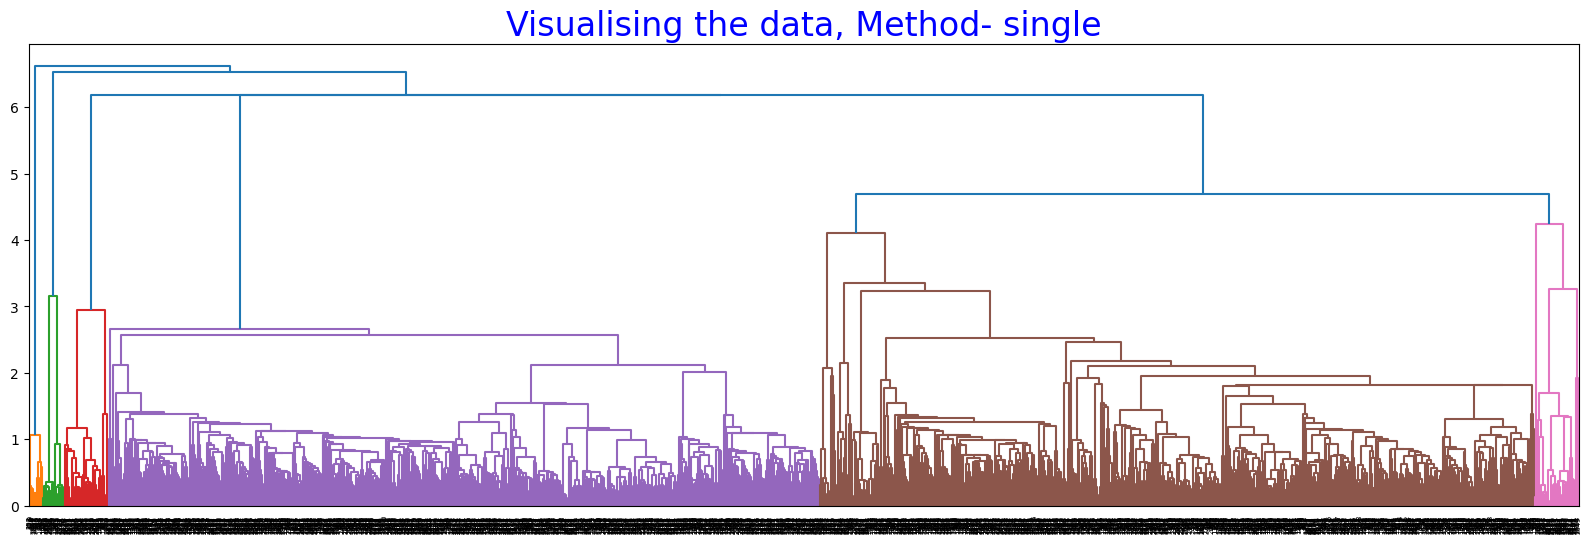

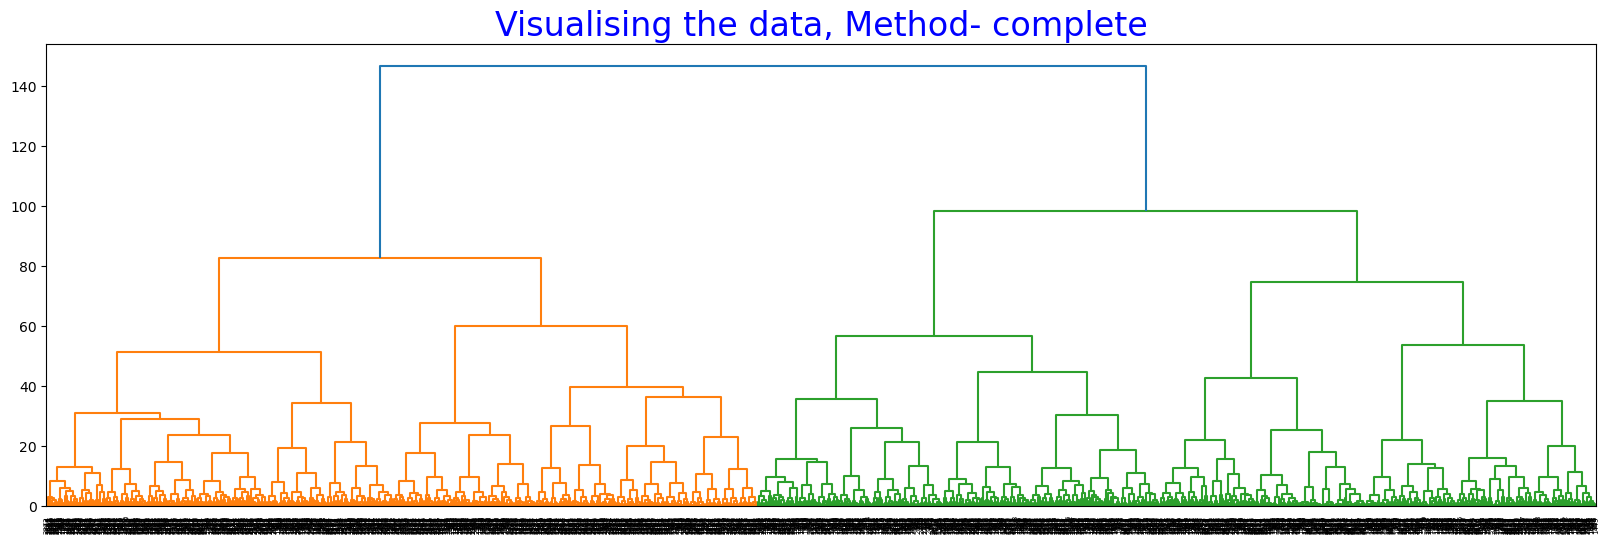

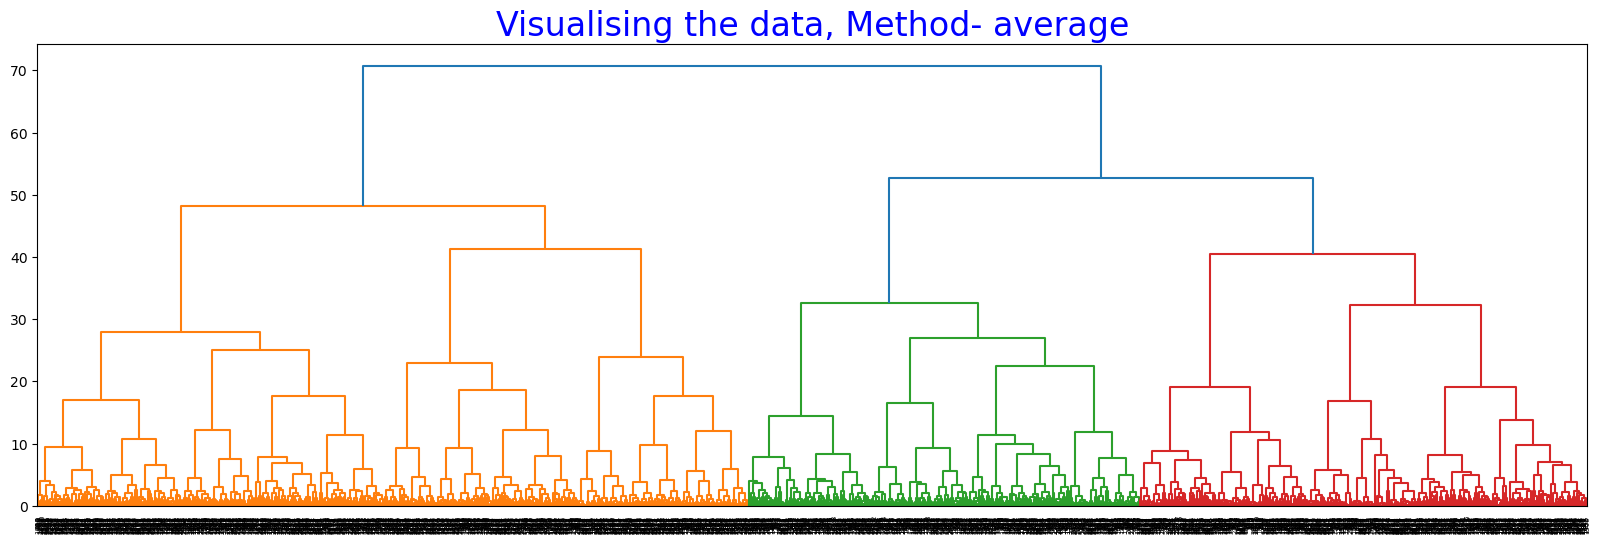

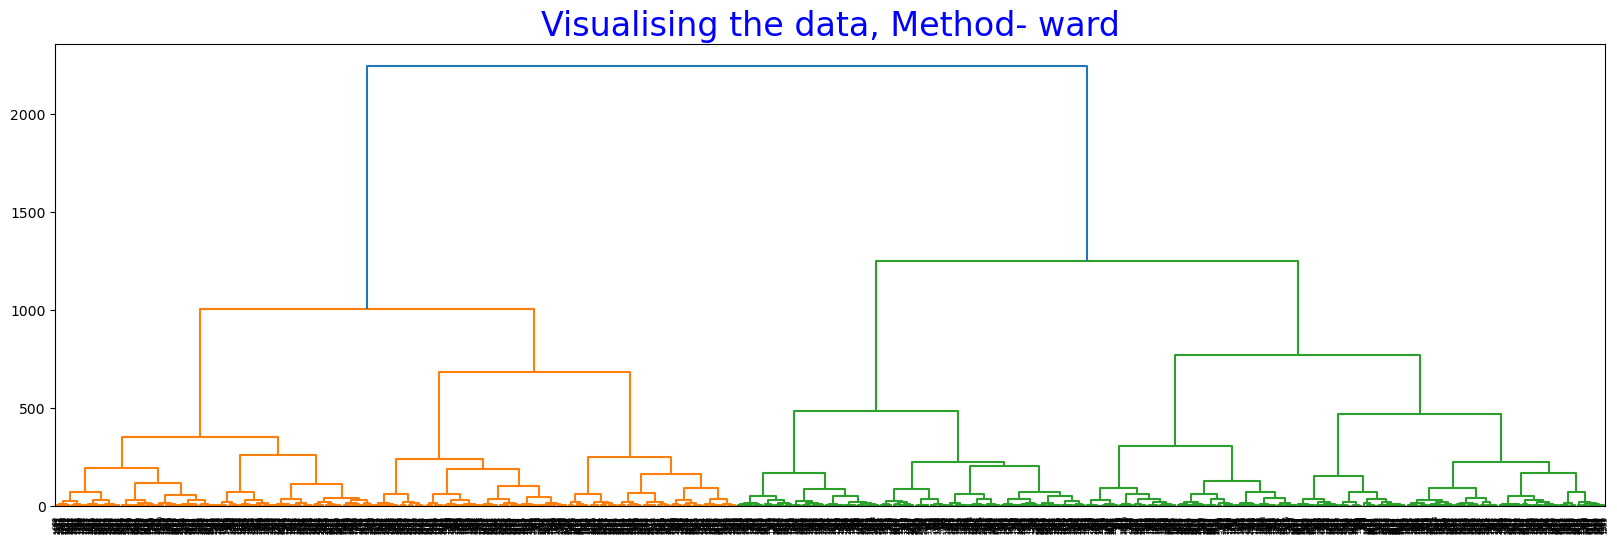

In [107]:
# Applying Dendrogram on data. Or you may apply it on Standardized/normalized indepedent variable data.
# Here diffrent linkage method from hyperparameter is used to see diff between methods for understanding. 
# Ward method is commanly used since it is simpler to visualize understanding.
# Find number of cluster's using color coding of dendrogram. Each color indicates one cluster.

for methods in ['single','complete','average', 'ward']: 
    plt.figure(figsize =(20, 6)) 
    
    dict = {'fontsize':24,'fontweight' :16, 'color' : 'blue'}
    
    plt.title('Visualising the data, Method- {}'.format(methods),fontdict = dict) 
    Dendrogram1 = sch.dendrogram(sch.linkage(data_tsne, method = methods,optimal_ordering=False))

In [108]:
n_clusters = [2,3,4,5,6,7,8,9,10]  # always start number from 2.

for n_clusters in n_clusters:
    for linkages in ["ward", "complete", "average", "single"]:
        hie_cluster1 = AgglomerativeClustering(n_clusters=n_clusters,linkage=linkages) # bydefault it takes linkage 'ward'
        hie_labels1 = hie_cluster1.fit_predict(data_tsne)
        silhouette_score1 = silhouette_score(data_tsne, hie_labels1)
        print("For n_clusters =", n_clusters,"The average silhouette_score with linkage-",linkages, ':',silhouette_score1)
    print()

For n_clusters = 2 The average silhouette_score with linkage- ward : 0.42494628
For n_clusters = 2 The average silhouette_score with linkage- complete : 0.42721698
For n_clusters = 2 The average silhouette_score with linkage- average : 0.42721698
For n_clusters = 2 The average silhouette_score with linkage- single : -0.02173843

For n_clusters = 3 The average silhouette_score with linkage- ward : 0.40657032
For n_clusters = 3 The average silhouette_score with linkage- complete : 0.3953069
For n_clusters = 3 The average silhouette_score with linkage- average : 0.40732726
For n_clusters = 3 The average silhouette_score with linkage- single : -0.20039146

For n_clusters = 4 The average silhouette_score with linkage- ward : 0.41162568
For n_clusters = 4 The average silhouette_score with linkage- complete : 0.39618626
For n_clusters = 4 The average silhouette_score with linkage- average : 0.4130471
For n_clusters = 4 The average silhouette_score with linkage- single : -0.15672575

For n_clu

In [109]:
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'average')
y_hc = hc.fit_predict(data_tsne)

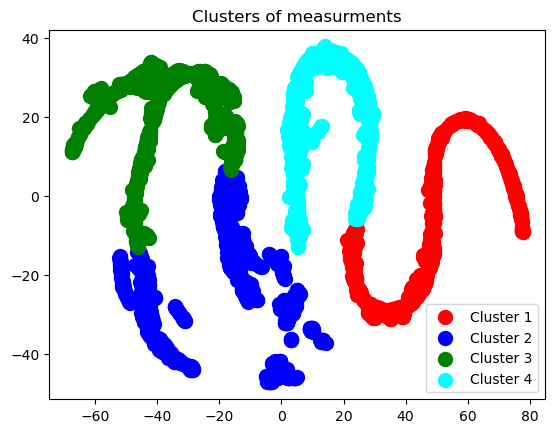

In [110]:
plt.scatter(data_tsne[y_hc == 0, 0], data_tsne[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_tsne[y_hc == 1, 0], data_tsne[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_tsne[y_hc == 2, 0], data_tsne[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_tsne[y_hc == 3, 0], data_tsne[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.title('Clusters of measurments')
plt.legend()
plt.show()

In [111]:
## Accuracy check
s3_hierarchy = silhouette_score(data_tsne,y_hc)
print('Silhouette Score for Hierarchy clustring :',s3_hierarchy)

Silhouette Score for Hierarchy clustring : 0.4130471


In [112]:
df = pd.DataFrame({'Method':['M1 kmeans','M1 hierarchy','M1 DBSCAN','M2 kmeans','M2 hierarchy','M2 DBSCAN','M3 kmeans','M3 hierarchy'],
                   'Silhouette Score':[s1_kmeans,s1_hierarchy,s1_dbscan,s2_kmeans,s2_hierarchy,s2_dbscan,s3_kmeans,s3_hierarchy]})
df

NameError: name 's2_kmeans' is not defined

# <font color=Blue>Conclusion
- By comparing 'Silhouette Score' for each model we get most higest silhoutte score is 0.448 for method 3
- Which means applying t-sne for dimensionality reduction and then using K_means clustring for create clusters.
- This algorithm give us the best clusters compare to other clustring algorithms.

- <font color=blue>If data is in same clusters it means they have nearly same development measurement
- <font color=blue>If data is in different clusters it means belongs to different measurement
- <font color=blue>From this we can say which data has nearly same global development measurement or which is different from each others.

# Cluster - Classifier Model Building

In [113]:
data3.head(2)

BirthRate  BusinessTaxRate  CO2Emissions  DaystoStartBusiness  \
0       0.02        49.051656       87931.0                 26.0   
1       0.05        49.051656        9542.0                 26.0   

   EaseofBusiness  EnergyUsage           GDP  HealthExpGDP  HealthExpCapita  \
0       94.869565      26998.0  5.479006e+10         0.035             60.0   
1       94.869565       7499.0  9.129595e+09         0.034             22.0   

   HourstodoTax  ...  MobilePhoneUsage  Population0to14  Population15to64  \
0    302.461048  ...               0.0            0.342             0.619   
1    302.461048  ...               0.0            0.476             0.499   

   Populationmorethan65  PopulationTotal  PopulationUrban  TourismInbound  \
0                 0.039         31719449            0.599     102000000.0   
1                 0.025         13924930            0.324      34000000.0   

   TourismOutbound  Country_encoded  Kmeans_label  
0      193000000.0              2.0             5  
1      146000000.0              5.0             2  

[2 rows x 25 columns]

In [114]:
X = data3.drop('Kmeans_label',axis=1)
y = data3['Kmeans_label']

In [115]:
# Step 2: Cluster the data
kmeans = KMeans(n_clusters=6 , init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(X)

In [116]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

In [117]:
### Step 4: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X , y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape,y_train.shape, y_test.shape)

(2142, 24) (536, 24) (2142,) (536,)


### Explore best parameters for each model by Cross-validation

In [118]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 123)

## Supervised Classifier Models

### 1. Logistic Regression Classifier

In [119]:
logreg = LogisticRegression()
params = {'multi_class':['ovr', 'multinomial'], 'C':[0.001, 0.01, 0.1, 1, 10]}
logreg_cv = GridSearchCV(logreg, param_grid = params, cv = kf)
logreg_cv.fit(X_train, y_train)
print('Best CV params :', logreg_cv.best_params_)
print('Best CV accuracy score :', logreg_cv.best_score_)

Best CV params : {'C': 1, 'multi_class': 'ovr'}
Best CV accuracy score : 0.28524933010914316


### 2.KNN model

In [120]:
knn = KNeighborsClassifier()
params = {'n_neighbors':np.arange(1, 21)}
knn_cv = GridSearchCV(knn, param_grid = params, cv = kf)
knn_cv.fit(X_train, y_train)
print('Best CV params :', knn_cv.best_params_)
print('Best CV accuracy score :', knn_cv.best_score_)

Best CV params : {'n_neighbors': 1}
Best CV accuracy score : nan


### 3. DecisionTreeClassifier

In [121]:
# splitting data into X and y
X = data3.drop('Kmeans_label',axis=1)
y = data3['Kmeans_label']
# train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# training the model and predicting 
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred=  clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9906716417910447

# Deployment

In [122]:

!pip install -q pyngrok

!pip install -q streamlit

!pip install -q streamlit_ace

In [124]:
%%writefile app.py
 
import pickle
import streamlit as st
 
# loading the trained model
pickle_in = open('classifier.pkl', 'rb') 
classifier = pickle.load(pickle_in)

@st.cache()

Overwriting app.py


In [127]:
# defining the function which will make the prediction using the data which the user inputs 
def prediction(BirthRate, BusinessTaxRate, CO2Emissions, EaseofBusiness, EnergyUsage) :

SyntaxError: incomplete input (2602392195.py, line 2)